
---
# **Optimizing Taxi Fleet Management Throught Predictive Analytics of NYC Taxi Cab Trip Data 🚖**
---

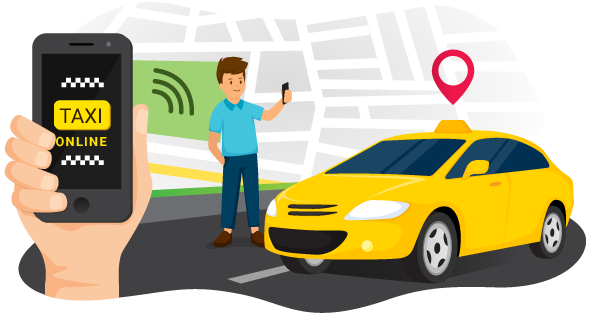

### **Premise**📁

The project aims to leverage historical NYC taxi cab data to predict the number of rides, facilitating better urban planning and transportation management. Using data from January 2023 to May 2024, the project focuses on analyzing key factors influencing taxi demand and developing predictive models.

### **Problem Statement**📝

In this project, I focus on predicting the number of rides in NYC using taxi cab data. The dataset is sourced from the [NYC TLC Trip Record Data website](https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page), and it includes records from January 2023 to May 2024. For training, I utilized data from January to December 2023, and for testing, I used data from January to May 2024.

The core problem is to accurately predict the number of taxi rides in NYC based on historical data, considering various factors such as weather conditions, trip distance, and fare amounts. This requires thorough data preprocessing, feature engineering, and the application of machine learning and deep learning models to capture patterns and trends in the data.

### **Beneficiaries**🤝

This project primarily benefits urban planners and transportation managers by providing them with valuable insights into taxi demand patterns. Accurate ride predictions can help optimize resource allocation, improve traffic management, and enhance overall urban mobility in NYC.


### **Preprocessing**🛠️

During the initial data cleaning process, I identified and corrected instances of invalid dates and filled in missing time slots to ensure the dataset's completeness and accuracy.

### **Exploratory Data Analysis (EDA)**📊

I conducted an initial exploration of the data, focusing on key columns to understand the factors influencing taxi demand:

- **Temperature**: Analyzed the impact of weather conditions on ride demand.
- **Wind Speed**: Investigated the effect of wind speed on taxi usage.
- **Trip Distance**: Examined the relationship between trip distance and demand.
- **Total Fare Amount**: Explored the correlation between total fare and the number of rides.
- **Trip Duration Hours(Created)**: Calculated a new feature, "trip_duration_hours," to capture the time taken for each ride.

### **Feature Engineering**⚙️

Based on the insights from EDA, I constructed the target variable, **"No_of_rides"** which was not present in the original dataset. This variable aims to predict the number of rides occurring at specific times and locations. The primary features for prediction are **"pickup_location_id"** and **"pickup_time"**

### **Modeling**🤖

To address the predictive task, I am using machine learning algorithms such as linear regression and XGBoost. This approach will allow me to evaluate the effectiveness of different models in capturing the patterns in the data and achieving accurate predictions.

### **Further Exploration: Deep Learning**🧠

In addition to time series models, I am also exploring deep learning model such as **simple neural network**. This comprehensive approach will allow me to compare the performance of various techniques and potentially achieve more accurate predictions.

By employing these models, I aim to develop a robust model that can predict the number of taxi rides in NYC with high accuracy, contributing valuable insights for urban planning and transportation management.


### **Data Dictionary**📚

This data dictionary describes the yellow taxi trip data used in the project:

- **VendorID**: A code indicating the TPEP provider that provided the record.
  - 1 = Creative Mobile Technologies, LLC
  - 2 = VeriFone Inc.
- **tpep_pickup_datetime**: The date and time when the meter was engaged.
- **tpep_dropoff_datetime**: The date and time when the meter was disengaged.
- **Passenger_count**: The number of passengers in the vehicle. This is a driver-entered value.
- **Trip_distance**: The elapsed trip distance in miles reported by the taximeter.
- **PULocationID**: TLC Taxi Zone in which the taximeter was engaged.
- **DOLocationID**: TLC Taxi Zone in which the taximeter was disengaged.
- **RateCodeID**: The final rate code in effect at the end of the trip.
  - 1 = Standard rate
  - 2 = JFK
  - 3 = Newark
  - 4 = Nassau or Westchester
  - 5 = Negotiated fare
  - 6 = Group ride
- **Store_and_fwd_flag**: This flag indicates whether the trip record was held in vehicle memory before sending to the vendor (store and forward) because the vehicle did not have a connection to the server.
  - Y = store and forward trip
  - N = not a store and forward trip
- **Payment_type**: A numeric code signifying how the passenger paid for the trip.
  - 1 = Credit card
  - 2 = Cash
  - 3 = No charge
  - 4 = Dispute
  - 5 = Unknown
  - 6 = Voided trip
- **Fare_amount**: The time-and-distance fare calculated by the meter.
- **Extra**: Miscellaneous extras and surcharges. This includes the 0.50 and 1 rush hour and overnight charges.
- **MTA_tax**: 0.50 MTA tax that is automatically triggered based on the metered rate in use.
- **Improvement_surcharge**: 0.30 improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015.
- **Tip_amount**: Tip amount. This field is automatically populated for credit card tips. Cash tips are not included.
- **Tolls_amount**: Total amount of all tolls paid in trip.
- **Total_amount**: The total amount charged to passengers. Does not include cash tips.
- **Congestion_Surcharge**: Total amount collected in trip for NYS congestion surcharge.
- **Airport_fee**: $1.25 for pick up only at LaGuardia and John F. Kennedy Airports.

---
# **1. Importing Necessary Libraries**📚
---

In [3]:
!pip install xgboost
!pip install geopandas
!pip install folium

In [4]:
# Since this project is taking more than 16 GB of memory, I'm using Colab Pro for executing this notebook.

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Navigate to the directory where the CSV data files are saved.

cd drive/My Drive/MSc. Data Analytics/Project Dissertation/NYC Taxi

/content/drive/My Drive/MSc. Data Analytics/Project Dissertation/NYC Taxi


In [6]:
# For Data Manipulation
import pandas as pd

# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import plotly.express as px
import geopandas as gpd
from shapely import wkt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

# For Date and Time Handling
from datetime import datetime, timedelta

# For Typing Annotations
from typing import Optional, List, Tuple

# For Progress Bar for Loops
from tqdm import tqdm

# For Numerical Computations
import numpy as np

# For Machine Learning - Model Selection and Evaluation
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# XGBoost Library
import xgboost as xgb
from xgboost import XGBRegressor

# For Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

import folium
from folium.plugins import MarkerCluster


---
# **2. Loading Data**💾
---

In [7]:
# List of parquet files containing ride data for each month from January 2023 to May 2024
parquet_files = [
    "rides_2023-01.parquet",  # January 2023
    "rides_2023-02.parquet",  # February 2023
    "rides_2023-03.parquet",  # March 2023
    "rides_2023-04.parquet",  # April 2023
    "rides_2023-05.parquet",  # May 2023
    "rides_2023-06.parquet",  # June 2023
    "rides_2023-07.parquet",  # July 2023
    "rides_2023-08.parquet",  # August 2023
    "rides_2023-09.parquet",  # September 2023
    "rides_2023-10.parquet",  # October 2023
    "rides_2023-11.parquet",  # November 2023
    "rides_2023-12.parquet",  # December 2023
    "rides_2024-01.parquet",  # January 2024
    "rides_2024-02.parquet",  # February 2024
    "rides_2024-03.parquet",  # March 2024
    "rides_2024-04.parquet",  # April 2024
    "rides_2024-05.parquet",  # May 2024
]

# CSV file containing weather data for NYC from January 1, 2023, to May 31, 2024
weather_csv_files = "weather_data_nyc 2023-01-01 to 2024-05-31.csv"

# CSV file containing taxi zone information
taxi_zones_file = "taxi_zones.csv"


In [8]:
# Loading Taxi Ride data from Parquet files

ride_data = pd.concat([pd.read_parquet(file) for file in parquet_files])
ride_data.head()


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:32:10   2023-01-01 00:40:36              1.0   
1         2  2023-01-01 00:55:08   2023-01-01 01:01:27              1.0   
2         2  2023-01-01 00:25:04   2023-01-01 00:37:49              1.0   
3         1  2023-01-01 00:03:48   2023-01-01 00:13:25              0.0   
4         2  2023-01-01 00:10:29   2023-01-01 00:21:19              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.97         1.0                  N           161           141   
1           1.10         1.0                  N            43           237   
2           2.51         1.0                  N            48           238   
3           1.90         1.0                  N           138             7   
4           1.43         1.0                  N           107            79   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2          9.3   1.00      0.5        0.00           0.0   
1             1          7.9   1.00      0.5        4.00           0.0   
2             1         14.9   1.00      0.5       15.00           0.0   
3             1         12.1   7.25      0.5        0.00           0.0   
4             1         11.4   1.00      0.5        3.28           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         14.30                   2.5         0.00   
1                    1.0         16.90                   2.5         0.00   
2                    1.0         34.90                   2.5         0.00   
3                    1.0         20.85                   0.0         1.25   
4                    1.0         19.68                   2.5         0.00   

   Airport_fee  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN

In [9]:
# Displaying the summary of the ride_data DataFrame

ride_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 55103126 entries, 0 to 3723832
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            flo

**Observations:**

The above DataFrame contains over 55 million rows, with 20 columns where most of them are of float datatype

In [10]:
# Loading the Weather data from CSV files

weather_data = pd.read_csv(weather_csv_files)
weather_data.head()


name             datetime  temp  feelslike   dew  humidity  \
0  New York City,USA  2023-01-01T00:00:00  54.0       54.0  51.8     92.43   
1  New York City,USA  2023-01-01T01:00:00  53.1       53.1  50.9     92.14   
2  New York City,USA  2023-01-01T02:00:00  53.3       53.3  50.0     88.43   
3  New York City,USA  2023-01-01T03:00:00  52.6       52.6  49.7     89.82   
4  New York City,USA  2023-01-01T04:00:00  53.3       53.3  48.6     83.95   

   precip  precipprob preciptype  snow  ...  sealevelpressure  cloudcover  \
0   0.009         100       rain   0.0  ...            1007.1       100.0   
1   0.001         100       rain   0.0  ...            1007.2       100.0   
2   0.004         100       rain   0.0  ...            1006.8        43.6   
3   0.000           0        NaN   0.0  ...            1007.8        13.4   
4   0.000           0        NaN   0.0  ...            1008.1         7.2   

   visibility  solarradiation  solarenergy  uvindex  severerisk  \
0         7.7               0          0.0        0          10   
1         7.2               0          0.0        0          10   
2         7.7               0          0.0        0          10   
3         9.0               0          0.0        0          10   
4         9.9               0          0.0        0          10   

               conditions         icon                           stations  
0          Rain, Overcast         rain  72505394728,KLGA,KNYC,72503014732  
1          Rain, Overcast         rain  72505394728,KLGA,KNYC,72503014732  
2  Rain, Partially cloudy         rain  72505394728,KLGA,KNYC,72503014732  
3                   Clear  clear-night  72505394728,KLGA,KNYC,72503014732  
4                   Clear  clear-night  72505394728,KLGA,KNYC,72503014732  

[5 rows x 24 columns]

In [11]:
# Displaying the summary of the weather_data DataFrame

weather_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12407 entries, 0 to 12406
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              12407 non-null  object 
 1   datetime          12407 non-null  object 
 2   temp              12407 non-null  float64
 3   feelslike         12407 non-null  float64
 4   dew               12407 non-null  float64
 5   humidity          12407 non-null  float64
 6   precip            12407 non-null  float64
 7   precipprob        12407 non-null  int64  
 8   preciptype        1310 non-null   object 
 9   snow              12407 non-null  float64
 10  snowdepth         12407 non-null  float64
 11  windgust          12407 non-null  float64
 12  windspeed         12407 non-null  float64
 13  winddir           12407 non-null  int64  
 14  sealevelpressure  12407 non-null  float64
 15  cloudcover        12407 non-null  float64
 16  visibility        12407 non-null  float6

**Observations:**

The above DataFrame contains over 12407 rows, with 24 columns where most of them are of float datatype

In [12]:
# Merging the Weather data with Ride data

# Converting datetime columns to datetime format
ride_data['tpep_pickup_datetime'] = pd.to_datetime(ride_data['tpep_pickup_datetime'])
weather_data['datetime'] = pd.to_datetime(weather_data['datetime'])

# Extracting the Hour from the datetime columns for merging
ride_data['pickup_hour'] = ride_data['tpep_pickup_datetime'].dt.floor('H')
weather_data['hour'] = weather_data['datetime'].dt.floor('H')

# Selecting only the necessary columns from the Weather data
weather_data = weather_data[['hour', 'temp', 'windspeed', 'conditions']]

# Merging the DataFrames on the Hour
rides = pd.merge(ride_data, weather_data, left_on='pickup_hour', right_on='hour', how='left')

rides.head()


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:32:10   2023-01-01 00:40:36              1.0   
1         2  2023-01-01 00:55:08   2023-01-01 01:01:27              1.0   
2         2  2023-01-01 00:25:04   2023-01-01 00:37:49              1.0   
3         1  2023-01-01 00:03:48   2023-01-01 00:13:25              0.0   
4         2  2023-01-01 00:10:29   2023-01-01 00:21:19              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.97         1.0                  N           161           141   
1           1.10         1.0                  N            43           237   
2           2.51         1.0                  N            48           238   
3           1.90         1.0                  N           138             7   
4           1.43         1.0                  N           107            79   

   payment_type  ...  improvement_surcharge  total_amount  \
0             2  ...                    1.0         14.30   
1             1  ...                    1.0         16.90   
2             1  ...                    1.0         34.90   
3             1  ...                    1.0         20.85   
4             1  ...                    1.0         19.68   

   congestion_surcharge  airport_fee  Airport_fee  pickup_hour       hour  \
0                   2.5         0.00          NaN   2023-01-01 2023-01-01   
1                   2.5         0.00          NaN   2023-01-01 2023-01-01   
2                   2.5         0.00          NaN   2023-01-01 2023-01-01   
3                   0.0         1.25          NaN   2023-01-01 2023-01-01   
4                   2.5         0.00          NaN   2023-01-01 2023-01-01   

   temp  windspeed      conditions  
0  54.0        1.9  Rain, Overcast  
1  54.0        1.9  Rain, Overcast  
2  54.0        1.9  Rain, Overcast  
3  54.0        1.9  Rain, Overcast  
4  54.0        1.9  Rain, Overcast  

[5 rows x 25 columns]

In [13]:
# Loading Taxi Zones data

taxi_zones = pd.read_csv(taxi_zones_file)
taxi_zones.head()

OBJECTID  Shape_Leng                                           the_geom  \
0         1    0.116357  MULTIPOLYGON (((-74.18445299999996 40.69499599...   
1         2    0.433470  MULTIPOLYGON (((-73.82337597260663 40.63898704...   
2         3    0.084341  MULTIPOLYGON (((-73.84792614099985 40.87134223...   
3         4    0.043567  MULTIPOLYGON (((-73.97177410965318 40.72582128...   
4         5    0.092146  MULTIPOLYGON (((-74.17421738099989 40.56256808...   

   Shape_Area                     zone  LocationID        borough  
0    0.000782           Newark Airport           1            EWR  
1    0.004866              Jamaica Bay           2         Queens  
2    0.000314  Allerton/Pelham Gardens           3          Bronx  
3    0.000112            Alphabet City           4      Manhattan  
4    0.000498            Arden Heights           5  Staten Island

In [14]:
# Displaying the summary of the taxi_zones DataFrame

taxi_zones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OBJECTID    263 non-null    int64  
 1   Shape_Leng  263 non-null    float64
 2   the_geom    263 non-null    object 
 3   Shape_Area  263 non-null    float64
 4   zone        263 non-null    object 
 5   LocationID  263 non-null    int64  
 6   borough     263 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 14.5+ KB


**Observations:**

The above DataFrame contains 263 million rows, with 7 columns where most of them are of object datatype

In [15]:
# Merging Taxi Rides data with Taxi Zones data (selecting 'the_geom', 'zone' and 'borough')

taxi_zones = taxi_zones[['LocationID', 'the_geom', 'zone', 'borough']]
rides = rides.merge(taxi_zones, left_on='PULocationID', right_on='LocationID', how='left')

rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55115753 entries, 0 to 55115752
Data columns (total 29 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee         

In [16]:
# Dropping unnecessary columns

rides = rides.drop(['store_and_fwd_flag', 'DOLocationID', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
                            'tolls_amount', 'improvement_surcharge', 'congestion_surcharge', 'airport_fee',
                            'Airport_fee', 'hour', 'LocationID'], axis=1)


In [17]:
# Renaming columns

rides.rename(columns={
    'VendorID': 'vendor_id',
    'tpep_pickup_datetime': 'pickup_datetime',
    'tpep_dropoff_datetime': 'dropoff_datetime',
    'passenger_count': 'passenger_count',
    'RatecodeID': 'rate_code_id',
    'PULocationID': 'pickup_location_id',
    'payment_type': 'payment_type',
    'total_amount': 'total_fare_amount',
    'temp': 'temperature',
    'conditions': 'weather_conditions',
    'the_geom': 'geometry',
    'zone': 'pickup_zone',
    'borough': 'pickup_borough'
}, inplace=True)

rides.head()

vendor_id     pickup_datetime    dropoff_datetime  passenger_count  \
0          2 2023-01-01 00:32:10 2023-01-01 00:40:36              1.0   
1          2 2023-01-01 00:55:08 2023-01-01 01:01:27              1.0   
2          2 2023-01-01 00:25:04 2023-01-01 00:37:49              1.0   
3          1 2023-01-01 00:03:48 2023-01-01 00:13:25              0.0   
4          2 2023-01-01 00:10:29 2023-01-01 00:21:19              1.0   

   trip_distance  rate_code_id  pickup_location_id  payment_type  \
0           0.97           1.0                 161             2   
1           1.10           1.0                  43             1   
2           2.51           1.0                  48             1   
3           1.90           1.0                 138             1   
4           1.43           1.0                 107             1   

   total_fare_amount pickup_hour  temperature  windspeed weather_conditions  \
0              14.30  2023-01-01         54.0        1.9     Rain, Overcast   
1              16.90  2023-01-01         54.0        1.9     Rain, Overcast   
2              34.90  2023-01-01         54.0        1.9     Rain, Overcast   
3              20.85  2023-01-01         54.0        1.9     Rain, Overcast   
4              19.68  2023-01-01         54.0        1.9     Rain, Overcast   

                                            geometry        pickup_zone  \
0  MULTIPOLYGON (((-73.97534377999993 40.75529969...     Midtown Center   
1  MULTIPOLYGON (((-73.97255352299985 40.76489773...       Central Park   
2  MULTIPOLYGON (((-73.99117738199989 40.75532984...       Clinton East   
3  MULTIPOLYGON (((-73.8712485624251 40.786038151...  LaGuardia Airport   
4  MULTIPOLYGON (((-73.98238628799993 40.73141124...           Gramercy   

  pickup_borough  
0      Manhattan  
1      Manhattan  
2      Manhattan  
3         Queens  
4      Manhattan

In [18]:
# Looking at the descriptive statistics for all columns in the DataFrame

rides.describe()


vendor_id             pickup_datetime            dropoff_datetime  \
count  5.511575e+07                    55115753                    55115753   
mean   1.744435e+00  2023-09-20 15:37:25.274842  2023-09-20 15:54:08.880165   
min    1.000000e+00         2001-01-01 00:06:49         1970-01-20 10:16:32   
25%    1.000000e+00         2023-05-10 18:58:32         2023-05-10 19:19:52   
50%    2.000000e+00         2023-09-26 16:16:26         2023-09-26 16:38:52   
75%    2.000000e+00         2024-02-01 15:13:13         2024-02-01 15:32:04   
max    6.000000e+00         2024-06-01 23:54:14         2024-06-02 00:18:18   
std    4.402794e-01                         NaN                         NaN   

       passenger_count  trip_distance  rate_code_id  pickup_location_id  \
count     5.224013e+07   5.511575e+07  5.224013e+07        5.511575e+07   
mean      1.359208e+00   4.243296e+00  1.814723e+00        1.651116e+02   
min       0.000000e+00   0.000000e+00  1.000000e+00        1.000000e+00   
25%       1.000000e+00   1.030000e+00  1.000000e+00        1.320000e+02   
50%       1.000000e+00   1.770000e+00  1.000000e+00        1.620000e+02   
75%       1.000000e+00   3.380000e+00  1.000000e+00        2.340000e+02   
max       9.000000e+00   3.457294e+05  9.900000e+01        2.650000e+02   
std       8.755891e-01   2.805704e+02  8.474172e+00        6.408100e+01   

       payment_type  total_fare_amount                 pickup_hour  \
count  5.511575e+07       5.511575e+07                    55115753   
mean   1.160579e+00       2.811795e+01  2023-09-20 15:07:22.254891   
min    0.000000e+00      -1.094050e+03         2001-01-01 00:00:00   
25%    1.000000e+00       1.580000e+01         2023-05-10 18:00:00   
50%    1.000000e+00       2.100000e+01         2023-09-26 16:00:00   
75%    1.000000e+00       3.045000e+01         2024-02-01 15:00:00   
max    5.000000e+00       3.869876e+05         2024-06-01 23:00:00   
std    5.795780e-01       7.982334e+01                         NaN   

        temperature     windspeed  
count  5.511562e+07  5.511562e+07  
mean   5.657429e+01  6.936416e+00  
min    6.400000e+00  0.000000e+00  
25%    4.480000e+01  4.500000e+00  
50%    5.470000e+01  6.500000e+00  
75%    6.890000e+01  9.100000e+00  
max    9.270000e+01  2.830000e+01  
std    1.483293e+01  4.082525e+00

The above output provides a summary of the taxi rides dataset, including the count, mean, min, 25th percentile, 50th percentile (median), 75th percentile, and max values for each column. It highlights the central tendencies, dispersion, and overall range of the data.

### Discrepancies Observed:

1. **Negative and Outlier Values**: Columns, such as `total_fare_amount` have negative values and extreme outliers (e.g., minimum of `$1094.05` and a maximum of `$386987.6`). Whereas, the `trip_distance` column has a wide range from 0 to 345,729.4 miles. The maximum values in both the columns suggests presence of outliers.

2. **Date-Time Anomalies**: The `pickup_datetime` column has a minimum value in year 2001 and maximum value in June 2024 whereas `dropoff_datetime` column has a minimum value in year 1970 and maximum value in June 2024, which is not plausible given the context (as we are considering data for Jan 2023 - May 2024 for Pickup Datetime), indicating potential data entry errors or incorrect timestamps.

In [19]:
# Looking at the describe statistics of the object-type columns in the DataFrame

rides.describe(include='object')


weather_conditions                                           geometry  \
count            55115622                                           54664784   
unique                 10                                                260   
top                 Clear  MULTIPOLYGON (((-73.8250346749999 40.663580133...   
freq             25732660                                            2747653   

        pickup_zone pickup_borough  
count      54664784       54664784  
unique          259              6  
top     JFK Airport      Manhattan  
freq        2747653       48794665

The most common `weather_condition` recorded is "**Clear**" occurring in 25,732,660 entries. "**JFK Airport**" is the most frequent `pickup_zone` with 2,747,653 occurrences, while "**Manhattan**" is the most common `pickup_borough` appearing in 48,794,665 records.

In [20]:
# Removing records outside the date range from January 2023 to May 2024 in Pickup Datetime

# Define the date range
start_date = '2023-01-01'
end_date = '2024-06-01'

# Filtering the dataset for the specified date range based on both pickup and dropoff times
df = rides[(rides['pickup_datetime'] >= start_date) & (rides['pickup_datetime'] < end_date)]

In [21]:
# Looking at the datatypes of the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55115622 entries, 0 to 55115752
Data columns (total 16 columns):
 #   Column              Dtype         
---  ------              -----         
 0   vendor_id           int64         
 1   pickup_datetime     datetime64[us]
 2   dropoff_datetime    datetime64[us]
 3   passenger_count     float64       
 4   trip_distance       float64       
 5   rate_code_id        float64       
 6   pickup_location_id  int64         
 7   payment_type        int64         
 8   total_fare_amount   float64       
 9   pickup_hour         datetime64[us]
 10  temperature         float64       
 11  windspeed           float64       
 12  weather_conditions  object        
 13  geometry            object        
 14  pickup_zone         object        
 15  pickup_borough      object        
dtypes: datetime64[us](3), float64(6), int64(3), object(4)
memory usage: 7.0+ GB


In [22]:
# Looking at the filtered dataset statistics

df.describe()

vendor_id             pickup_datetime            dropoff_datetime  \
count  5.511562e+07                    55115622                    55115622   
mean   1.744435e+00  2023-09-20 15:51:03.982126  2023-09-20 16:07:47.545795   
min    1.000000e+00         2023-01-01 00:00:00         1970-01-20 10:16:32   
25%    1.000000e+00  2023-05-10 18:59:03.250000  2023-05-10 19:20:26.500000   
50%    2.000000e+00         2023-09-26 16:16:54         2023-09-26 16:39:19   
75%    2.000000e+00         2024-02-01 15:13:23  2024-02-01 15:32:13.750000   
max    6.000000e+00         2024-05-31 23:59:58         2024-06-02 00:18:18   
std    4.402797e-01                         NaN                         NaN   

       passenger_count  trip_distance  rate_code_id  pickup_location_id  \
count     5.224000e+07   5.511562e+07  5.224000e+07        5.511562e+07   
mean      1.359209e+00   4.243292e+00  1.814724e+00        1.651116e+02   
min       0.000000e+00   0.000000e+00  1.000000e+00        1.000000e+00   
25%       1.000000e+00   1.030000e+00  1.000000e+00        1.320000e+02   
50%       1.000000e+00   1.770000e+00  1.000000e+00        1.620000e+02   
75%       1.000000e+00   3.380000e+00  1.000000e+00        2.340000e+02   
max       9.000000e+00   3.457294e+05  9.900000e+01        2.650000e+02   
std       8.755898e-01   2.805707e+02  8.474183e+00        6.408100e+01   

       payment_type  total_fare_amount                 pickup_hour  \
count  5.511562e+07       5.511562e+07                    55115622   
mean   1.160578e+00       2.811792e+01  2023-09-20 15:21:00.961423   
min    0.000000e+00      -1.094050e+03         2023-01-01 00:00:00   
25%    1.000000e+00       1.580000e+01         2023-05-10 18:00:00   
50%    1.000000e+00       2.100000e+01         2023-09-26 16:00:00   
75%    1.000000e+00       3.045000e+01         2024-02-01 15:00:00   
max    5.000000e+00       3.869876e+05         2024-05-31 23:00:00   
std    5.795779e-01       7.982341e+01                         NaN   

        temperature     windspeed  
count  5.511562e+07  5.511562e+07  
mean   5.657429e+01  6.936416e+00  
min    6.400000e+00  0.000000e+00  
25%    4.480000e+01  4.500000e+00  
50%    5.470000e+01  6.500000e+00  
75%    6.890000e+01  9.100000e+00  
max    9.270000e+01  2.830000e+01  
std    1.483293e+01  4.082525e+00

In [23]:
# Looking at each columns unique values

def checking_columns(data):
  col_names = data.columns.values

  for col_name in col_names:
    no_of_values = data[col_name].nunique()
    values_of_col = data[col_name].unique()
    print('------------------------------------------------------------------------------------------------')
    print(f'Columns {col_name} has {no_of_values} unique values in it and they are: {values_of_col}')

checking_columns(df)

------------------------------------------------------------------------------------------------
Columns vendor_id has 3 unique values in it and they are: [2 1 6]
------------------------------------------------------------------------------------------------
Columns pickup_datetime has 27707575 unique values in it and they are: <DatetimeArray>
['2023-01-01 00:32:10', '2023-01-01 00:55:08', '2023-01-01 00:25:04',
 '2023-01-01 00:03:48', '2023-01-01 00:10:29', '2023-01-01 00:50:34',
 '2023-01-01 00:09:22', '2023-01-01 00:27:12', '2023-01-01 00:21:44',
 '2023-01-01 00:39:42',
 ...
 '2024-05-31 23:07:18', '2024-05-31 23:48:02', '2024-05-31 23:07:36',
 '2024-05-31 23:45:46', '2024-05-31 23:35:42', '2024-05-31 23:27:47',
 '2024-05-31 23:59:03', '2024-05-31 23:28:29', '2024-05-31 23:57:29',
 '2024-05-31 23:23:57']
Length: 27707575, dtype: datetime64[us]
------------------------------------------------------------------------------------------------
Columns dropoff_datetime has 27691622 uniqu

A brief summary of the unique values in columns of our dataset:

1. **VendorID**:
   - Unique Values: [2, 1, 6]
   - A code indicating the TPEP provider that provided the record.
     1= Creative Mobile Technologies, LLC; 2= VeriFone Inc.

2. **pickup_datetime**:
   - Unique Values: 27,707,703 unique datetime values ranging from '2023-01-01' to '2024-05-31'.
   - The date and time when the meter was engaged.

3. **dropoff_datetime**:
   - Unique Values: 27,691,745 unique datetime values ranging from '2023-01-01' to '2024-06-02'.
   - The date and time when the meter was disengaged.

4. **passenger_count**:
   - Unique Values: [1, 0, 4, 2, 3, 5, 6, 8, 7, 9, NaN]
   - The number of passengers in the vehicle. This is a driver-entered value.

5. **trip_distance**:
   - Unique Values: 9,400 unique values ranging from very small to large distances (e.g., 0.97, 70,690.30).
   - The elapsed trip distance in miles reported by the taximeter.

6. **rate_code_id**:
   - Unique Values: [1, 2, 4, 99, 5, 3, 6, NaN]
   - The final rate code in effect at the end of the trip.
     1= Standard rate, 2=JFK, 3=Newark, 4=Nassau or Westchester, 5=Negotiated fare, 6=Group ride

7. **pickup_location_id**:
   - Unique Values: 263 unique location IDs.
   - TLC Taxi Zone in which the taximeter was engaged.

8. **payment_type**:
    - Unique Values: [2, 1, 4, 3, 0, 5]
    - A numeric code signifying how the passenger paid for the trip.
      1= Credit card, 2= Cash, 3= No charge, 4= Dispute, 5= Unknown, 6= Voided trip

9. **total_fare_amount**:
    - Unique Values: 41,068 unique values ranging from very low to very high amounts (e.g., 34.9, -31.86, 1.39).
    - The total fare amount charged to passengers.

10. **pickup_hour**:
    - Unique Values: 12406 unique values.
    - This column represents Pickup Hour.
    
11. **temperature**:
    - Unique Values: 588 unique values ranging from 6.4 to 92.7 fahrenheit.
    - This column represents hourly temperature in fahrenheit for NYC.
    
12. **windspeed**:
    - Unique Values: 226 unique values ranging from 0 to 28.3 miles per hour.
    - This column represents hourly windspeed in miles per hour for NYC.
    
13. **weather_conditions**:
    - Unique Values: ['Rain, Overcast' 'Overcast' 'Rain, Partially cloudy' 'Clear' 'Partially cloudy' 'Rain' 'Snow, Rain, Overcast' 'Snow, Rain, Partially cloudy' 'Snow, Partially cloudy' 'Snow, Overcast']
    - This column represents hourly weather conditions for NYC.
    
14. **pickup_zone**:
    - Unique Values: 259 unique zones and nan values
    - This column represents the pickup zones of NYC.

15. **pickup_borough**:
    - Unique Values: ['Manhattan' 'Queens' 'Brooklyn' nan 'Bronx' 'EWR' 'Staten Island']
    - This column represents the Boroughs of NYC.

In [24]:
# Checking the Missing Values

missing_percentage = round((df.isna().sum()/ len(df))*100)

missing_percentage

------------------------------------------------------------------------------------------------
Columns pickup_zone has 259 unique values in it and they are: ['Midtown Center' 'Central Park' 'Clinton East' 'LaGuardia Airport'
 'Gramercy' 'Upper West Side South' 'Lincoln Square East' 'Midtown South'
 'Lenox Hill West' 'Union Sq' 'East Village' 'Brooklyn Heights' 'Flatiron'
 'Greenwich Village North' 'Upper East Side South' 'Lincoln Square West'
 'Kips Bay' 'JFK Airport' 'Midtown North' 'East Chelsea' 'Yorkville West'
 'Murray Hill' 'UN/Turtle Bay South' 'Upper East Side North'
 'Little Italy/NoLiTa' 'Sutton Place/Turtle Bay North' 'West Village'
 'Midtown East' 'Stuy Town/Peter Cooper Village' 'Manhattan Valley' 'SoHo'
 'Lower East Side' 'Upper West Side North' 'TriBeCa/Civic Center'
 'Battery Park City' 'Yorkville East' 'East Harlem South' nan 'Hudson Sq'
 'Penn Station/Madison Sq West' 'Meatpacking/West Village West'
 'West Chelsea/Hudson Yards' 'Clinton West' 'Alphabet City'
 'Finan

vendor_id             0.0
pickup_datetime       0.0
dropoff_datetime      0.0
passenger_count       5.0
trip_distance         0.0
rate_code_id          5.0
pickup_location_id    0.0
payment_type          0.0
total_fare_amount     0.0
pickup_hour           0.0
temperature           0.0
windspeed             0.0
weather_conditions    0.0
geometry              1.0
pickup_zone           1.0
pickup_borough        1.0
dtype: float64

**Observations:**

The dataset has missing values in several columns, with the **passenger_count** and **rate_code_id** columns having **5%** missing values. Additionally,**geometry**, **pickup_zone** and **pickup_borough** with **1%** missing values each, indicating a need for data exploration and cleaning.

In [25]:
# Checking for duplicates

duplicates = df[df.duplicated()]
duplicates


vendor_id     pickup_datetime    dropoff_datetime  passenger_count  \
33017410          2 2023-11-13 13:26:12 2023-11-13 14:48:41              1.0   
33036655          2 2023-11-13 13:57:30 2023-11-13 14:54:16              1.0   
42040464          2 2024-02-08 18:23:50 2024-02-08 18:38:14              1.0   
49766390          1 2024-04-18 23:21:04 2024-04-18 23:27:16              1.0   

          trip_distance  rate_code_id  pickup_location_id  payment_type  \
33017410          18.87           2.0                 230             1   
33036655          18.02           2.0                  10             2   
42040464           0.81           1.0                 162             1   
49766390           0.90           1.0                  43             1   

          total_fare_amount         pickup_hour  temperature  windspeed  \
33017410              97.13 2023-11-13 13:00:00         49.8        4.7   
33036655              85.94 2023-11-13 13:00:00         49.8        4.7   
42040464              23.16 2024-02-08 18:00:00         44.1        4.7   
49766390              14.65 2024-04-18 23:00:00         47.0        8.7   

         weather_conditions  \
33017410              Clear   
33036655              Clear   
42040464              Clear   
49766390           Overcast   

                                                   geometry  \
33017410  MULTIPOLYGON (((-73.98362433299988 40.75551634...   
33036655  MULTIPOLYGON (((-73.78326624999988 40.68999429...   
42040464  MULTIPOLYGON (((-73.9712170449999 40.755193323...   
49766390  MULTIPOLYGON (((-73.97255352299985 40.76489773...   

                        pickup_zone pickup_borough  
33017410  Times Sq/Theatre District      Manhattan  
33036655               Baisley Park         Queens  
42040464               Midtown East      Manhattan  
49766390               Central Park      Manhattan

The above output shows that there are no exact duplicate rows in the dataset based on all columns, though 4 rows may be near-identical based on specific key columns.

In [26]:
print(f'This dataset has {df.shape[0]} rows and {df.shape[1]} columns.')

This dataset has 55115622 rows and 16 columns.


---
# **3. Preprocessing** 🛠️
---


## **3.1 Handling the Invalid values**

### **3.1.1 Analysis of NYC Taxi Rides with Invalid Trip Durations**

In [27]:
# Calculate the duration of each trip in hours
df['trip_duration_hours'] = (df['dropoff_datetime'] - df['pickup_datetime']).dt.total_seconds() / 3600

# Filter records where the trip duration is greater than 12 hours and where the trip duration is negative
invalid_trips_df = df[(df['trip_duration_hours'] > 12) | (df['trip_duration_hours'] < 0)]

# Display the filtered records
invalid_trips_df.sample(5)


vendor_id     pickup_datetime    dropoff_datetime  passenger_count  \
4872129           2 2023-02-18 16:43:58 2023-02-19 16:34:02              1.0   
10639505          2 2023-04-13 12:29:32 2023-04-14 11:36:04              1.0   
32094708          2 2023-11-05 01:54:48 2023-11-05 01:07:05              1.0   
477021            2 2023-01-06 17:06:35 2023-01-07 16:47:34              1.0   
41729726          2 2024-02-05 16:05:57 2024-02-06 16:03:46              1.0   

          trip_distance  rate_code_id  pickup_location_id  payment_type  \
4872129            0.64           1.0                 238             1   
10639505           1.03           1.0                 234             1   
32094708           2.52           1.0                 114             1   
477021             4.33           1.0                 237             1   
41729726           3.01           1.0                 141             1   

          total_fare_amount         pickup_hour  temperature  windspeed  \
4872129                9.80 2023-02-18 16:00:00         44.8       11.1   
10639505              15.96 2023-04-13 12:00:00         83.7        6.1   
32094708              21.90 2023-11-05 01:00:00         54.0        3.4   
477021                36.63 2023-01-06 17:00:00         46.1        7.0   
41729726              23.50 2024-02-05 16:00:00         46.8        5.0   

         weather_conditions  \
4872129               Clear   
10639505              Clear   
32094708              Clear   
477021     Partially cloudy   
41729726              Clear   

                                                   geometry  \
4872129   MULTIPOLYGON (((-73.96884378999985 40.78596738...   
10639505  MULTIPOLYGON (((-73.98996936399989 40.73490456...   
32094708  MULTIPOLYGON (((-73.99257987399992 40.72420155...   
477021    MULTIPOLYGON (((-73.96612747299989 40.76217929...   
41729726  MULTIPOLYGON (((-73.96177668399997 40.75987971...   

                      pickup_zone pickup_borough  trip_duration_hours  
4872129     Upper West Side North      Manhattan            23.834444  
10639505                 Union Sq      Manhattan            23.108889  
32094708  Greenwich Village South      Manhattan            -0.795278  
477021      Upper East Side South      Manhattan            23.683056  
41729726          Lenox Hill West      Manhattan            23.963611

**Observations**:

1. **Extended Trip Durations:**
Trip duration for more than 12 hours is unusual for typical NYC taxi rides, which generally last much shorter periods. Typically, drivers cannot work continuously for more than a certain number of hours (often around 12 hours).

2. **Possible Data Issues:**
Given the significant duration of these trips, there is a possibility of data entry errors or system anomalies. For example, despite the long durations, some trips have relatively short trip distances and low fare amounts so the actual trip may have been completed earlier, but the dropoff time was recorded much later, potentially due to driver or system errors.

We are not deleting these rows assuming its occured due to driver or system errors.

### **3.1.2 Analysis of NYC Taxi Rides with Invalid Trip Distances**


In [28]:
# Filtering records where the trip distance is greater than 200 miles
outliers_trip_distance_df = df[df['trip_distance'] > 200]

# Displaying the filtered records
print("Records with trip distance greater than 200 miles:")
outliers_trip_distance_df.tail()

Records with trip distance greater than 200 miles:


vendor_id     pickup_datetime    dropoff_datetime  passenger_count  \
55089346          2 2024-05-29 21:56:00 2024-05-29 22:34:00              NaN   
55090739          2 2024-05-29 21:38:00 2024-05-29 21:50:00              NaN   
55106247          2 2024-05-31 07:53:00 2024-05-31 08:44:00              NaN   
55106680          2 2024-05-31 08:22:00 2024-05-31 08:30:00              NaN   
55107426          2 2024-05-31 10:19:00 2024-05-31 10:37:00              NaN   

          trip_distance  rate_code_id  pickup_location_id  payment_type  \
55089346       54795.52           NaN                 255             0   
55090739       99386.55           NaN                 229             0   
55106247       70690.30           NaN                 208             0   
55106680       38280.97           NaN                 122             0   
55107426       59150.23           NaN                  24             0   

          total_fare_amount         pickup_hour  temperature  windspeed  \
55089346              45.91 2024-05-29 21:00:00         67.0       20.9   
55090739              28.99 2024-05-29 21:00:00         67.0       20.9   
55106247              79.30 2024-05-31 07:00:00         60.1        3.3   
55106680              10.13 2024-05-31 08:00:00         61.1        3.7   
55107426              30.91 2024-05-31 10:00:00         69.8        4.8   

         weather_conditions  \
55089346           Overcast   
55090739           Overcast   
55106247              Clear   
55106680              Clear   
55107426              Clear   

                                                   geometry  \
55089346  MULTIPOLYGON (((-73.96176070375392 40.72522879...   
55090739  MULTIPOLYGON (((-73.96162927534907 40.75515238...   
55106247  MULTIPOLYGON (((-73.825986869 40.8406757519998...   
55106680  MULTIPOLYGON (((-73.75725671499985 40.71813860...   
55107426  MULTIPOLYGON (((-73.95953658899997 40.79871852...   

                            pickup_zone pickup_borough  trip_duration_hours  
55089346      Williamsburg (North Side)       Brooklyn             0.633333  
55090739  Sutton Place/Turtle Bay North      Manhattan             0.200000  
55106247   Schuylerville/Edgewater Park          Bronx             0.850000  
55106680                         Hollis         Queens             0.133333  
55107426                   Bloomingdale      Manhattan             0.300000

**Observations**:

* The above filtered results show several trips with exceptionally high trip distances, such as **99,386.55  miles, 70,690.30 miles and 59150.23 miles**. However, the trip durations for these records are relatively short, ranging less than one hour. This discrepancy between the trip distance and duration suggests that these values may be due to data entry or system errors. Since these trips are legitimate, deleting these rows could lead to the loss of valuable data. Hence we are not deleting these rows.

### **3.1.3 Analysis of NYC Taxi Rides with Unusual Total Fare Amount**


In [29]:
# Filtering records where the trip fare is less than 0
outliers_trip_fare_df = df[df['total_fare_amount'] < 0]

# Filtering records where the trip fare is greater than 1000
outliers_trip_fare_df_high = df[df['total_fare_amount'] > 1000]


In [30]:
# Displaying the filtered records with negative fare

print("Records with negative total fare amounts:")
outliers_trip_fare_df.head()

Records with negative total fare amounts:


vendor_id     pickup_datetime    dropoff_datetime  passenger_count  \
132          2 2023-01-01 00:28:29 2023-01-01 00:31:03              1.0   
263          2 2023-01-01 00:20:18 2023-01-01 00:27:56              2.0   
324          2 2023-01-01 00:52:22 2023-01-01 01:14:03              1.0   
620          2 2023-01-01 00:06:39 2023-01-01 00:10:02              1.0   
923          2 2023-01-01 00:34:39 2023-01-01 00:40:25              2.0   

     trip_distance  rate_code_id  pickup_location_id  payment_type  \
132           0.42           1.0                 233             4   
263           1.19           1.0                 142             4   
324           4.89           1.0                 238             4   
620           0.52           1.0                 237             2   
923           0.85           1.0                  79             4   

     total_fare_amount pickup_hour  temperature  windspeed weather_conditions  \
132              -10.1  2023-01-01         54.0        1.9     Rain, Overcast   
263              -14.3  2023-01-01         54.0        1.9     Rain, Overcast   
324              -30.4  2023-01-01         54.0        1.9     Rain, Overcast   
620              -10.1  2023-01-01         54.0        1.9     Rain, Overcast   
923              -12.2  2023-01-01         54.0        1.9     Rain, Overcast   

                                              geometry            pickup_zone  \
132  MULTIPOLYGON (((-73.96547092299994 40.75193959...    UN/Turtle Bay South   
263  MULTIPOLYGON (((-73.98147898799989 40.76772505...    Lincoln Square East   
324  MULTIPOLYGON (((-73.96884378999985 40.78596738...  Upper West Side North   
620  MULTIPOLYGON (((-73.96612747299989 40.76217929...  Upper East Side South   
923  MULTIPOLYGON (((-73.98377990999991 40.72153595...           East Village   

    pickup_borough  trip_duration_hours  
132      Manhattan             0.042778  
263      Manhattan             0.127222  
324      Manhattan             0.361389  
620      Manhattan             0.056389  
923      Manhattan             0.096111

In [31]:
# Displaying the records with very high total fare

print("Records with very high total fare amounts:")
outliers_trip_fare_df_high.head()

Records with very high total fare amounts:


vendor_id     pickup_datetime    dropoff_datetime  passenger_count  \
2222844           2 2023-01-24 12:43:44 2023-01-24 15:41:02              1.0   
3863579           1 2023-02-08 23:44:44 2023-02-08 23:44:44              1.0   
7323503           1 2023-03-13 14:51:52 2023-03-13 14:51:52              0.0   
9953717           2 2023-04-06 14:08:51 2023-04-06 19:11:17              2.0   
10768311          1 2023-04-14 14:37:31 2023-04-14 14:37:31              0.0   

          trip_distance  rate_code_id  pickup_location_id  payment_type  \
2222844          177.88           4.0                 132             2   
3863579            0.00           1.0                 230             2   
7323503            0.00          99.0                 264             1   
9953717           12.58           4.0                 216             2   
10768311           0.00          99.0                 264             1   

          total_fare_amount         pickup_hour  temperature  windspeed  \
2222844             1169.40 2023-01-24 12:00:00         44.1       14.2   
3863579             2208.10 2023-02-08 23:00:00         44.3        3.4   
7323503             2100.00 2023-03-13 14:00:00         44.3        7.0   
9953717             2451.00 2023-04-06 14:00:00         69.3        4.5   
10768311            1968.75 2023-04-14 14:00:00         89.5       15.0   

         weather_conditions  \
2222844               Clear   
3863579               Clear   
7323503            Overcast   
9953717    Partially cloudy   
10768311   Partially cloudy   

                                                   geometry  \
2222844   MULTIPOLYGON (((-73.8250346749999 40.663580133...   
3863579   MULTIPOLYGON (((-73.98362433299988 40.75551634...   
7323503                                                 NaN   
9953717   MULTIPOLYGON (((-73.80857655199986 40.68833088...   
10768311                                                NaN   

                        pickup_zone pickup_borough  trip_duration_hours  
2222844                 JFK Airport         Queens             2.955000  
3863579   Times Sq/Theatre District      Manhattan             0.000000  
7323503                         NaN            NaN             0.000000  
9953717            South Ozone Park         Queens             5.040556  
10768311                        NaN            NaN             0.000000

**Observations:**

* The records with unusual trip fare amounts **(negative values)** and total fare amounts **exceeding $1000** seems incorrect, but the remaining values in these rows appear to be reasonable and consistent with typical trip data.

* Columns like:

  - **Vendor ID, Passenger Count, Trip Distance, and Pickup/Dropoff Locations**: These attributes seem normal and do not exhibit any unusual patterns or outliers. This suggests that the data entries for these fields are likely valid and they could be legitimate trips.

* It is possible that the negative trip fare amounts are the result of **potential disputes, refunds, adjustments in fare, data entry errors, system glitches, or other mistakes.**

* To avoid losing potentially valuable data, we are deciding to retain these rows in the dataset. Since we are using **pickup_location_id** and **pickup_hour** for our modeling, keeping these records allows us to maintain a more comprehensive dataset.

* Since, We are treating each row as a ride happened during that particular hour for a given location, instead of deleting it and then adding these timeslots with the **ride value 0**, We will leave these rows as they are, ensuring that we do not lose legitimate data that could contribute to our analysis and modeling.

### **3.1.4 Analysis of NYC Taxi Rides with Invalid Total Fare Amount**


In [32]:
# Filtering the records where trip duration is 0, trip distance is 0 but total fare amount is greater than $500
invalid_fare_records_df = df[(df['trip_duration_hours'] == 0) &
                               (df['trip_distance'] == 0) &
                               (df['total_fare_amount'] > 500)]

# Displaying the filtered records
print("Records with zero trip duration and distance but total fare amount greater than $500:")
invalid_fare_records_df.shape


Records with zero trip duration and distance but total fare amount greater than $500:


(20, 17)

In [33]:
invalid_fare_records_df.head()

vendor_id     pickup_datetime    dropoff_datetime  passenger_count  \
3863579           1 2023-02-08 23:44:44 2023-02-08 23:44:44              1.0   
7323503           1 2023-03-13 14:51:52 2023-03-13 14:51:52              0.0   
10768311          1 2023-04-14 14:37:31 2023-04-14 14:37:31              0.0   
23976841          1 2023-08-18 13:00:26 2023-08-18 13:00:26              0.0   
24486095          1 2023-08-24 14:25:40 2023-08-24 14:25:40              1.0   

          trip_distance  rate_code_id  pickup_location_id  payment_type  \
3863579             0.0           1.0                 230             2   
7323503             0.0          99.0                 264             1   
10768311            0.0          99.0                 264             1   
23976841            0.0          99.0                 264             3   
24486095            0.0           1.0                  79             2   

          total_fare_amount         pickup_hour  temperature  windspeed  \
3863579             2208.10 2023-02-08 23:00:00         44.3        3.4   
7323503             2100.00 2023-03-13 14:00:00         44.3        7.0   
10768311            1968.75 2023-04-14 14:00:00         89.5       15.0   
23976841             751.24 2023-08-18 13:00:00         80.0        9.0   
24486095            1120.70 2023-08-24 14:00:00         71.1       11.3   

         weather_conditions  \
3863579               Clear   
7323503            Overcast   
10768311   Partially cloudy   
23976841   Partially cloudy   
24486095           Overcast   

                                                   geometry  \
3863579   MULTIPOLYGON (((-73.98362433299988 40.75551634...   
7323503                                                 NaN   
10768311                                                NaN   
23976841                                                NaN   
24486095  MULTIPOLYGON (((-73.98377990999991 40.72153595...   

                        pickup_zone pickup_borough  trip_duration_hours  
3863579   Times Sq/Theatre District      Manhattan                  0.0  
7323503                         NaN            NaN                  0.0  
10768311                        NaN            NaN                  0.0  
23976841                        NaN            NaN                  0.0  
24486095               East Village      Manhattan                  0.0

**Observations**:

* From the above result we identified **20** records where the trip duration and trip distance are both 0, yet the total fare amount exceeds **500** **dollars**. This is an anomaly, as it does not make sense for a trip that has not started to have such a high fare.

* According to the New York Times, for a sample trip of **30 minutes and 7.5 miles** costs around **27.15 dollars**. Hence we are deleting the rows charging more than **500 dollars** for a trip that did not occur.

In [34]:
# Deleting records where trip duration is 0, trip distance is 0, and total fare amount is greater than $500

df = df[~((df['trip_duration_hours'] == 0) &
           (df['trip_distance'] == 0) &
           (df['total_fare_amount'] > 500))]

# Displaying the number of remaining records to confirm deletion
print("Remaining records after deletion:", len(df))


Remaining records after deletion: 55115602


### **3.1.5 Checking Unique Vendor ID Counts and Replacing Invalid Entries**

In [35]:
# Checking the counts of unique values in the vendor_id column
vendor_counts = df['vendor_id'].value_counts()
print("Counts of unique values in vendor_id:\n", vendor_counts)

# Identifying the mode of the vendor_id column
mode_vendor_id = df['vendor_id'].mode()[0]

# Replacing the value 6 with the mode of the vendor_id column
# This is done because the value 6 does not correspond to a valid vendor according to the metadata
df['vendor_id'].replace(6, mode_vendor_id, inplace=True)
print()

# Checking the updated counts of unique values to verify the replacement
updated_vendor_counts = df['vendor_id'].value_counts()
print("Updated counts of unique values in vendor_id after replacement:\n", updated_vendor_counts)

Counts of unique values in vendor_id:
 vendor_id
2    40980461
1    14125235
6        9906
Name: count, dtype: int64

Updated counts of unique values in vendor_id after replacement:
 vendor_id
2    40990367
1    14125235
Name: count, dtype: int64


## **3.2 Handling the Null Values**

### **3.2.1 Analysis of Records with missing Boroughs**

In [36]:
# Identifying records where 'pickup_borough' is NaN

nan_borough_records = df[df['pickup_borough'].isna()]
nan_borough_records


vendor_id     pickup_datetime    dropoff_datetime  passenger_count  \
98                2 2023-01-01 00:10:50 2023-01-01 00:20:19              1.0   
99                2 2023-01-01 00:27:35 2023-01-01 00:37:49              1.0   
100               2 2023-01-01 00:42:01 2023-01-01 00:49:44              1.0   
101               2 2023-01-01 00:53:36 2023-01-01 01:34:51              1.0   
115               1 2023-01-01 00:04:08 2023-01-01 00:10:54              3.0   
...             ...                 ...                 ...              ...   
55112205          1 2024-05-31 18:45:58 2024-05-31 18:59:05              NaN   
55113773          1 2024-05-31 21:53:09 2024-05-31 22:09:13              NaN   
55114032          2 2024-05-31 22:53:22 2024-05-31 23:13:24              NaN   
55114257          1 2024-05-31 22:19:47 2024-05-31 22:32:17              NaN   
55114553          1 2024-05-31 22:07:02 2024-05-31 22:23:40              NaN   

          trip_distance  rate_code_id  pickup_location_id  payment_type  \
98                 1.41           1.0                 264             1   
99                 1.70           1.0                 264             1   
100                1.14           1.0                 264             1   
101                6.19           1.0                 264             1   
115                0.70           1.0                 264             2   
...                 ...           ...                 ...           ...   
55112205           2.20           NaN                 264             0   
55113773           1.50           NaN                 264             0   
55114032           7.41           NaN                 264             0   
55114257           2.20           NaN                 264             0   
55114553           3.10           NaN                 264             0   

          total_fare_amount         pickup_hour  temperature  windspeed  \
98                    19.62 2023-01-01 00:00:00         54.0        1.9   
99                    18.40 2023-01-01 00:00:00         54.0        1.9   
100                   16.32 2023-01-01 00:00:00         54.0        1.9   
101                   54.12 2023-01-01 00:00:00         54.0        1.9   
115                   12.20 2023-01-01 00:00:00         54.0        1.9   
...                     ...                 ...          ...        ...   
55112205              24.61 2024-05-31 18:00:00         77.9        5.9   
55113773              22.89 2024-05-31 21:00:00         71.9        3.6   
55114032              26.51 2024-05-31 22:00:00         71.0        0.5   
55114257              22.89 2024-05-31 22:00:00         71.0        0.5   
55114553              26.91 2024-05-31 22:00:00         71.0        0.5   

         weather_conditions geometry pickup_zone pickup_borough  \
98           Rain, Overcast      NaN         NaN            NaN   
99           Rain, Overcast      NaN         NaN            NaN   
100          Rain, Overcast      NaN         NaN            NaN   
101          Rain, Overcast      NaN         NaN            NaN   
115          Rain, Overcast      NaN         NaN            NaN   
...                     ...      ...         ...            ...   
55112205              Clear      NaN         NaN            NaN   
55113773              Clear      NaN         NaN            NaN   
55114032              Clear      NaN         NaN            NaN   
55114257              Clear      NaN         NaN            NaN   
55114553              Clear      NaN         NaN            NaN   

          trip_duration_hours  
98                   0.158056  
99                   0.170556  
100                  0.128611  
101                  0.687500  
115                  0.112778  
...                       ...  
55112205             0.218611  
55113773             0.267778  
55114032             0.333889  
55114257             0.208333  
55114553             0.277222  

[450953 rows x 17 columns]

**Observations:**

It seems there is a pattern for missing values between **pickup_borough, geometry and pickup_zone** columns

In [37]:
# Count no. of records where 'pickup_borough' is NaN
print(f"Total records with NaN in 'pickup_borough': {nan_borough_records.shape[0]}")

# Checking count where 'geometry' is NaN
print(f"Total records with NaN in 'geometry': {df['geometry'].isna().sum()}")

# Checking count where 'pickup_zone' is NaN
print(f"Total records with NaN in 'pickup_zone': {df['pickup_zone'].isna().sum()}")

# Checking if all rows have geometry and pickup_zone as null
all_null = nan_borough_records[['geometry', 'pickup_zone']].isnull().all().all()

if all_null:
    print("All rows with pickup_borough as NaN have geometry and pickup_zone as null.")
else:
    print("Not all rows with pickup_borough as NaN have geometry and pickup_zone as null")

# Analyze 'pickup_location_id' where 'pickup_borough' is NaN
print(f"Unique 'pickup_location_id's where 'pickup_borough' is NaN: {nan_borough_records['pickup_location_id'].unique()}")


Total records with NaN in 'pickup_borough': 450953
Total records with NaN in 'geometry': 450953
Total records with NaN in 'pickup_zone': 450953
All rows with pickup_borough as NaN have geometry and pickup_zone as null.
Unique 'pickup_location_id's where 'pickup_borough' is NaN: [264 265  57 105]


In [38]:
# Calculating the total count for specific 'pickup_location_id's [264, 265, 57, 105]

count_locations = df[df['pickup_location_id'].isin([264, 265, 57, 105])].shape[0]

print(f"Total count where 'pickup_location_id' is in {[264, 265, 57, 105]}: {count_locations}")


Total count where 'pickup_location_id' is in [264, 265, 57, 105]: 450953


In [39]:
# Checking data entry for Zones corresponding to Location IDs 264, 265, 57 and 105 in taxi_zones DataFrame

taxi_zones[taxi_zones['LocationID'].isin([264, 265, 57, 105])].shape[0]


0

**Observations:**

All **450,969** records with missing **pickup_borough** information also have missing **pickup_zone** information. The missing data is consistently associated with only four **pickup_location_ids**: **264**, **265**, **57**, and **105**. The total count of records for these specific **pickup_location_ids** exactly matches the count of records with missing **pickup_borough** and **pickup_zone**, indicating a possible issue or inconsistency in the data for these specific locations. The output of **0** in the **taxi_zones** dataframe for **LocationIDs** **264**, **265**, **57**, and **105** indicates that information for these location IDs is not present in the **taxi_zones.csv** file.

### **3.2.2 Imputing missing values in Geometry, Pickup Zone, and Pickup Borough columns**

In [40]:
# Calculating the mode for pickup location ID and using it to fill missing values in
# geometry, pickup zone, and pickup borough columns

# Calculating the mode of the pickup location ID
mode_pickup_location_id = df['pickup_location_id'].mode()[0]
print("Mode of Pickup Location ID is:", mode_pickup_location_id)

# Extracting the geometry for the mode pickup location ID
mode_geometry = df.loc[df['pickup_location_id'] == mode_pickup_location_id, 'geometry'].values[0]
print("Mode of Geometry is:", mode_geometry)

# Extracting the pickup zone name for the mode pickup location ID
mode_zone_name = df.loc[df['pickup_location_id'] == mode_pickup_location_id, 'pickup_zone'].values[0]
print("Mode of Pickup Zone is:", mode_zone_name)

# Extracting the pickup borough for the mode pickup location ID
mode_borough = df.loc[df['pickup_location_id'] == mode_pickup_location_id, 'pickup_borough'].values[0]
print("Mode of Pickup Borough is:", mode_borough)

# Filling missing values in the geometry column with the mode geometry
df['geometry'].fillna(mode_geometry, inplace=True)
# Filling missing values in the pickup zone column with the mode zone name
df['pickup_zone'].fillna(mode_zone_name, inplace=True)
# Filling missing values in the pickup borough column with the mode borough
df['pickup_borough'].fillna(mode_borough, inplace=True)

Mode of Pickup Location ID is: 132
Mode of Geometry is: MULTIPOLYGON (((-73.8250346749999 40.663580133999844, -73.82486060999993 40.66357678999988, -73.82427005699986 40.663576563999904, -73.82306169099988 40.66353701599996, -73.81791759599996 40.662956015999896, -73.81496922499986 40.66247266799991, -73.81442762999983 40.66251410199988, -73.81388758999984 40.662569925999925, -73.81335011199994 40.662640078999836, -73.812816163 40.662724435999955, -73.81228672799995 40.66282283799993, -73.81176694899993 40.6629345349999, -73.81116608799994 40.663177473999895, -73.81061044899995 40.6634808539999, -73.81006836999995 40.66379225199996, -73.80945926899989 40.66404408899996, -73.80884594199996 40.66429766899992, -73.8084501609999 40.66446130099996, -73.80779777599999 40.664589007999915, -73.80764810699986 40.66461830599991, -73.80614396 40.66491272999988, -73.8057239779999 40.664960640999894, -73.8043205059999 40.66512073299992, -73.80377524499997 40.66516018399992, -73.80299527199993 40.66

In [41]:
# Checking for null values in pickup_zone
zone_null_count = df['pickup_zone'].isnull().sum()

# Checking for null values in pickup_borough
borough_null_count = df['pickup_borough'].isnull().sum()

# Checking for null values in geometry
geometry_null_count = df['geometry'].isnull().sum()

print(f"Number of null values in: pickup_zone={zone_null_count}, pickup_borough={borough_null_count}, geometry={geometry_null_count}")


Number of null values in: pickup_zone=0, pickup_borough=0, geometry=0


### **3.2.3 Imputing the invalid values in Rate Code Id column**

In [42]:
# Identifying the value 99 in the rate_code_id column as it does not correspond to any valid rate code
# According to the metadata, valid rate codes are 1 through 6
# Therefore, we are replacing the value 99 with the mode of the rate_code_id column to maintain the data integrity

# Calculating the mode of the rate_code_id column
mode_rate_code_id = df['rate_code_id'].mode()[0]

# Replacing the invalid value 99 with the calculated mode
df['rate_code_id'].replace(99, mode_rate_code_id, inplace=True)

# Checking the unique values in the rate_code_id column after replacement
unique_rate_codes = df['rate_code_id'].unique()
print("Unique rate_code_id values after replacement:", unique_rate_codes)


Unique rate_code_id values after replacement: [ 1.  2.  4.  5.  3.  6. nan]


### **3.2.4 Analysis of Payment Type column**

In [43]:
# Analysis of Payment Type 0 and related missing data (Nan) for Passenger Count and Rate Code ID

# Filtering Records where Payment Type is 0
payment_type_zero_rows = df[df['payment_type'] == 0]

# Counting the number of rows with Payment Type as 0
print(f'Number of rows with payment_type = 0 is: {payment_type_zero_rows.shape[0]}')

# Count of NaN values in Rate Code ID
print(f"Count of NaN in rate_code_id: {df['rate_code_id'].isna().sum()}")

# Count of NaN values in Passenger Count
print(f"Count of NaN in passenger_count: {df['passenger_count'].isna().sum()}")

# Checking if all rows have passenger_count and rate_code_id as Null
all_null = payment_type_zero_rows[['passenger_count', 'rate_code_id']].isnull().all().all()

if all_null:
    print("All rows with payment_type = 0 have passenger_count and rate_code_id as null.")
else:
    print("Not all rows with payment_type = 0 have passenger_count and rate_code_id as null")


Number of rows with payment_type = 0 is: 2875625
Count of NaN in rate_code_id: 2875625
Count of NaN in passenger_count: 2875625
All rows with payment_type = 0 have passenger_count and rate_code_id as null.


**Observations:**

* The analysis reveals that all records with **payment_type** set to **0** also have NaN values for both **rate_code_id** and **passenger_count**. This consistent pattern across **2,875,625** records suggests that these entries might be incomplete or improperly logged.

* Also, the presence of **trip_distance** and **total_fare_amount** suggests that the trips occurred and were recorded, even if some data points are missing or marked as **0**. This indicates that the missing values might not be due to an absence of trips but possibly an issue in the data capture process for certain fields.

In [44]:
# Replacing payment_type values of 0 with 5 to ensure valid payment types
df['payment_type'].replace(0, 5, inplace=True)

# Calculating the mode of passenger_count to use for filling missing values
passenger_count_mode = df['passenger_count'].mode()[0]

# Filling missing values in passenger_count with the calculated mode
df['passenger_count'].fillna(passenger_count_mode, inplace=True)

# Calculating the mode of rate_code_id to use for filling missing values
ratecode_id_mode = df['rate_code_id'].mode()[0]

# Filling missing values in rate_code_id with the calculated mode
df['rate_code_id'].fillna(ratecode_id_mode, inplace=True)

# Checking the result to ensure there are no more null values in payment_type, passenger_count, and rate_code_id columns
null_counts = df[['payment_type', 'passenger_count', 'rate_code_id']].isnull().sum()
print("Checking for null values after imputation:")
print(null_counts)

Checking for null values after imputation:
payment_type       0
passenger_count    0
rate_code_id       0
dtype: int64


In [45]:
# Checking for null values in whole dataset again after imputing them

print("Null value counts after imputation:")
print(df.isnull().sum())

Null value counts after imputation:
vendor_id              0
pickup_datetime        0
dropoff_datetime       0
passenger_count        0
trip_distance          0
rate_code_id           0
pickup_location_id     0
payment_type           0
total_fare_amount      0
pickup_hour            0
temperature            0
windspeed              0
weather_conditions     0
geometry               0
pickup_zone            0
pickup_borough         0
trip_duration_hours    0
dtype: int64


In [46]:
# Checking the final shape of the DataFrame after handling null values

print("Final shape of the DataFrame after handling null values:", df.shape)


Final shape of the DataFrame after handling null values: (55115602, 17)


## **3.3 Changing the columns to their appropriate datatypes based on the metadata**

In [47]:
# Converting the passenger_count and rate_code_id columns to integer data type

df['passenger_count'] = df['passenger_count'].astype(int)
df['rate_code_id'] = df['rate_code_id'].astype(int)

# Checking the data types of the modified columns to verify the changes
print("Data types after conversion:")
print(df[['passenger_count', 'rate_code_id']].dtypes)


Data types after conversion:
passenger_count    int64
rate_code_id       int64
dtype: object


In [48]:
# Checking the dataframe

df.head()

vendor_id     pickup_datetime    dropoff_datetime  passenger_count  \
0          2 2023-01-01 00:32:10 2023-01-01 00:40:36                1   
1          2 2023-01-01 00:55:08 2023-01-01 01:01:27                1   
2          2 2023-01-01 00:25:04 2023-01-01 00:37:49                1   
3          1 2023-01-01 00:03:48 2023-01-01 00:13:25                0   
4          2 2023-01-01 00:10:29 2023-01-01 00:21:19                1   

   trip_distance  rate_code_id  pickup_location_id  payment_type  \
0           0.97             1                 161             2   
1           1.10             1                  43             1   
2           2.51             1                  48             1   
3           1.90             1                 138             1   
4           1.43             1                 107             1   

   total_fare_amount pickup_hour  temperature  windspeed weather_conditions  \
0              14.30  2023-01-01         54.0        1.9     Rain, Overcast   
1              16.90  2023-01-01         54.0        1.9     Rain, Overcast   
2              34.90  2023-01-01         54.0        1.9     Rain, Overcast   
3              20.85  2023-01-01         54.0        1.9     Rain, Overcast   
4              19.68  2023-01-01         54.0        1.9     Rain, Overcast   

                                            geometry        pickup_zone  \
0  MULTIPOLYGON (((-73.97534377999993 40.75529969...     Midtown Center   
1  MULTIPOLYGON (((-73.97255352299985 40.76489773...       Central Park   
2  MULTIPOLYGON (((-73.99117738199989 40.75532984...       Clinton East   
3  MULTIPOLYGON (((-73.8712485624251 40.786038151...  LaGuardia Airport   
4  MULTIPOLYGON (((-73.98238628799993 40.73141124...           Gramercy   

  pickup_borough  trip_duration_hours  
0      Manhattan             0.140556  
1      Manhattan             0.105278  
2      Manhattan             0.212500  
3         Queens             0.160278  
4      Manhattan             0.180556

## **3.4 Sampling 1% of the DataFrame for EDA**

In [49]:
# Setting the fraction of the DataFrame to sample at 1%
fraction = 0.01

# Sampling 1% of the DataFrame df randomly and ensuring reproducibility with a random seed
df_sample = df.sample(frac=fraction, random_state=42)

# Checking the shape of the sampled DataFrame to understand its dimensions
sample_shape = df_sample.shape
print("Shape of the sampled DataFrame:", sample_shape)

# Saving the sampled DataFrame to a Parquet file for efficient storage and retrieval
df_sample.to_parquet('sampled_data.parquet', index=False)


Shape of the sampled DataFrame: (551156, 17)


In [50]:
# Displaying the sample dataframe

df_sample.head()

vendor_id     pickup_datetime    dropoff_datetime  passenger_count  \
27028268          2 2023-09-18 18:45:24 2023-09-18 18:48:50                1   
18644845          2 2023-06-23 15:25:13 2023-06-23 15:49:36                1   
53615407          2 2024-05-20 21:18:23 2024-05-20 21:32:25                1   
44302072          2 2024-03-01 06:03:06 2024-03-01 06:42:04                1   
37331169          1 2023-12-21 15:03:33 2023-12-21 15:12:25                4   

          trip_distance  rate_code_id  pickup_location_id  payment_type  \
27028268           0.59             1                 236             1   
18644845           2.88             1                 140             2   
53615407           2.78             1                  48             2   
44302072          17.14             2                 132             1   
37331169           1.10             1                 234             2   

          total_fare_amount         pickup_hour  temperature  windspeed  \
27028268              14.76 2023-09-18 18:00:00         65.9        3.6   
18644845              26.60 2023-06-23 15:00:00         69.1        5.8   
53615407              20.60 2024-05-20 21:00:00         62.0        4.7   
44302072              87.69 2024-03-01 06:00:00         30.8        5.6   
37331169              12.60 2023-12-21 15:00:00         45.8        8.0   

         weather_conditions  \
27028268           Overcast   
18644845           Overcast   
53615407              Clear   
44302072              Clear   
37331169              Clear   

                                                   geometry  \
27028268  MULTIPOLYGON (((-73.95779380499984 40.77359989...   
18644845  MULTIPOLYGON (((-73.95854329689507 40.75849562...   
53615407  MULTIPOLYGON (((-73.99117738199989 40.75532984...   
44302072  MULTIPOLYGON (((-73.8250346749999 40.663580133...   
37331169  MULTIPOLYGON (((-73.98996936399989 40.73490456...   

                    pickup_zone pickup_borough  trip_duration_hours  
27028268  Upper East Side North      Manhattan             0.057222  
18644845        Lenox Hill East      Manhattan             0.406389  
53615407           Clinton East      Manhattan             0.233889  
44302072            JFK Airport         Queens             0.649444  
37331169               Union Sq      Manhattan             0.147778

---
# **4. Exploratory Data Analysis**📊
---
For EDA, since we are using the sample(1%) of the original dataset, we will be interpreting the results in terms of percentages instead of absolute numbers. This helps us in understanding the relative distribution of each feature in the dataset.

In [51]:
# Loading the sample dataset

df_sample = pd.read_parquet('sampled_data.parquet')


## **4.1 Univariate Analysis**

### **4.1.1 Distribution of Vendor ID**

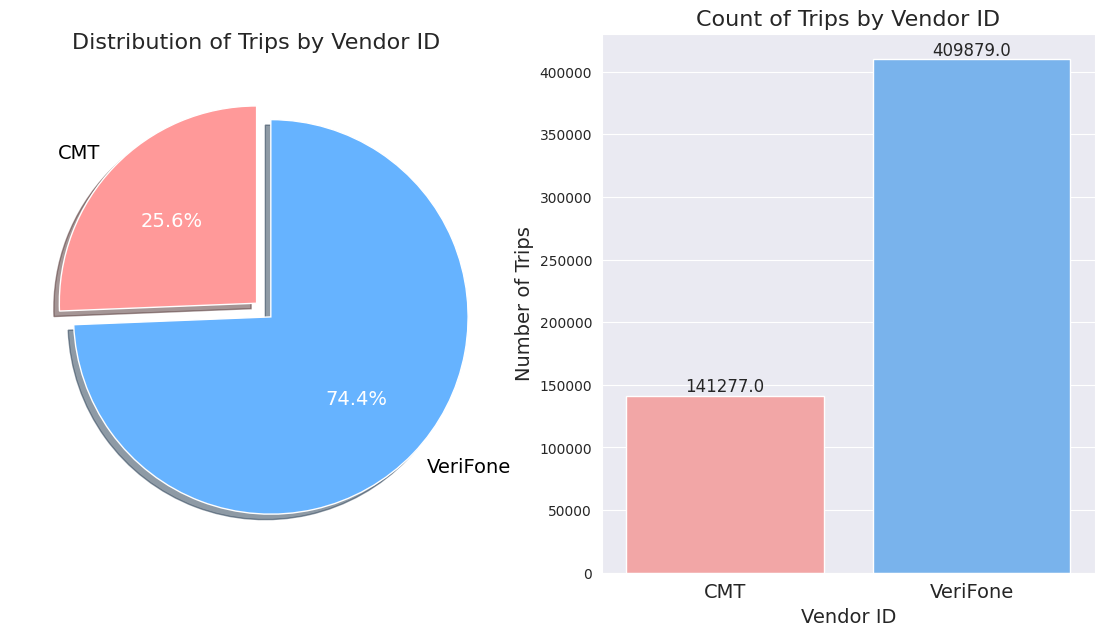

In [52]:
# Setting Colors & labels
colors = ["#ff9999", "#66b3ff"]
labels = ['CMT', 'VeriFone']

# Creating subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Pie chart
sizes = [df_sample[df_sample['vendor_id'] == 1].shape[0], df_sample[df_sample['vendor_id'] == 2].shape[0]]
explode = (0, 0.1)
wedges, texts, autotexts = axs[0].pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
                                     textprops={'fontsize': 14, 'color': 'black'}, shadow=True, startangle=90, colors=colors)
axs[0].set_title('Distribution of Trips by Vendor ID', fontsize=16)

# Percentage labels
for autotext in autotexts:
    autotext.set_color('white')

# Countplot
sns.countplot(x='vendor_id', data=df_sample, palette=colors, ax=axs[1])
for p in axs[1].patches:
    axs[1].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=12)

# Modifying the x-axis labels to match the metadata
axs[1].set_xticklabels(['CMT', 'VeriFone'], fontsize=14)
axs[1].set_title('Count of Trips by Vendor ID', fontsize=16)
axs[1].set_xlabel('Vendor ID', fontsize=14)
axs[1].set_ylabel('Number of Trips', fontsize=14)
plt.show()


**Observations:**

From the above plot, we can see:

* **Dominance of VeriFone Inc**: The majority of trips, **74.4%**, are handled by **VeriFone Inc** (vendor ID 2). This suggests that VeriFone is the leading provider in this dataset, capturing a large share of the taxi ride market.

* **Vendor Preference**: A significant **25.6%** of trips are provided by **Creative Mobile Technologies, LLC** (vendor ID 1), indicating that this vendor has a notable presence in the market, but it is still much lower than the other vendor.

* **Market Competition**: The stark contrast between the two vendors indicates a competitive landscape where one vendor significantly outperforms the other. This suggests that there is a scope for making strategic decisions for the underperforming vendor to enhance their services and attract more riders.

* **Potential for Growth**: Given that Creative Mobile Technologies has a smaller market share, there may be opportunities for growth through targeted marketing, improved service offerings, or partnerships to increase their visibility and ridership.



### **4.1.2 Frequency of Rides by Weather Conditions**

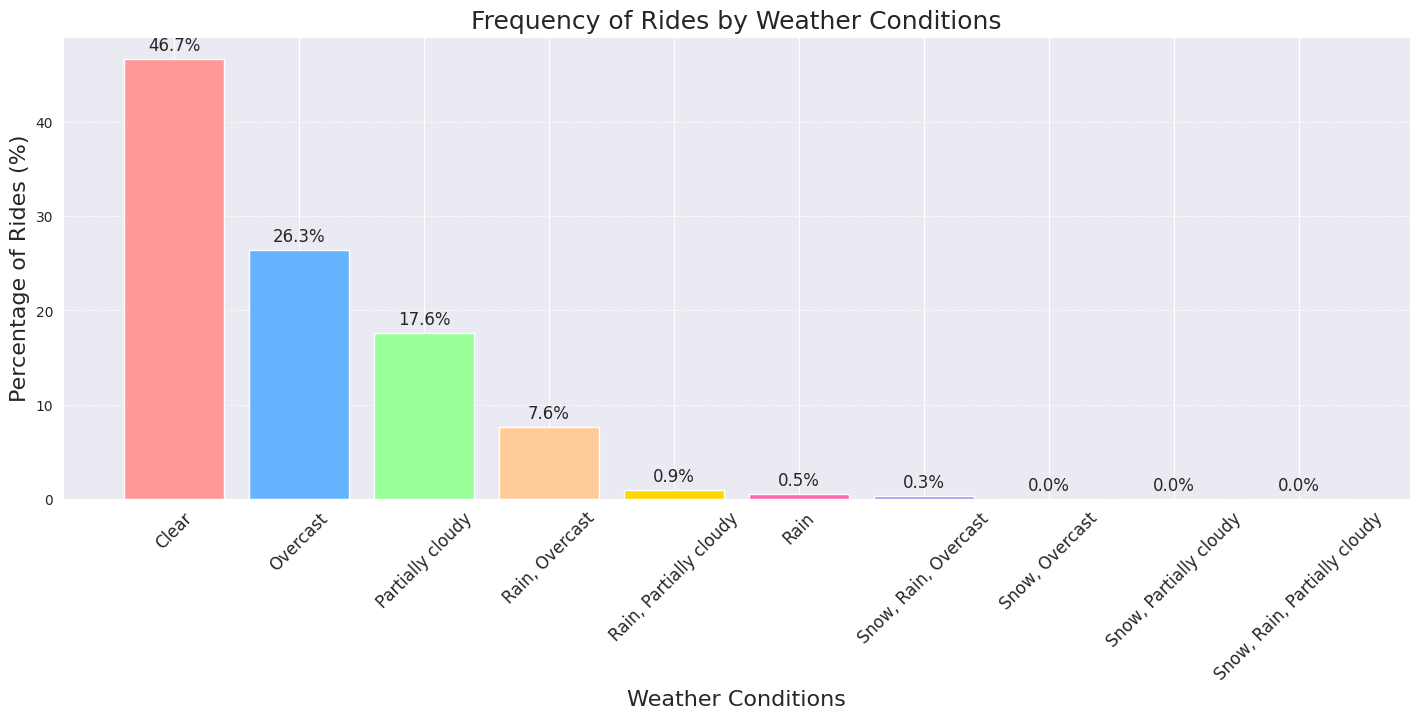

In [53]:
# Defining the color palette
color_palette = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#FFD700', '#FF66B2', '#9999FF', '#CCFF99', '#FF9966', '#9966FF']


# Grouping the data by weather conditions and counting the number of rides
weather_counts = df_sample['weather_conditions'].value_counts(normalize=True) * 100

# Creating a bar chart with the specified color palette
plt.figure(figsize=(14, 7))
colors = [color_palette[i] for i in range(len(weather_counts))]
bars = plt.bar(weather_counts.index, weather_counts.values, color=colors)
plt.title('Frequency of Rides by Weather Conditions', fontsize=18)
plt.xlabel('Weather Conditions', fontsize=16)
plt.ylabel('Percentage of Rides (%)', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding percentage symbols on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval:.1f}%', ha='center', va='bottom', fontsize=12)

plt.tight_layout(pad=0.01)
plt.show()

**Observations:**

* **Dominance of Clear Weather**: The above plot shows that rides during clear weather conditions account for a significant **46.7%** of total trips, indicating a strong preference for taxi usage on sunny days.

* **Impact of Overcast Conditions**: With **26.3%** of rides occurring during overcast conditions, this suggests that even when the sun isn't shining, people still use taxis, highlighting a consistent demand regardless of minor weather changes.

* **Minimal Rides in Inclement Weather**: The presence of **0.0%** rides during snow and rainy conditions points to a notable drop in taxi usage during severe weather conditions, which could be due to safety concerns and reduced mobility.

* **Strategic Marketing Opportunities**: Given the clear weather's popularity, taxi companies could enhance marketing efforts on sunny days, offering promotions or incentives to attract more riders when conditions are favorable.



### **4.1.3 Daily Trip Count**

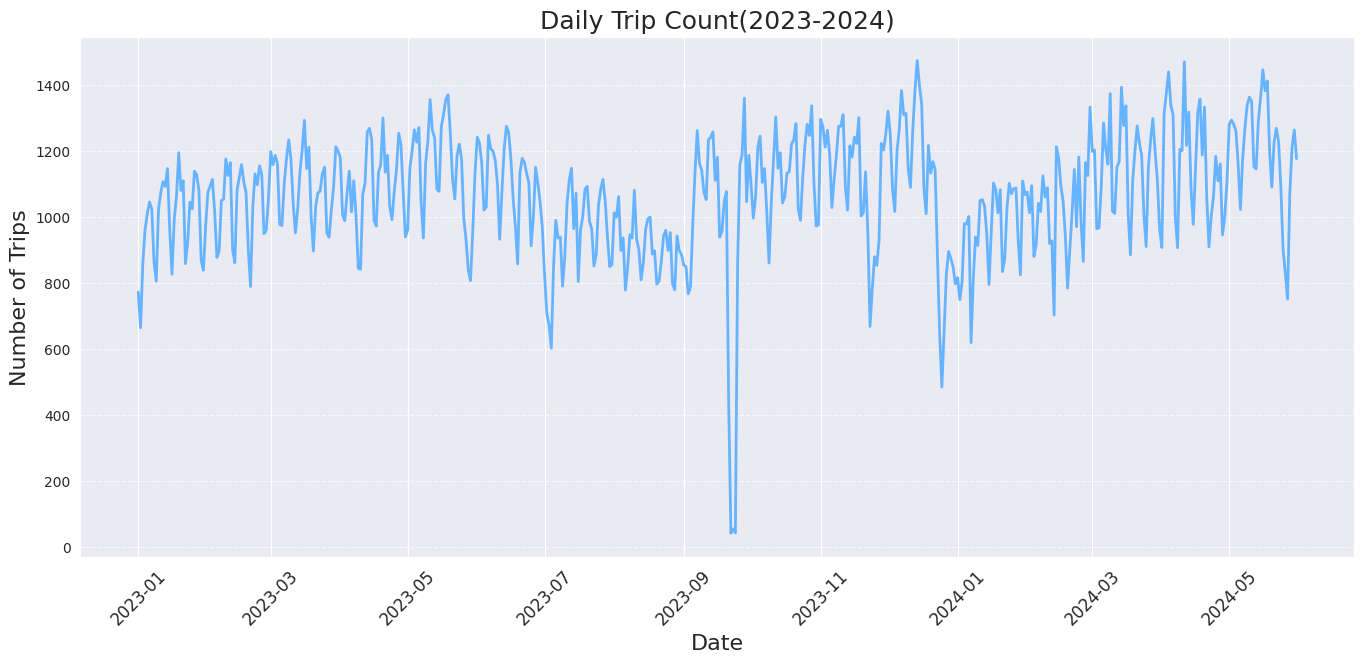

In [54]:
# Converting pickup_datetime to datetime format and extracting the date
df_sample['pickup_datetime'] = pd.to_datetime(df_sample['pickup_datetime'])
df_sample['date'] = df_sample['pickup_datetime'].dt.date

# Counting the number of trips per day
daily_trip_counts = df_sample['date'].value_counts().sort_index()

# Creating a line plot for daily trip counts
plt.figure(figsize=(14, 7))
plt.plot(daily_trip_counts.index, daily_trip_counts.values, color='#66B3FF', linestyle='-', linewidth=2)
plt.title('Daily Trip Count(2023-2024)', fontsize=18)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Number of Trips', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.tight_layout(pad=2.0)
plt.show()

**Observations:**

From the above plot, we can see that there is a consistent number of trips ranging between **500** to **1400** throughout most of the month.

* **Steep Dip in Late September**: Towards the end of September 2023, there is a noticeable drop of around **10** rides. On **September 29, 2023**, **heavy rainfall** led to flooding across portions of the New York metropolitan area and surrounding areas in the United States. This significant weather event likely impacted taxi usage during that time.

* **Patterns in Ride Frequency**: The overall pattern shows that while there are fluctuations, the trip counts remain relatively stable, pointing to a steady demand for taxi services.




### **4.1.4 Distribution of Taxi Rides by Pickup Hour**

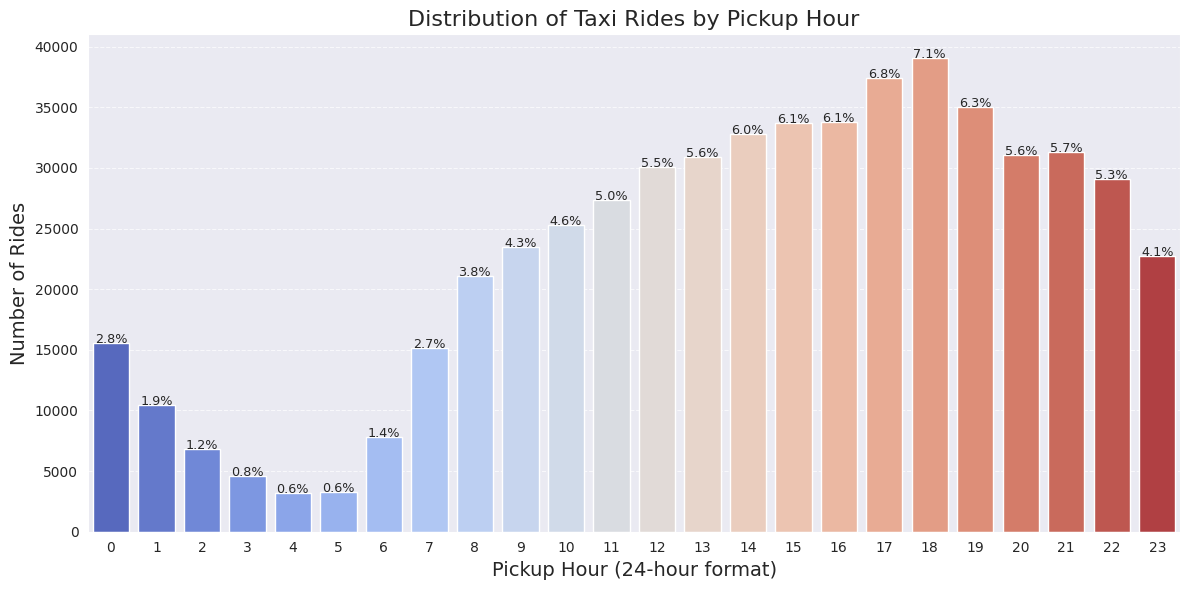

In [55]:
# Extracting the pickup hour from the pickup_datetime column
df_sample['pickup_hour'] = df_sample['pickup_datetime'].dt.hour

# Counting the number of rides per pickup hour
hourly_counts = df_sample['pickup_hour'].value_counts().sort_index()

# Setting up the figure for the plot
plt.figure(figsize=(12, 6))

# Creating a bar plot for pickup hour distribution with the 'coolwarm' palette
sns.barplot(x=hourly_counts.index, y=hourly_counts.values, palette='coolwarm')
plt.title('Distribution of Taxi Rides by Pickup Hour', fontsize=16)
plt.xlabel('Pickup Hour (24-hour format)', fontsize=14)
plt.ylabel('Number of Rides', fontsize=14)
plt.xticks(rotation=0)  # Keeping x-ticks horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding percentage annotations
total_rides = hourly_counts.sum()
for i in range(len(hourly_counts)):
    percentage = (hourly_counts.values[i] / total_rides) * 100
    plt.text(i, hourly_counts.values[i] + 1, f'{percentage:.1f}%', ha='center', fontsize=9.2)

# Adjusting layout
plt.tight_layout()
plt.show()


**Observations:**

Based on the above pickup hour distribution plot, we can make the following observations:

* **Minimal Activity in Early Morning**: The hours with the least number of rides are **4 AM** and **5 AM**, accounting for only **0.6%** of total rides, respectively. This suggests a significant drop in taxi usage during the early morning hours, likely due to reduced demand from commuters and nightlife activities.

* **Morning Rush Hour**: From **7 AM** to **9 AM**, there is a steady increase in the number of rides. This aligns with the typical morning rush hour as people commute to work or school.

* **Midday Consistency**: Throughout the midday hours from **10 AM** to **4 PM**, the number of rides remains relatively consistent, ranging from **4.6%** to **6.1%** per hour. This indicates a stable demand for taxi services during the day.

* **Evening Peak**: The number of rides starts to increase again from **5 PM**, reaching a peak at **6 PM** and **7 PM**, which have the highest number of rides at **6.8%** and **7.1%**, respectively. This suggests a strong demand for taxis during the evening rush hour as people commute back home or engage in evening activities.



### **4.1.5 Average Hourly Taxi Trips by Day of the Week**

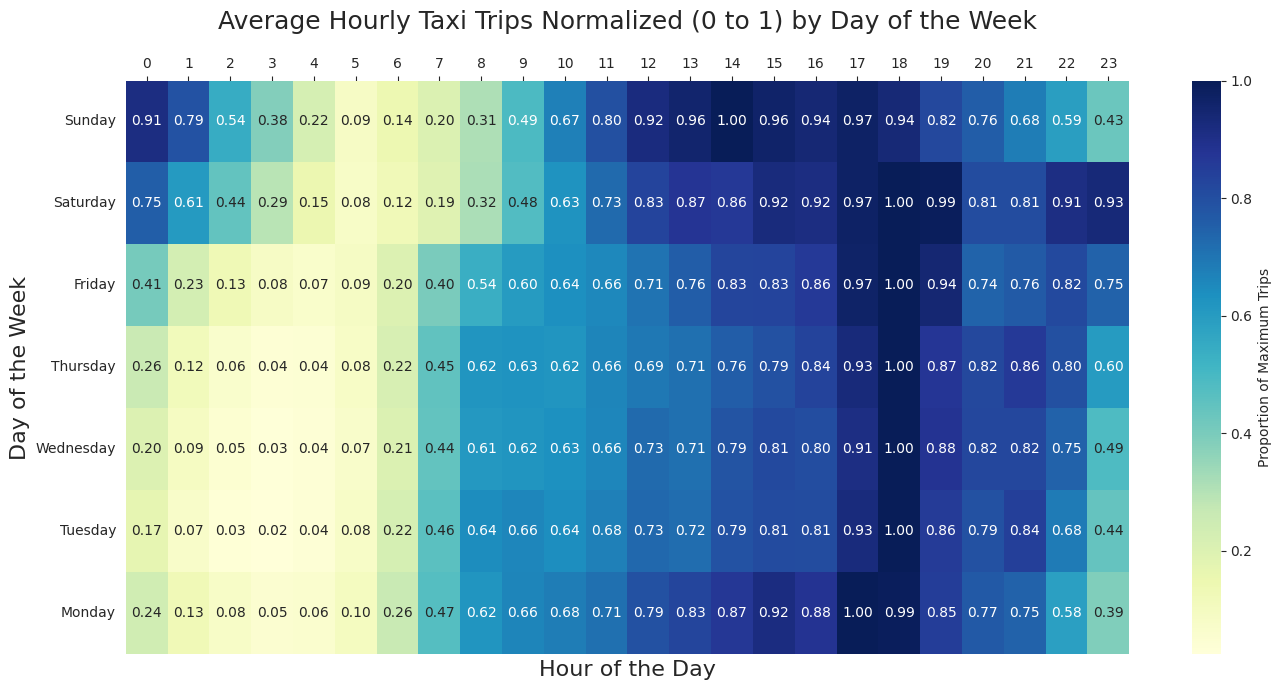

In [56]:
# Extracting hour and day of the week
df_sample['hour'] = df_sample['pickup_datetime'].dt.hour
df_sample['day_of_week'] = df_sample['pickup_datetime'].dt.day_name()

# Creating a pivot table to count the number of trips by hour and day of the week
trip_counts = df_sample.pivot_table(index='day_of_week', columns='hour', values='pickup_location_id', aggfunc='count', fill_value=0)

# Normalizing the data to a scale of 0 to 1
normalized_data = trip_counts.div(trip_counts.max(axis=1), axis=0)

# Reordering the days of the week for better visualization
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
normalized_data = normalized_data.reindex(days_order)

# Creating the heatmap
plt.figure(figsize=(14, 7))
sns.heatmap(normalized_data, cmap='YlGnBu', annot=True, fmt='.2f', cbar_kws={'label': 'Proportion of Maximum Trips'})
plt.title('Average Hourly Taxi Trips Normalized (0 to 1) by Day of the Week', fontsize=18, pad=20)  # Added padding
plt.xlabel('Hour of the Day', fontsize=16)
plt.ylabel('Day of the Week', fontsize=16)

# Adjusting the x-axis to show hours at the top
plt.xticks(rotation=0)
plt.yticks(rotation=0)

# Displaying the hour labels at the top
plt.gca().invert_yaxis()
plt.gca().xaxis.tick_top()
plt.tight_layout()
plt.show()


**Observations:**

From the above heatmap showing the average hourly taxi trips, we can make the following observations:

* **Peak Usage on Weekends**: The heatmap indicates that Saturdays and Sundays have the highest normalized trip values, especially during the late afternoon and evening hours. This suggests that people are more likely to use taxis for leisure activities on weekends.

* **Early Morning Activity**: On weekdays, particularly Monday to Friday, there is a noticeable increase in taxi usage starting from early morning around **6 AM** to **9 AM**, which likely corresponds to commuters heading to work.

* **Evening Surge**: The hours between **5 PM** and **8 PM** show high trip counts across all days, indicating a common pattern of people returning home from work or going out for evening activities.

* **Lowest Usage During Late Night**: The values drop significantly during the late night hours (from **12 AM** to **5 AM**), reflecting lower demand for taxis during these times, which is typical as fewer people are traveling.

These observations can help taxi services understand customer behavior and optimize their operations, such as adjusting driver availability and marketing strategies based on peak usage times.

### **4.1.6 Average Number of Taxi Rides by Day of the Week**

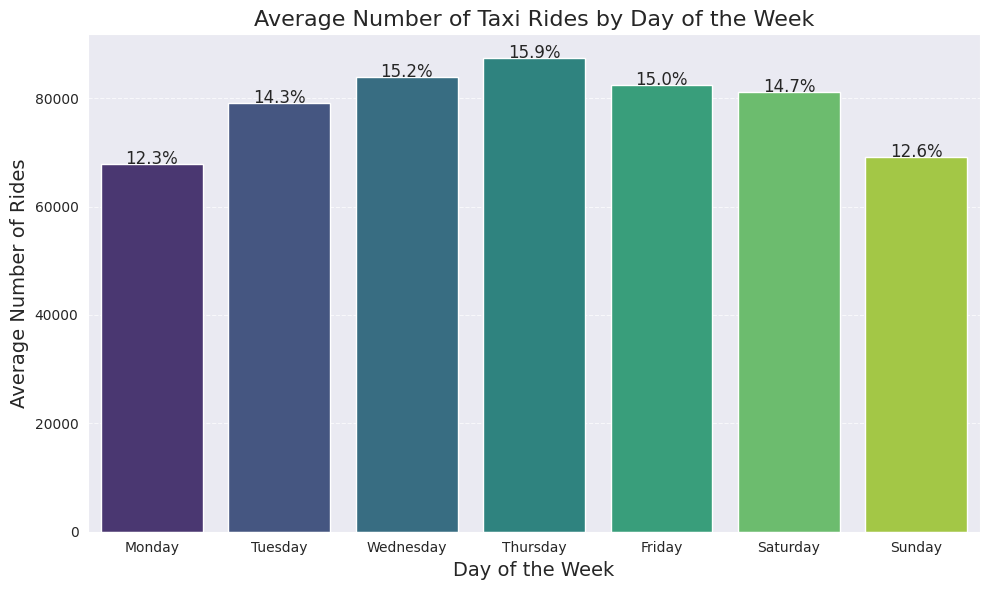

In [57]:
# Extracting the day of the week from the pickup_datetime column
df_sample['pickup_weekday'] = df_sample['pickup_datetime'].dt.day_name()

# Calculating the average number of rides per weekday
weekday_counts = df_sample.groupby('pickup_weekday')['vendor_id'].count()
weekday_counts = weekday_counts.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Setting up the figure for the plot
plt.figure(figsize=(10, 6))

# Creating a bar plot for average rides per weekday
sns.barplot(x=weekday_counts.index, y=weekday_counts.values, palette='viridis')
plt.title('Average Number of Taxi Rides by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Average Number of Rides', fontsize=14)
plt.xticks(rotation=0, ha='center')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding percentage annotations
total_rides = weekday_counts.sum()
for i in range(len(weekday_counts)):
    percentage = (weekday_counts.values[i] / total_rides) * 100
    plt.text(i, weekday_counts.values[i] + 1, f'{percentage:.1f}%', ha='center', fontsize=12)

# Adjusting layout
plt.tight_layout()
plt.show()


**Observations:**

From the above average number of taxi rides by weekday, we can see:

* **Consistent Demand**: The percentage of rides remains relatively consistent throughout the week, with values ranging from **12.3%** on Monday to **15.9%** on Thursday. This indicates that taxi services maintain a steady demand across the weekdays.

* **Peak Usage on Weekdays**: **Thursday** shows the highest percentage of rides at **15.9%**, suggesting that this day may be particularly popular for commuting, social outings, or events, leading to increased taxi usage.

* **Strong Weekend Participation**: **Sunday** has a percentage of **12.6%**, which is slightly higher than Monday and indicates that there is still significant taxi usage on weekends, possibly due to leisure activities and events.

* **Midweek Growth**: **Wednesday** and **Tuesday** show percentages of **15.2%** and **14.3%**, respectively. This suggests a gradual increase in taxi usage as the week progresses, likely due to midweek activities and the approach of the weekend.



### **4.1.7 Passenger Count Distribution**

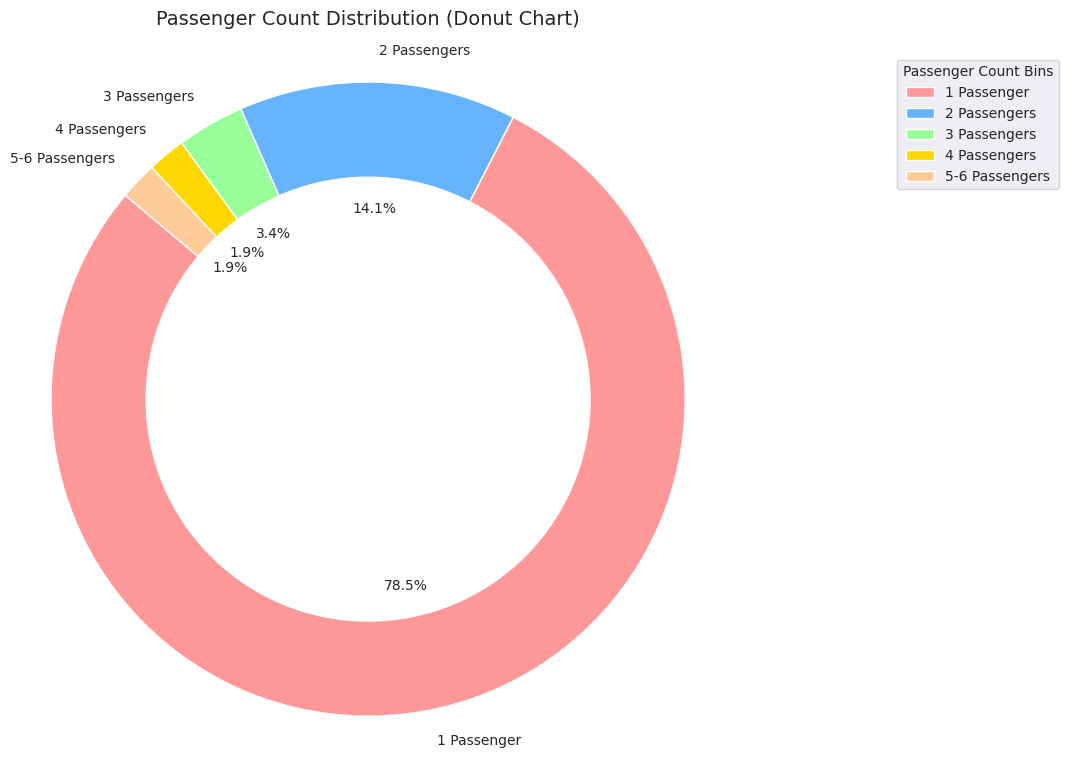

In [58]:
# According to NYC taxi rules, maximum no. of passengers allowed in cab are 4 +1 (child) and for mini van 5 +1 (child). Hence we are focussing on the passenger count till 6.

# Binning the passenger count into specified categories
bins = [0, 1.1, 2.1, 3.1, 4.1, 6.1]
labels = ['1 Passenger', '2 Passengers', '3 Passengers', '4 Passengers', '5-6 Passengers']
df_sample['passenger_count_bins'] = pd.cut(df_sample['passenger_count'], bins=bins, labels=labels, right=False)

# Counting the number of trips in each bin
passenger_count_distribution = df_sample['passenger_count_bins'].value_counts(normalize=True) * 100

# Creating a donut chart
plt.figure(figsize=(9, 9))
plt.pie(passenger_count_distribution, labels=passenger_count_distribution.index, autopct='%1.1f%%', startangle=140, colors=['#FF9999', '#66B3FF', '#99FF99', '#FFD700', '#FFCC99'])
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Passenger Count Distribution (Donut Chart)', fontsize=14, pad=20)
plt.axis('equal')

# Adding a legend in the specified order
plt.legend(labels, title='Passenger Count Bins', loc='upper right', bbox_to_anchor=(1.5, 1))
plt.show()


**Observations:**

From the above plot, we can make the following observations:

* **Predominance of Single Passengers**: A significant **78.5%** of rides have **1 passenger**, indicating that solo travelers are the primary users of taxi services. This suggests a strong demand for individual rides, which could be driven by commuters or people traveling alone.

* **Limited Use of Two Passengers**: The **14.1%** of rides with **2 passengers** shows that while there is some demand for shared rides, it is notably lower than the demand for single passenger trips. This could indicate that people often travel alone or that couples may opt for other transportation options.

* **Minimal Demand for Three Passengers**: With only **3.4%** of rides having **3 passengers**, it appears that they are less common in taxi usage. This suggests that taxis are not typically used for small group outings.

* **Small Percentage for Four Passengers**: The **1.9%** of rides with **4 passengers** indicates that this is within the standard capacity for regular NYC taxis, which can legally accommodate up to four adult passengers. Additionally, children under the age of seven are permitted to sit on an adult's lap, which could allow for a fifth passenger.

* **Small Percentage for Five to Six Passengers:** The **1.9%** of rides with **5-6 passengers** represent a niche market for larger groups. In NYC, minivan cabs can legally accommodate up to **5 adult passengers**, and with children under the age of seven allowed to sit on an adult's lap, this could potentially increase the capacity to **6 in minivan cabs**.


### **4.1.8 Trip Duration Distribution**

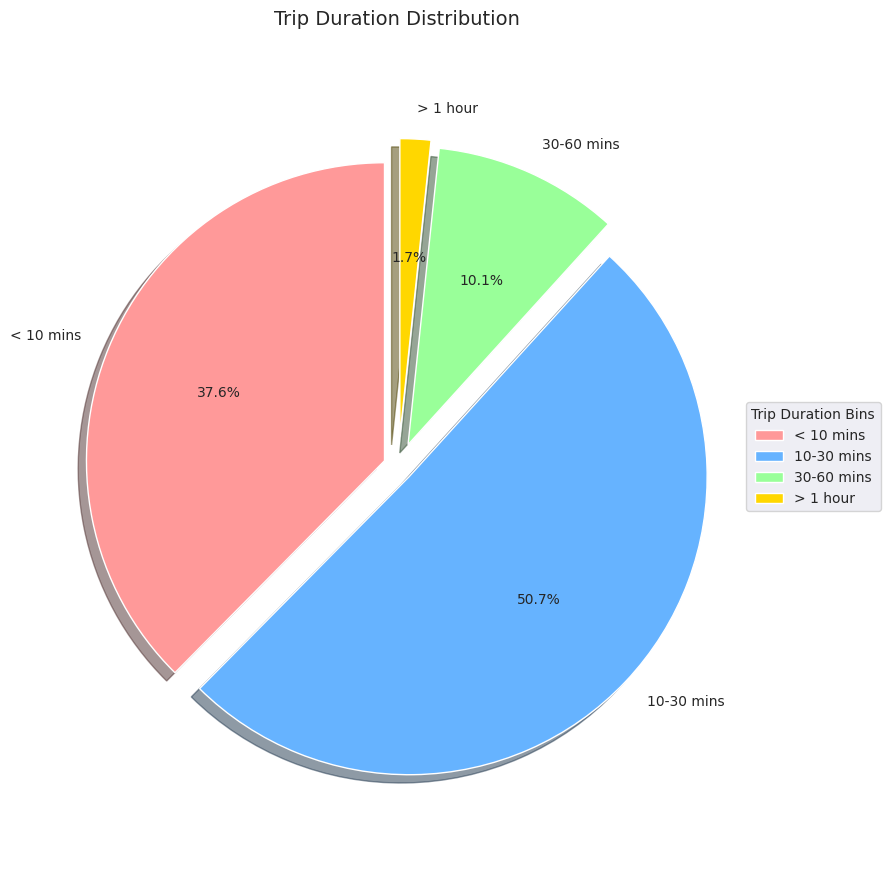

In [59]:
# Binning the trip duration into specified categories
bins_duration = [0, 10, 30, 60, float('inf')]
labels_duration = ['< 10 mins', '10-30 mins', '30-60 mins', '> 1 hour']
df_sample['trip_duration_bins'] = pd.cut(df_sample['trip_duration_hours'] * 60, bins=bins_duration, labels=labels_duration, right=False)

# Counting the number of trips in each bin for trip duration
trip_duration_distribution = df_sample['trip_duration_bins'].value_counts(normalize=True) * 100

# Reindex the distribution to ensure it follows the original label order
trip_duration_distribution = trip_duration_distribution.reindex(labels_duration)

# Creating the pie chart for trip duration
plt.figure(figsize=(9, 9))
explode_duration = [0.05, 0.05, 0.08, 0.1]  # Exploding the slices

# Pie chart for trip duration
wedges, texts, autotexts = plt.pie(trip_duration_distribution, labels=trip_duration_distribution.index,
                                   autopct='%1.1f%%', startangle=90,
                                   colors=['#FF9999', '#66B3FF', '#99FF99', '#FFD700'],
                                   explode=explode_duration, shadow=True)
plt.axis('equal')
plt.title('Trip Duration Distribution', fontsize=14)

# Adding the legend
plt.legend(wedges, labels_duration, title="Trip Duration Bins", loc="center left", bbox_to_anchor=(1.001, 0, 0.45, 1))

plt.tight_layout()
plt.show()


**Observations:**
Here are the observations based on the above trip duration distribution plot.

1. **Majority of Trips are Short**: A significant **50.7%** of trips are completed within **30 minutes**. This suggests that most passengers use taxis for quick, local trips rather than longer journeys.

2. **High Proportion of Very Short Trips**: A notable **37.6%** of rides are **less than 10 minutes**. This highlights a strong demand for extremely short trips, which could be attributed to factors such as:
   - Frequent short-distance travel within neighborhoods
   - Quick trips to nearby locations or destinations
   - Convenience for passengers who need a fast mode of transportation

3. **Moderate Share of Medium-Length Trips**: Around **10.1%** of trips fall into the **30 to 60 minute** category. This indicates that while longer trips are less common than short ones, there is still a notable demand for medium-length journeys.

4. **Minimal Demand for Extended Trips**: Only **1.7%** of rides exceed **1 hour**. This suggests that extended taxi trips are infrequent, possibly due to:
   - Availability of alternative transportation options for longer distances
   - Preference for other modes of travel, such as personal vehicles or ridesharing services
   - Higher costs associated with longer taxi rides

These insights can help taxi services optimize their operations, fleet management, and marketing strategies to better cater to the predominant demand for short and very short trips while still accommodating the needs of passengers who require medium-length or longer rides.

### **4.1.9 Trip Distance Distribution**

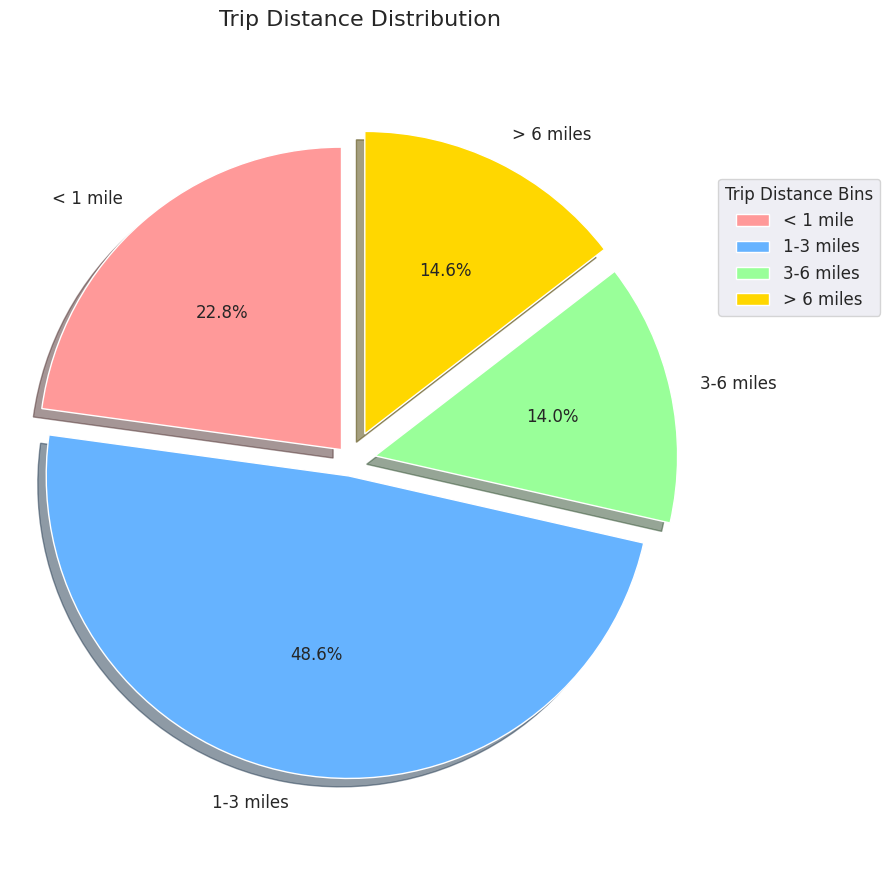

In [60]:
# Binning the trip distance into specified categories
bins_distance = [0, 1, 3, 6, float('inf')]
labels_distance = ['< 1 mile', '1-3 miles', '3-6 miles', '> 6 miles']
df_sample['trip_distance_bins'] = pd.cut(df_sample['trip_distance'], bins=bins_distance, labels=labels_distance, right=False)

# Counting the number of trips in each bin for trip distance
trip_distance_distribution = df_sample['trip_distance_bins'].value_counts(normalize=True) * 100

# Reindex the distribution to ensure it follows the original label order
trip_distance_distribution = trip_distance_distribution.reindex(labels_distance)

# Creating the pie chart for trip distance
plt.figure(figsize=(9, 9))
explode_distance = [0.05, 0.05, 0.08, 0.1]

# Pie chart for trip distance
wedges, texts, autotexts = plt.pie(trip_distance_distribution, labels=trip_distance_distribution.index,
                                    autopct='%1.1f%%', startangle=90,
                                    colors=['#FF9999', '#66B3FF', '#99FF99', '#FFD700'],
                                    explode=explode_distance, shadow=True,
                                    textprops={'fontsize': 12})
plt.axis('equal')
plt.title('Trip Distance Distribution', fontsize=16, pad=10)

# Adding the legend
plt.legend(wedges, labels_distance, title="Trip Distance Bins", loc="center left", bbox_to_anchor=(1.001, 0.25, 0.9, 1), prop={'size': 12}, title_fontsize=12)

plt.tight_layout()
plt.show()


**Observations:**

From the trip distance distribution data, we can draw following insights:

* **Dominance of Short to Moderate Distances**: A significant **48.6%** of trips fall within the **1 to 3 miles** category. This indicates that a substantial portion of taxi rides are relatively short, suggesting that many passengers use taxis for local travel, such as commuting within neighborhoods or running errands.

* **Notable Share of Very Short Trips**: The **22.8%** of rides that are **less than 1 mile** highlights a strong demand for very short trips. This could reflect frequent short-distance travel, such as quick rides to nearby locations, which may be common in urban areas.

* **Limited Use for Longer Distances**: Both the **3 to 6 miles** and **greater than 6 miles** categories account for **14%** and **14.6%**, respectively. This suggests that longer taxi rides are less common, indicating that passengers may prefer other forms of transportation for longer distances or that these trips are less frequent.

* **Potential for Growth in Longer Distances**: The relatively low percentages for trips greater than 6 miles suggest a potential opportunity for taxi services to market themselves for longer journeys, especially if they can provide competitive pricing or convenience compared to other transportation options.



### **4.1.10 Distribution of Total Fare Amount**

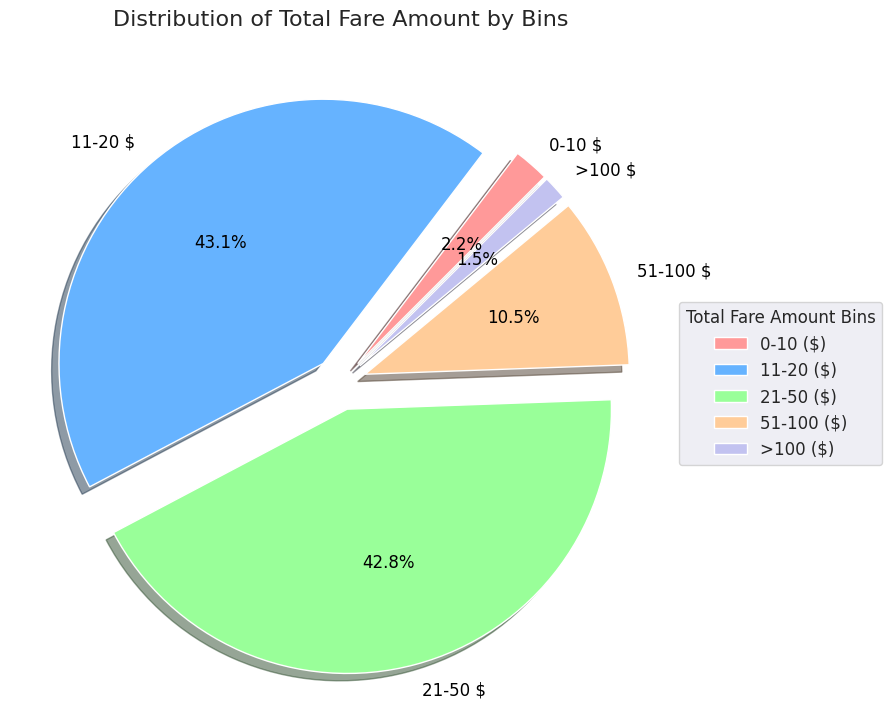

In [61]:
# Creating bins for total fare amounts
bins = [0, 10, 20, 50, 100, float('inf')]  # Defining the bins
labels = ['0-10', '11-20', '21-50', '51-100', '>100']  # Defining the labels for the bins

# Using pd.cut to create a new column 'fare_bins' based on the defined bins
df_sample['fare_bins'] = pd.cut(df_sample['total_fare_amount'], bins=bins, labels=labels, right=False)

# Counting the number of rides in each fare bin
fare_counts = df_sample['fare_bins'].value_counts().sort_index()

# Setting up the figure for the pie chart
plt.figure(figsize=(9, 9))

# Creating an exploding pie chart
explode = (0.1, 0.1, 0.1, 0.1, 0.1)  # Exploding the last slice (>100) for emphasis
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']  # Defining a colorful palette

# Plotting the pie chart with the counts and customizations
wedges, texts, autotexts = plt.pie(fare_counts, explode=explode, labels=[f'{label} $' for label in fare_counts.index],
                                    autopct='%1.1f%%', textprops={'fontsize': 12, 'color': 'black'},
                                    shadow=True, startangle=45, colors=colors
                                  )

# Adding a legend to the pie chart
plt.legend(wedges, [f'{label} ($)' for label in fare_counts.index], title="Total Fare Amount Bins", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), prop={'size': 12}, title_fontsize=12)

# Setting the title for the pie chart with a gap
plt.title('Distribution of Total Fare Amount by Bins', fontsize=16, pad=20)

# Changing the color of the percentage labels to black for better visibility
for autotext in autotexts:
    autotext.set_color('black')

# Adjusting layout to make it look neat
plt.tight_layout()
plt.show()


**Observations:**

From the above plot, we can see the distribution of total fare amounts across different bins. It is important to note that we are ignoring any invalid values, such as negative fares, as these could be due to system anomalies or data entry errors. This ensures that our analysis focuses on valid and meaningful data

* **Prevalence of Mid-Range Fares**: The above plot shows that the fare range of **11-20$** accounts for a substantial **43.1%** of total rides, indicating that many passengers are likely opting for shorter trips or moderate fares.

* **Strong Usage of Lower Fares**: With **42.8%** of rides falling within the **21-50$** range, it suggests that a significant portion of customers are willing to pay a bit more for their rides, possibly for longer distances or premium services.

* **Limited High Fare Rides**: The **>100$** fare category only represents **1.5%** of the total rides. This low percentage could indicate that very few passengers are taking long-distance or luxury rides, which might be a point of concern for taxi companies looking to expand their service offerings.

* **Ignoring Invalid Values**: It is important to note that we are ignoring any invalid values, such as negative fares, as these could be due to system anomalies or data entry errors. This ensures that our analysis focuses on valid and meaningful data.

* **Opportunities for Promotions**: Given that most rides are concentrated in the lower fare ranges, taxi services could consider implementing targeted promotions or loyalty programs to encourage more rides in the higher fare categories, potentially increasing overall revenue.



### **4.1.11 Distribution of Taxi Rides by Borough and Top 10 Pickup Zones**

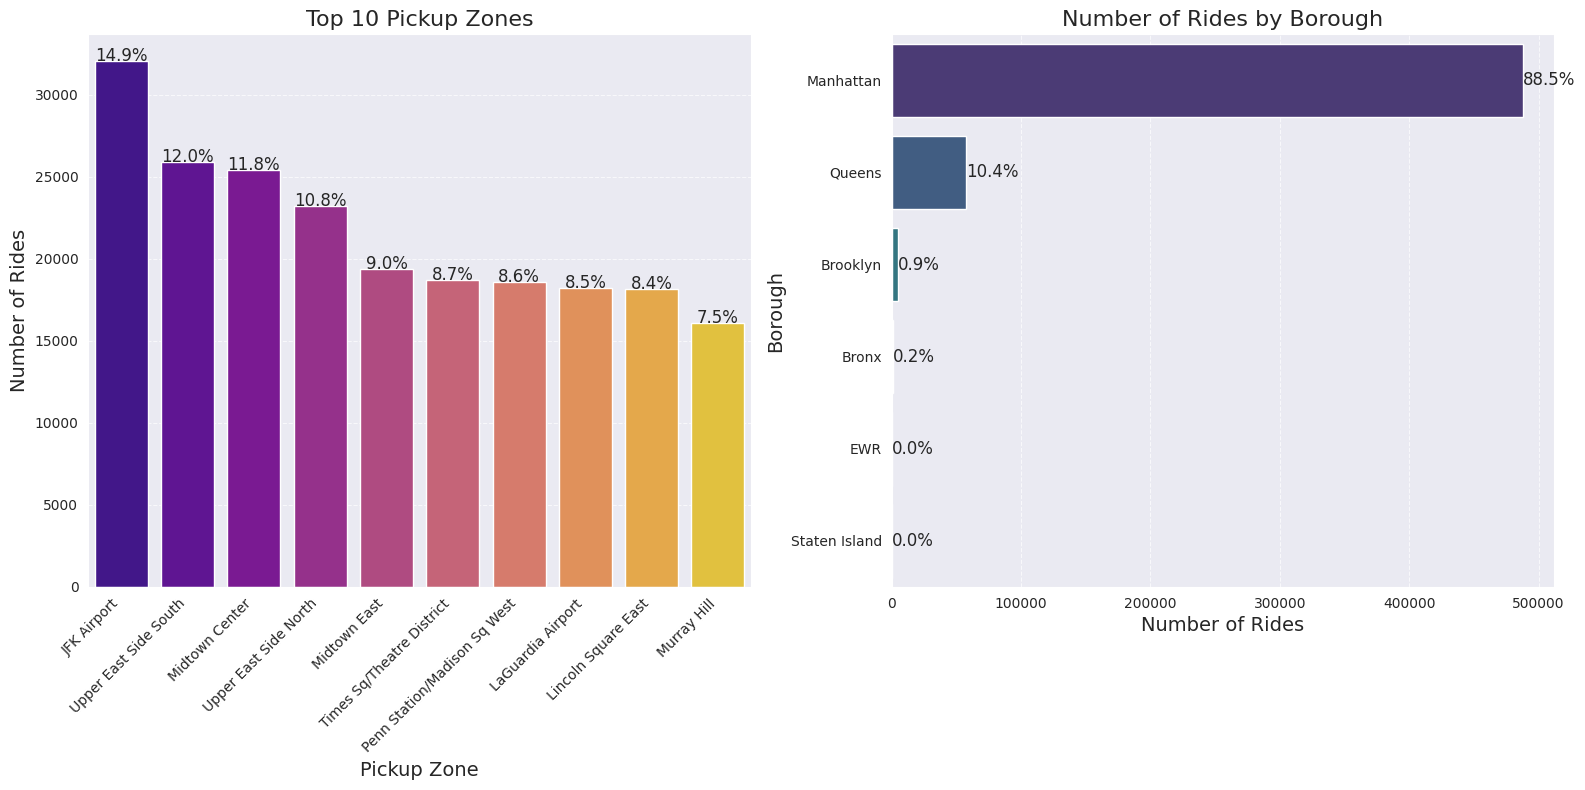

In [62]:
# Counting the number of rides per borough
borough_counts = df_sample['pickup_borough'].value_counts()
borough_percentage = borough_counts / borough_counts.sum() * 100

# Getting the top 10 pickup zones
top_pickup_zones = df_sample['pickup_zone'].value_counts().nlargest(10)
pickup_zone_percentage = top_pickup_zones / top_pickup_zones.sum() * 100

# Setting up the figure for subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Plotting the top 10 pickup zones in a vertical bar chart
sns.barplot(x=top_pickup_zones.index, y=top_pickup_zones.values, ax=ax1, palette='plasma')
ax1.set_title('Top 10 Pickup Zones', fontsize=16)
ax1.set_xlabel('Pickup Zone', fontsize=14)
ax1.set_ylabel('Number of Rides', fontsize=14)
ax1.set_xticklabels(top_pickup_zones.index, rotation=45, ha='right')
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Adding percentage annotations for pickup zones
for i in range(len(top_pickup_zones)):
    ax1.text(i, top_pickup_zones.values[i] + 1, f'{pickup_zone_percentage[i]:.1f}%', ha='center', fontsize=12)

# Plotting the number of rides per borough in a horizontal bar chart
sns.barplot(x=borough_counts.values, y=borough_counts.index, ax=ax2, palette='viridis')
ax2.set_title('Number of Rides by Borough', fontsize=16)
ax2.set_xlabel('Number of Rides', fontsize=14)
ax2.set_ylabel('Borough', fontsize=14)
ax2.grid(axis='x', linestyle='--', alpha=0.7)

# Adding percentage annotations for boroughs
for i in range(len(borough_counts)):
    ax2.text(borough_counts.values[i] + 1, i, f'{borough_percentage[i]:.1f}%', va='center', fontsize=12)

# Adjusting layout
plt.tight_layout()
plt.show()


**Observations for Borough Distribution**:

1. **Manhattan dominates**: The vast majority of taxi rides, **88.5%**, originate in Manhattan. This is not surprising given Manhattan's high population density, numerous attractions, and concentration of businesses.

2. **Queens has notable share**: With **10.4%** of rides starting in Queens, it has the second highest share after Manhattan. This could be attributed to the presence of major airports (JFK and LaGuardia) in Queens.

3. **Outer boroughs have low shares**: Brooklyn, the Bronx, Newark Airport(EWR) and Staten Island each account for around 1% of taxi rides. This suggests that outer boroughs are underserved by taxis compared to Manhattan and Queens.

**Observations for Top Pickup Zones**:

1. **Airports are top pickup locations**: The top two pickup zones are JFK Airport (**14.9%**) and LaGuardia Airport (**8.5%**), indicating a significant portion of taxi rides are airport transfers.

2. **Midtown Manhattan is popular**: Upper East Side South (**12.0%**) and Midtown Center (**11.8%**) are among the top pickup zones, likely due to the high concentration of businesses, hotels, and tourist attractions in these areas.

3. **Other Manhattan neighborhoods have notable shares**: Lincoln Square East (**8.4%**) and Murray Hill (**7.5%**) also feature in the top 10 pickup zones, demonstrating the popularity of taxis across various Manhattan neighborhoods.

These observations highlight the dominance of Manhattan and airports in taxi ride origins, while also revealing the relatively low usage of taxis in outer boroughs. The data suggests opportunities to improve taxi accessibility in underserved areas and to cater to the significant demand for airport transfers.


### **4.1.12 Distribution of Taxi Rides by Payment Type**

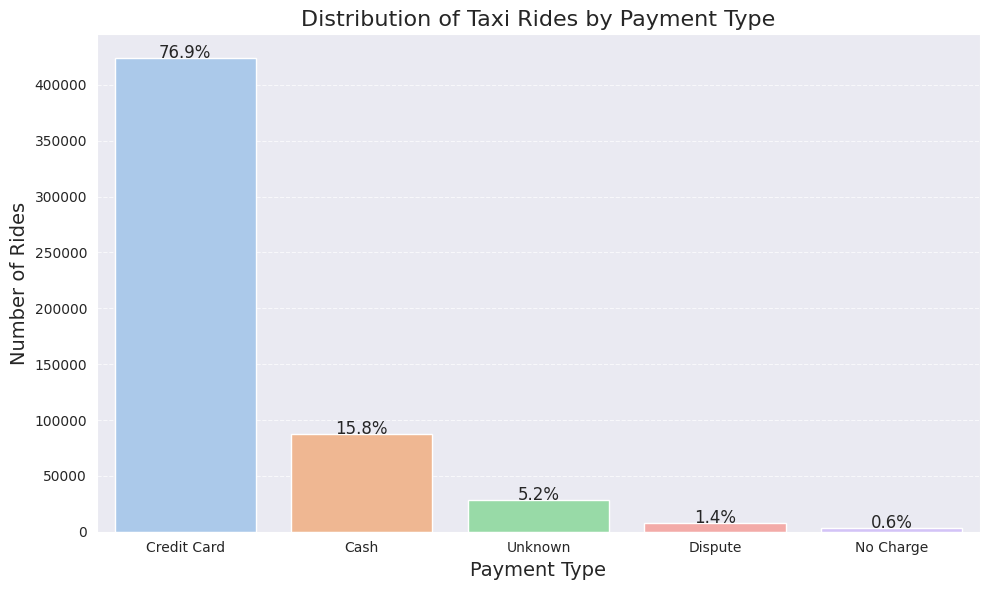

In [63]:
# Mapping payment type IDs to their descriptive names
payment_type_mapping = {
    1: 'Credit Card',
    2: 'Cash',
    3: 'No Charge',
    4: 'Dispute',
    5: 'Unknown',
    6: 'Voided Trip'
}

# Counting the number of rides per payment type
payment_counts = df_sample['payment_type'].value_counts().rename(index=payment_type_mapping)

# Setting up the figure for the plot
plt.figure(figsize=(10, 6))

# Creating a vertical bar plot for payment type distribution
sns.barplot(x=payment_counts.index, y=payment_counts.values, palette='pastel')
plt.title('Distribution of Taxi Rides by Payment Type', fontsize=16)
plt.xlabel('Payment Type', fontsize=14)
plt.ylabel('Number of Rides', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding percentage annotations
total_rides = payment_counts.sum()
for i in range(len(payment_counts)):
    percentage = (payment_counts.values[i] / total_rides) * 100
    plt.text(i, payment_counts.values[i] + 1, f'{percentage:.1f}%', ha='center', fontsize=12)

# Adjusting layout
plt.tight_layout()
plt.show()


**Observations:**

From the above payment type distribution plot, we can see:

* **Dominance of Credit Card Payments**: A significant **76.9%** of taxi rides are paid for using credit cards. This indicates a strong preference among passengers for cashless transactions, likely due to convenience and the ease of digital payments.

* **Cash Transactions**: Cash payments account for **15.8%** of rides, showing that while digital payments dominate, there is still a notable portion of passengers who prefer to pay with cash. This could be particularly relevant for certain demographics or situations where cash is more accessible.

* **Minimal Use of Other Payment Types**: The combined percentage of other payment types, including **unknown** (5.2%), **dispute** (1.4%), and **no charge** (0.6%), is relatively low. The presence of a significant percentage of **unknown** payments suggests that there may be issues with data entry or reporting, which is masking the true nature of payment preferences.

* **Opportunity for Improvement**: Given the low percentages of dispute and no charge payments, taxi services might consider enhancing their payment systems to address any issues that lead to disputes or to clarify situations where rides are provided at no charge. This could help improve customer satisfaction and streamline the operations.



### **4.1.13 Distribution of Taxi Rides by Rate Code**

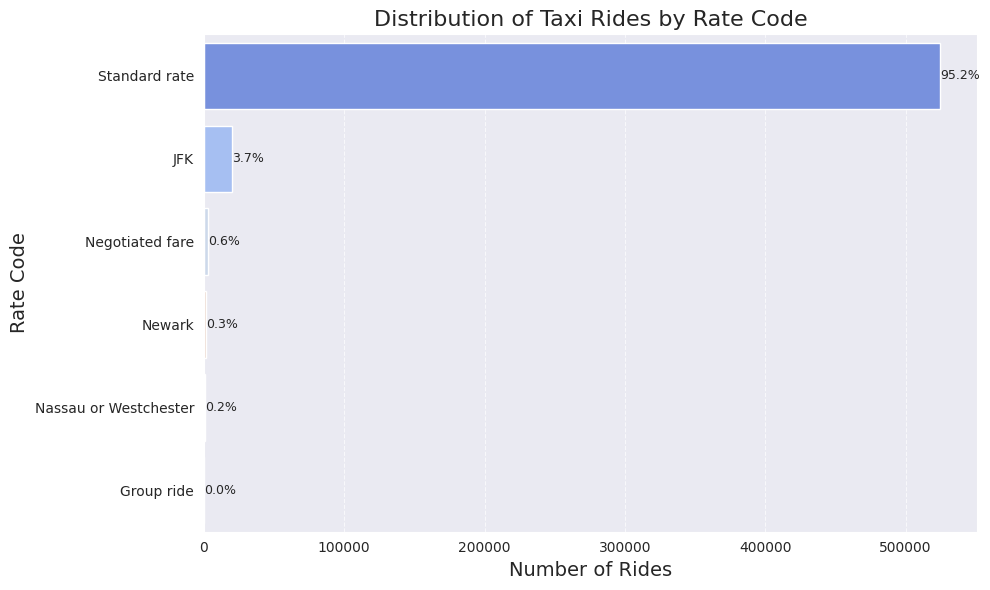

In [64]:
# Mapping rate code IDs to their descriptive names
rate_code_mapping = {
    1: 'Standard rate',
    2: 'JFK',
    3: 'Newark',
    4: 'Nassau or Westchester',
    5: 'Negotiated fare',
    6: 'Group ride'
}

# Counting the number of rides per rate code
rate_counts = df_sample['rate_code_id'].value_counts().rename(index=rate_code_mapping)

# Setting up the figure for the plot
plt.figure(figsize=(10, 6))

# Creating a horizontal bar plot for rate code distribution
sns.barplot(x=rate_counts.values, y=rate_counts.index, palette='coolwarm')
plt.title('Distribution of Taxi Rides by Rate Code', fontsize=16)
plt.xlabel('Number of Rides', fontsize=14)
plt.ylabel('Rate Code', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adding percentage annotations
total_rides = rate_counts.sum()
for i in range(len(rate_counts)):
    percentage = (rate_counts.values[i] / total_rides) * 100
    plt.text(rate_counts.values[i] + 1, i, f'{percentage:.1f}%', va='center', fontsize=9)

# Adjusting layout
plt.tight_layout()
plt.show()


**Observations:**

Based on the above distribution of taxi rides by rate code, we can make the following observations:

* **Dominance of Standard Rate**: The **Standard rate** accounts for an overwhelming **95.2%** of all taxi rides. This indicates that the majority of passengers are charged the regular fare without any special rate codes applied.

* **Significant Share of JFK Rides**: Rides with the **JFK** rate code make up **3.7%** of the total. While lower than the standard rate, this is still a notable percentage, suggesting that a sizable portion of passengers are traveling to or from the John F. Kennedy International Airport.

* **Minimal Usage of Other Rate Codes**: The remaining rate codes, such as **Negotiated fare** (0.6%), **Newark** (0.3%), **Nassau or Westchester** (0.2%), and **Group ride** (0.0%), have significantly lower percentages. This implies that these rate codes are used infrequently compared to the standard rate and JFK.

* **Potential for Targeted Marketing**: Given the dominance of the standard rate, taxi companies could explore opportunities to promote the use of other rate codes, such as the JFK rate, to capture a larger share of airport-related rides. Targeted marketing campaigns or partnerships with airport-related businesses could help increase the usage of these rate codes.

* **Data Anomaly for Group Ride**: The **0.0%** share of group rides raises a question about whether this rate code is being used at all or if there are any data anomalies or inconsistencies in recording group rides.



### **4.1.14 Distribution of Temperature and Windspeed**

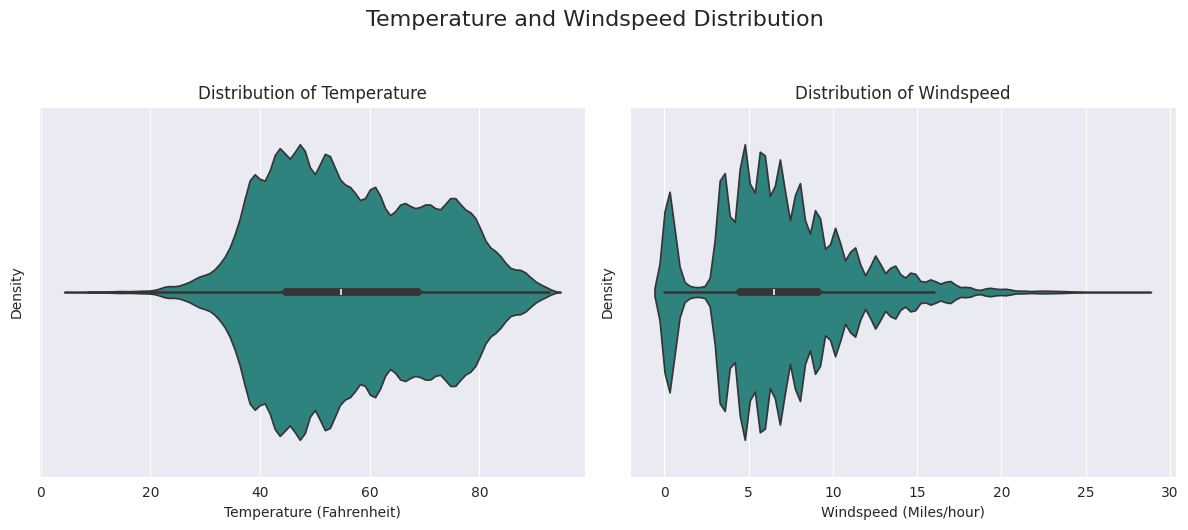

In [65]:
# Plotting Numerical Features
plt.rcParams['figure.figsize'] = (12, 5)

# Selecting Numerical Columns for Violin Plots
selected_columns = ['temperature', 'windspeed']

# Subplots
fig, axs = plt.subplots(nrows=1, ncols=2, sharey=False)
axs = axs.flatten()

# Looping through selected columns
for i, column in enumerate(selected_columns):
    if column == 'temperature':
        sns.violinplot(x=df_sample[column], ax=axs[i], palette='viridis')
        axs[i].set_title('Distribution of Temperature')
        axs[i].set_xlabel('Temperature (Fahrenheit)')
    elif column == 'windspeed':
        sns.violinplot(x=df_sample[column], ax=axs[i], palette='viridis')
        axs[i].set_title('Distribution of Windspeed')
        axs[i].set_xlabel('Windspeed (Miles/hour)')
    axs[i].set_ylabel('Density')

plt.suptitle('Temperature and Windspeed Distribution', fontsize=16, y=1.05)
plt.tight_layout()
plt.show()


**Observations:**

From the above violin plots, we can see the distributions of temperature and windspeed:

* **Temperature Distribution**: The plot for temperature shows that most of the data is concentrated between **40 to 50°F**. This indicates that the majority of observations fall within this range, suggesting a common climate condition during the data collection period. The very low density from **0 to 20°F** indicates that extreme cold temperatures are rare in this dataset.

* **Windspeed Characteristics**: The windspeed plot reveals a small concentration of values between **0 to 3** units, indicating that there are some instances of very low wind speeds. As windspeed increases to **4**, we see a gradual increase in density, peaking around **6** units before slowly tapering off to **28**. This suggests that moderate wind speeds are more common, while very high wind speeds are less frequent.

* **Implications for Weather-Related Services**: Given the temperature distribution, services that rely on moderate temperatures (like outdoor events or certain types of transportation) may find that conditions are generally favorable. The windspeed data suggests that while low winds are common, there may be occasions of stronger winds that could impact outdoor activities or transportation.




## **4.2 Correlation Analysis**

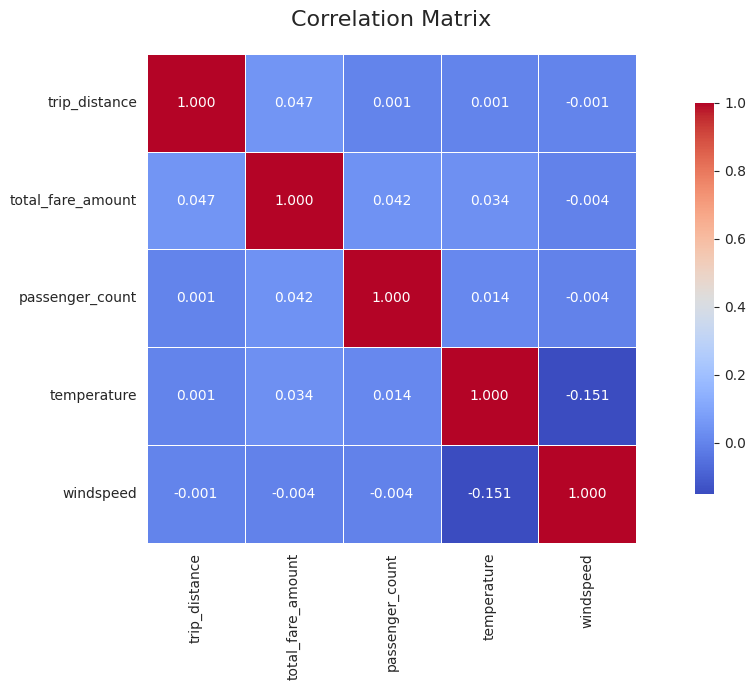

In [66]:
# Selecting appropriate numerical columns for correlation analysis
selected_columns = ['trip_distance', 'total_fare_amount', 'passenger_count', 'temperature', 'windspeed']

# Calculating the correlation matrix
correlation_matrix = df_sample[selected_columns].corr()

# Setting up the matplotlib figure
plt.figure(figsize=(12, 7))

# Creating a heatmap with annotations
sns.heatmap(correlation_matrix, annot=True, fmt=".3f", cmap='coolwarm', square=True,
            cbar_kws={"shrink": .8}, linewidths=.5)

# Setting the title for the heatmap
plt.title('Correlation Matrix', fontsize=16, pad=20)

# Show the plot
plt.tight_layout()
plt.show()


**Observations:**

From the above correlation matrix, we can see the relationships between the selected numerical features:

* **Weak Positive Correlation Between Trip Distance and Total Fare Amount**: The correlation value of **0.047** indicates a weak positive relationship between trip distance and total fare amount. This suggests that longer trips tend to have slightly higher fares, but the relationship is not very strong.

* **Very Weak Correlation with Passenger Count**: The correlation between passenger count and total fare amount is also very weak at **0.042**. This implies that the number of passengers has little influence on the fare amount, possibly because the fare structure is more dependent on factors like distance rather than the number of passengers.

* **Negligible Correlation with Temperature**: The correlation between temperature and total fare amount is **0.034**, indicating a very weak positive relationship. This suggests that temperature has almost no impact on fare amounts, which may imply that fare pricing is more influenced by other factors than weather conditions.

* **Moderate Negative Correlation Between Windspeed and Temperature**: The correlation between windspeed and temperature is **-0.151**, indicating a moderate negative relationship. This suggests that as windspeed increases, temperature tends to decrease. However, the overall impact of windspeed on fare amounts and trip dynamics appears minimal, as indicated by its very low correlation values with both total fare amount and passenger count.


## **4.3 Spatial Distribution of Taxi Pickup Locations in NYC**

In [67]:
# Ensuring the geometry column contains valid WKT strings and filtering out invalid values
df_sample['geometry'] = df_sample['geometry'].apply(lambda x: wkt.loads(x) if isinstance(x, str) else None)

# Dropping rows with invalid geometry
geo_map = df_sample.dropna(subset=['geometry'])

# Converting the DataFrame to a GeoDataFrame
gdf = gpd.GeoDataFrame(geo_map, geometry='geometry')

pickup_coords = gdf.geometry.apply(lambda geom: geom.representative_point()).apply(lambda point: point.coords[0])
pickup_longitude, pickup_latitude = zip(*pickup_coords)

gdf['latitude'] = pickup_latitude
gdf['longitude'] = pickup_longitude

# Grouping by 'pickup_zone' to count the number of rides in each zone
zone_counts = gdf['pickup_zone'].value_counts()

# Verifying the total number of rides
total_rides = zone_counts.sum()

# Calculate the percentage of rides for each zone
zone_percentages = (zone_counts / total_rides) * 100

# Mapping the percentages back to the GeoDataFrame
gdf['zone_percentages'] = gdf['pickup_zone'].map(zone_percentages)



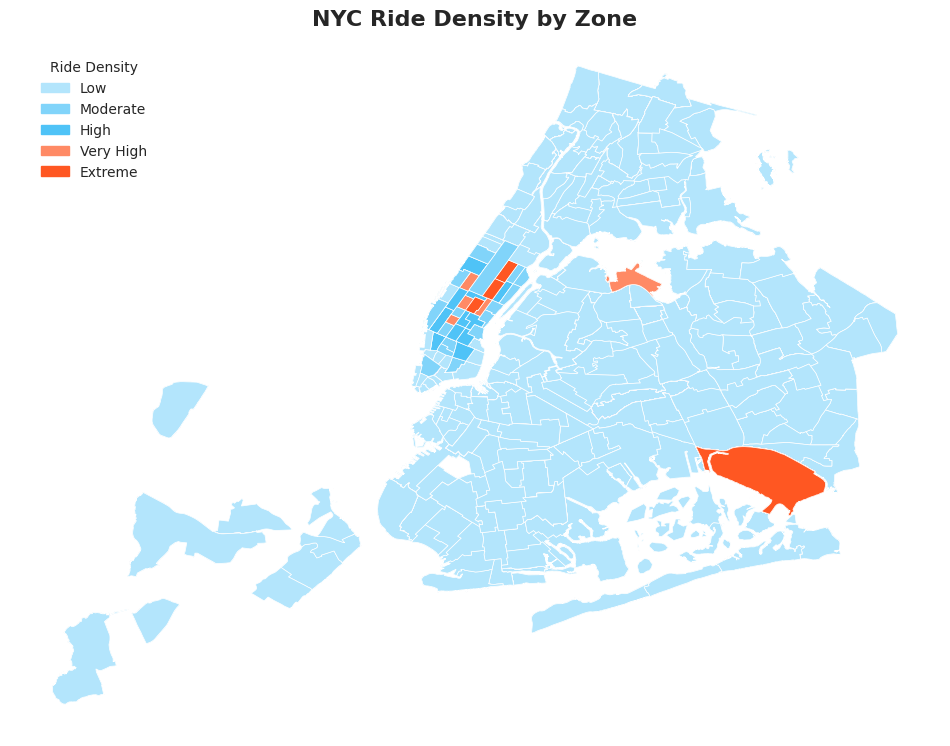

In [68]:
# Analyzing zone_percentages
max_density = gdf['zone_percentages'].max()
min_density = gdf['zone_percentages'].min()

# Defining bins
bins = [0, 1, 2, 3, 4, max_density + 0.1]

# Defining a color palette
colors = ['#b3e5fc', '#81d4fa', '#4fc3f7', '#ff8a65', '#ff5722']

# Assigning bins to the zone_percentages
gdf['density_bin'] = pd.cut(gdf['zone_percentages'], bins=bins, labels=colors, include_lowest=True)

# Plotting the map
fig, ax = plt.subplots(figsize=(12, 12))
gdf.plot(color=gdf['density_bin'], ax=ax, edgecolor='white', linewidth=0.5)

# Legend
legend_labels = {
    '#b3e5fc': 'Low',
    '#81d4fa': 'Moderate',
    '#4fc3f7': 'High',
    '#ff8a65': 'Very High',
    '#ff5722': 'Extreme'
}

patches = [mpatches.Patch(color=color, label=label) for color, label in legend_labels.items()]

# Adding the legend at the top-left corner
plt.legend(
    handles=patches,
    title='Ride Density',
    loc='upper left',
    bbox_to_anchor=(0.02, 0.98),
    frameon=False
)

# Removing axis
ax.axis('off')

# Adding the title
plt.title('NYC Ride Density by Zone', fontsize=16, fontweight='bold')
plt.show()


### **Observations**:

1. **Extreme and Very High Ride Density Zones**:
   - The above map shows zones with **very high ride density** (highlighted in dark coral) concentrated mainly in **Manhattan** and **Queens**. These areas are likely key commercial hubs or high-traffic areas, possibly near major transportation terminals like **JFK and LaGuardia Airports**, shopping districts, or tourist attractions. The significant density in these areas reflects the central role they play in the city's transportation network.

2. **High and Moderate Ride Density Zones**:
   - **Moderate density zones** are also spread across **Manhattan**, indicating steady but lower taxi demand. These areas include key neighbourhoods such as Long Island City or areas near major tourist hubs.

3. **Low Ride Density Zones**:
   - **Low-density zones** cover large areas in **Brooklyn**, **the Bronx**, and **Staten Island** including **EWR (Newark Airport)**, showing the least ride activity which is likely due to lower population density or alternative transportation preferences.

4. **Geographical Concentration**:
   - The above pattern indicates that the predictive models for ride demand should prioritize **Manhattan** and **Queens**, particularly the high-density zones, while considering the lower-density areas for potential niche markets.

The above visualization highlights the need to focus predictive efforts on Manhattan and Queens, given their substantial contribution to the overall ride density. Areas in Brooklyn, the Bronx, and Staten Island, while having less density they still play a role in the broader transportation landscape and may need targeted strategies to address their unique transportation needs.

---
# **5. Feature Engineering**⚙️
---

From now on, we will focus on '**pickup_hour**' and '**pickup_location_id**', since our objective is to predict the number of rides that are going to happen at a given location and hour.

## **5.1 Creating the Target Variable**

 Since we do not have a target variable in the dataset, we are creating it now for modeling

In [ ]:
# Grouping by pickup_hour and pickup_location_id to create the target variable (number_of_rides) per hour

df = df.groupby(['pickup_hour', 'pickup_location_id']).size().reset_index(name='number_of_rides')

df.head()


pickup_hour  pickup_location_id  number_of_rides
0  2023-01-01                   4               19
1  2023-01-01                   7                3
2  2023-01-01                  12                1
3  2023-01-01                  13               14
4  2023-01-01                  24               20

## **5.2 Inspecting the Time Intervals**

Here we are plotting the number of rides per hour for a specified pickup location to visualize trends and detect any anomalies in the data. This helps us in understanding ride patterns and identifying potential issues.

In [ ]:
# Plotting the data to visualize the number of rides per hour

def plot_rides(
    rides: pd.DataFrame,
    locations: Optional[List[int]] = None
):
    """
    Plot time-series data to visualize the number of rides per hour and detect any breaks or anomalies.
    """
    # Filtering the DataFrame to include only specified locations, if provided
    rides_to_plot = rides[rides.pickup_location_id.isin(locations)] if locations else rides

    # Plotting the time-series data using Plotly
    fig = px.line(
        rides_to_plot,
        x="pickup_hour",
        y="number_of_rides",
        color='pickup_location_id',
        template='none',
        labels={'pickup_hour': 'Pickup Hour', 'number_of_rides': 'Number of Rides'}
    )

    fig.show()

plot_rides(df, locations=[241])

**Observations**:

The above Plotly graph revealed gaps in the data, which indicates missing time slots for the specified pickup location. To further investigate these gaps, we will print the rows with missing time slots to understand where and why the gaps exist in the dataset.

In [ ]:
# Printing the rows with missing time slots, to understand where gaps in the data exist

def check_missing_slots(
    rides: pd.DataFrame,
    locations: Optional[List[int]] = None
):
    """
    Identify and display missing time slots in the dataset.
    """
    # Filter the DataFrame to include only specified locations, if provided
    rides_to_check = rides[rides.pickup_location_id.isin(locations)] if locations else rides

    # Creating a complete time series for each location
    all_times = pd.date_range(start=rides_to_check['pickup_hour'].min(),
                              end=rides_to_check['pickup_hour'].max(),
                              freq='H')
    all_times_df = pd.DataFrame(all_times, columns=['pickup_hour'])

    # Merging with the filtered DataFrame to identify missing slots
    rides_complete = pd.merge(all_times_df, rides_to_check, on='pickup_hour', how='left')

    # Displaying missing time slots
    missing_slots = rides_complete[rides_complete['number_of_rides'].isna()]
    if not missing_slots.empty:
        print("Missing Time Slots:")
        print(missing_slots)
    else:
        print("No missing time slots found.")

# Example usage
check_missing_slots(df, locations=[261])


Missing Time Slots:
              pickup_hour  pickup_location_id  number_of_rides
25    2023-01-02 01:00:00                 NaN              NaN
27    2023-01-02 03:00:00                 NaN              NaN
28    2023-01-02 04:00:00                 NaN              NaN
29    2023-01-02 05:00:00                 NaN              NaN
30    2023-01-02 06:00:00                 NaN              NaN
...                   ...                 ...              ...
12339 2024-05-29 03:00:00                 NaN              NaN
12341 2024-05-29 05:00:00                 NaN              NaN
12342 2024-05-29 06:00:00                 NaN              NaN
12362 2024-05-30 02:00:00                 NaN              NaN
12388 2024-05-31 04:00:00                 NaN              NaN

[613 rows x 3 columns]


**Observations**:

* From the above result, We can see there are several missing time slots for the specified pickup location, which indicates that there are hours where no rides were recorded.
* It is possible that there were simply no rides requested during specific hours, especially during late-night or early-morning periods when demand is typically lower.
* Some rides may not have been registered in the system due to operational oversights, such as drivers forgetting to log a trip or issues with the app used by drivers and passengers
* By filling in these gaps, we ensure that the dataset accurately reflects the entire period of our interest, which helps in more precise and reliable time series analysis.

## **5.3 Adding the Missing Time Slots**

In [ ]:
# Filling in the missing time slots and adding 0 for the respective number of rides slot

def add_missing_slots(agg_rides: pd.DataFrame) -> pd.DataFrame:
    """
    Filling in missing time slots in the time series data for each location ID.
    This function ensures that every hour within the range is represented in the DataFrame,
    even if no rides were recorded.

    Reason: Time series analysis requires a continuous dataset without gaps in time slots.
    Missing time slots can distort analyses and visualizations. By filling in these gaps,
    we ensure the accuracy and completeness of the time series data.
    """
    # Extracting all unique location IDs and defining the full range of dates from the earliest to the latest hour
    location_ids = agg_rides['pickup_location_id'].unique()
    full_range = pd.date_range(
        agg_rides['pickup_hour'].min(),
        agg_rides['pickup_hour'].max(),
        freq='H'
    )

    output = pd.DataFrame()

    for location_id in tqdm(location_ids):
        # Filtering data for the specific location ID
        agg_rides_i = agg_rides[agg_rides.pickup_location_id == location_id][['pickup_hour', 'number_of_rides']]

        # Setting the 'pickup_hour' as the index and ensure all hours in the full range are included &
        # filling missing hours with 0
        agg_rides_i.set_index('pickup_hour', inplace=True)
        agg_rides_i.index = pd.DatetimeIndex(agg_rides_i.index)
        agg_rides_i = agg_rides_i.reindex(full_range, fill_value=0)

        # Adding back the location ID column
        agg_rides_i['pickup_location_id'] = location_id

        # Concatenating results across all location IDs
        output = pd.concat([output, agg_rides_i])

    # Moving 'pickup_hour' from the index to a column and reset index
    output = output.reset_index().rename(columns={'index': 'pickup_hour'})

    return output

# Ensuring all timeslots are present in the filtered data
df = add_missing_slots(df)

# Plotting time-series data for location 261 to visualize the number of rides
plot_rides(df, locations=[241])


100%|██████████| 263/263 [00:03<00:00, 73.62it/s]


**Observations:**

From the above plot we can see there are no gaps present after filling in the empty time slots with 0 as number of rides

In [ ]:
# Again checking the rows with missing time slots to see if the time slots have been properly inserted or not

def check_missing_slots(
    rides: pd.DataFrame,
    locations: Optional[List[int]] = None
):
    """
    Identify and display missing time slots in the dataset.
    """
    # Filter the DataFrame to include only specified locations, if provided
    rides_to_check = rides[rides.pickup_location_id.isin(locations)] if locations else rides

    # Creating a complete time series for each location
    all_times = pd.date_range(start=rides_to_check['pickup_hour'].min(),
                              end=rides_to_check['pickup_hour'].max(),
                              freq='H')
    all_times_df = pd.DataFrame(all_times, columns=['pickup_hour'])

    # Merge with the filtered DataFrame to identify missing slots
    rides_complete = pd.merge(all_times_df, rides_to_check, on='pickup_hour', how='left')

    # Display missing time slots
    missing_slots = rides_complete[rides_complete['number_of_rides'].isna()]
    if not missing_slots.empty:
        print("Missing Time Slots:")
        print(missing_slots)
    else:
        print("No missing time slots found.")

# Calling the above function
check_missing_slots(df, locations=[241])


No missing time slots found.


**Observation:** In above plot we can see the resulting DataFrame will have all time slots filled, even if no rides were recorded during some hours.

## **5.4 Transforming the Raw data into Time-Series data**


The purpose of this step is to create overlapping windows of data from a time series. This can be especially useful for forecasting problems. By having a window of **n_features** data points to predict the next data point, we're allowing the **machine learning models** to be applied to **time series data** effectively.

In [ ]:
# Function to Get Cutoff Indices for Overlapping Windows

def get_cutoff_indices(
    data: pd.DataFrame,
    n_features: int,
    step_size: int
) -> list:
    """
    Generates indices for overlapping windows in the time series data.

    Reason: This approach helps in transforming a time series forecasting problem into a supervised learning problem
    by creating sub-sequences of data that can be used as input features to predict future values.
    """
    # Defining the final index position in the data
    stop_position = len(data) - 1

    # Initializing the first sub-sequence at index position 0
    subseq_first_idx = 0
    subseq_mid_idx = n_features
    subseq_last_idx = n_features + 1
    indices = []

    # Creating new sub-sequences while the end doesn't exceed the length of the data
    while subseq_last_idx <= stop_position:
        indices.append((subseq_first_idx, subseq_mid_idx, subseq_last_idx))

        # Progressing the boundaries forward in the dataset by step_size
        subseq_first_idx += step_size
        subseq_mid_idx += step_size
        subseq_last_idx += step_size

    return indices


In [ ]:
# Function to Transform Time Series Data into Features and Target

def transform_ts_data_into_features_and_target(
    ts_data: pd.DataFrame,
    input_seq_len: int,
    step_size: int
) -> pd.DataFrame:
    """
    Transforms time series data into features and targets for supervised ML models.

    Reason: This transformation allows us to use traditional machine learning models
    for time series forecasting by converting time series data into a supervised learning format.
    """
    assert set(ts_data.columns) == {'pickup_hour', 'number_of_rides', 'pickup_location_id'}

    # Extracting unique location IDs
    location_ids = ts_data['pickup_location_id'].unique()
    features = pd.DataFrame()
    targets = pd.DataFrame()

    # Iterating over each location ID
    for location_id in tqdm(location_ids):
        # Keeping only time series data for this location ID
        ts_data_one_location = ts_data.loc[
            ts_data.pickup_location_id == location_id,
            ['pickup_hour', 'number_of_rides']
        ]

        # Pre-computing cutoff indices to split DataFrame rows
        indices = get_cutoff_indices(
            ts_data_one_location,
            input_seq_len,
            step_size
        )

        # Slicing and transposing data into numpy arrays for features and targets
        n_examples = len(indices)
        x = np.ndarray(shape=(n_examples, input_seq_len), dtype=np.float32)
        y = np.ndarray(shape=(n_examples), dtype=np.float32)
        pickup_hours = []

        for i, idx in enumerate(indices):
            x[i, :] = ts_data_one_location.iloc[idx[0]:idx[1]]['number_of_rides'].values
            y[i] = ts_data_one_location.iloc[idx[1]:idx[2]]['number_of_rides'].values
            pickup_hours.append(ts_data_one_location.iloc[idx[1]]['pickup_hour'])

        # Converting numpy arrays to pandas DataFrame for features
        features_one_location = pd.DataFrame(
            x,
            columns=[f'rides_previous_{i+1}_hour' for i in reversed(range(input_seq_len))]
        )
        features_one_location['pickup_hour'] = pickup_hours
        features_one_location['pickup_location_id'] = location_id

        # Converting numpy array to pandas DataFrame for target
        targets_one_location = pd.DataFrame(y, columns=['target_rides_next_hour'])

        # Concatenating results across all location IDs
        features = pd.concat([features, features_one_location])
        targets = pd.concat([targets, targets_one_location])

    # Resetting index for the final DataFrames
    features.reset_index(inplace=True, drop=True)
    targets.reset_index(inplace=True, drop=True)

    return features, targets['target_rides_next_hour']


In [ ]:
# Defining the parameters for transformation
input_seq_len = 24 * 30 * 1  # One month of history (30 days * 24 hours)
step_size = 24  # Moving forward by 24 hours for each step

# Transforming the time series data into features and targets
features, targets = transform_ts_data_into_features_and_target(
    df,
    input_seq_len=input_seq_len,
    step_size=step_size
)

# Printing the shapes of the resulting features and targets DataFrames
print(f'{features.shape=}')
print(f'{targets.shape=}')


100%|██████████| 263/263 [00:42<00:00,  6.22it/s]

features.shape=(128081, 722)
targets.shape=(128081,)


In [ ]:
# Inspecting the features data

features.head()

rides_previous_720_hour  rides_previous_719_hour  rides_previous_718_hour  \
0                     19.0                     28.0                     43.0   
1                      1.0                      0.0                      0.0   
2                      2.0                      0.0                      0.0   
3                      3.0                      1.0                      0.0   
4                      0.0                      2.0                      0.0   

   rides_previous_717_hour  rides_previous_716_hour  rides_previous_715_hour  \
0                     33.0                     12.0                      3.0   
1                      0.0                      0.0                      2.0   
2                      0.0                      0.0                      0.0   
3                      0.0                      0.0                      0.0   
4                      1.0                      1.0                      1.0   

   rides_previous_714_hour  rides_previous_713_hour  rides_previous_712_hour  \
0                      2.0                      1.0                      1.0   
1                      1.0                      0.0                      2.0   
2                      3.0                      5.0                      2.0   
3                      1.0                      2.0                      6.0   
4                      3.0                      1.0                      9.0   

   rides_previous_711_hour  ...  rides_previous_8_hour  rides_previous_7_hour  \
0                      1.0  ...                    2.0                    2.0   
1                      0.0  ...                    3.0                    3.0   
2                      3.0  ...                    2.0                    3.0   
3                      2.0  ...                    3.0                    1.0   
4                      3.0  ...                    0.0                    8.0   

   rides_previous_6_hour  rides_previous_5_hour  rides_previous_4_hour  \
0                    1.0                    1.0                    1.0   
1                    2.0                    2.0                    1.0   
2                    5.0                    7.0                    5.0   
3                    5.0                    3.0                   11.0   
4                    9.0                   13.0                    8.0   

   rides_previous_3_hour  rides_previous_2_hour  rides_previous_1_hour  \
0                    0.0                    0.0                    2.0   
1                    4.0                    7.0                    7.0   
2                    3.0                    7.0                    4.0   
3                    7.0                    9.0                   10.0   
4                   17.0                   13.0                   28.0   

   pickup_hour  pickup_location_id  
0   2023-01-31                   4  
1   2023-02-01                   4  
2   2023-02-02                   4  
3   2023-02-03                   4  
4   2023-02-04                   4  

[5 rows x 722 columns]

In [ ]:
# Inspecting the targets data

targets.head()

0     0.0
1     4.0
2     6.0
3     9.0
4    50.0
Name: target_rides_next_hour, dtype: float32

In [ ]:
# Concatenating the features and targets
df = pd.concat([features, targets], axis=1)

df.head()

rides_previous_720_hour  rides_previous_719_hour  rides_previous_718_hour  \
0                     19.0                     28.0                     43.0   
1                      1.0                      0.0                      0.0   
2                      2.0                      0.0                      0.0   
3                      3.0                      1.0                      0.0   
4                      0.0                      2.0                      0.0   

   rides_previous_717_hour  rides_previous_716_hour  rides_previous_715_hour  \
0                     33.0                     12.0                      3.0   
1                      0.0                      0.0                      2.0   
2                      0.0                      0.0                      0.0   
3                      0.0                      0.0                      0.0   
4                      1.0                      1.0                      1.0   

   rides_previous_714_hour  rides_previous_713_hour  rides_previous_712_hour  \
0                      2.0                      1.0                      1.0   
1                      1.0                      0.0                      2.0   
2                      3.0                      5.0                      2.0   
3                      1.0                      2.0                      6.0   
4                      3.0                      1.0                      9.0   

   rides_previous_711_hour  ...  rides_previous_7_hour  rides_previous_6_hour  \
0                      1.0  ...                    2.0                    1.0   
1                      0.0  ...                    3.0                    2.0   
2                      3.0  ...                    3.0                    5.0   
3                      2.0  ...                    1.0                    5.0   
4                      3.0  ...                    8.0                    9.0   

   rides_previous_5_hour  rides_previous_4_hour  rides_previous_3_hour  \
0                    1.0                    1.0                    0.0   
1                    2.0                    1.0                    4.0   
2                    7.0                    5.0                    3.0   
3                    3.0                   11.0                    7.0   
4                   13.0                    8.0                   17.0   

   rides_previous_2_hour  rides_previous_1_hour  pickup_hour  \
0                    0.0                    2.0   2023-01-31   
1                    7.0                    7.0   2023-02-01   
2                    7.0                    4.0   2023-02-02   
3                    9.0                   10.0   2023-02-03   
4                   13.0                   28.0   2023-02-04   

   pickup_location_id  target_rides_next_hour  
0                   4                     0.0  
1                   4                     4.0  
2                   4                     6.0  
3                   4                     9.0  
4                   4                    50.0  

[5 rows x 723 columns]

----------------
# **6. Modeling**🤖
----------------



## **6.1 Train-Test Split**

The train_test_split function partitions the data into training and testing sets based on a specified cutoff date. It separates the DataFrame into two subsets:
  * Data with pickup_hour earlier than the cutoff date for training, and
  * Data with pickup_hour on or after the cutoff date for testing.
  
The function then extracts features and target variables from these subsets, returning them as separate variables for model training and evaluation.

In [ ]:
# Defining the Train-Test-Split function

def train_test_split(
    df: pd.DataFrame,
    cutoff_date: datetime,
    target_column_name: str,
    ) -> Tuple[pd.DataFrame, pd.Series, pd.DataFrame, pd.Series]:

    """
    Splits the DataFrame into training and test sets based on a cutoff date.

    Parameters:
    - df: pd.DataFrame
        The input DataFrame containing the data to be split.
    - cutoff_date: datetime
        The date that separates the training data from the test data.
    - target_column_name: str
        The name of the column in the DataFrame that contains the target variable.

    Returns:
    - A tuple containing:
        - X_train: pd.DataFrame
            The feature variables for the training set.
        - y_train: pd.Series
            The target variable for the training set.
        - X_test: pd.DataFrame
            The feature variables for the test set.
        - y_test: pd.Series
            The target variable for the test set.
    """

    train_data = df[df.pickup_hour < cutoff_date].reset_index(drop=True)
    test_data = df[df.pickup_hour >= cutoff_date].reset_index(drop=True)

    X_train = train_data.drop(columns=[target_column_name])
    y_train = train_data[target_column_name]
    X_test = test_data.drop(columns=[target_column_name])
    y_test = test_data[target_column_name]

    return X_train, y_train, X_test, y_test

The below function is used to split data from **January to December 2023** for training and **January to May 2024** for testing. This setup ensures that the model is trained on past data and tested on more recent data, simulating a real-world scenario where future predictions are made based on historical trends. The shapes of the resulting DataFrames and Series are printed to verify the split. Approximately **69%** of the data is used for training and **31%** is allocated for testing, which aligns well with common practices in machine learning.

In [ ]:
# Dividing 2023 Jan-Dec data for training and 2024 Jan-May for testing

X_train, y_train, X_test, y_test = train_test_split(
    df,
    cutoff_date=datetime(2024, 1, 1, 0, 0, 0),
    target_column_name='target_rides_next_hour'
)

print(f'{X_train.shape=}')
print(f'{y_train.shape=}')
print(f'{X_test.shape=}')
print(f'{y_test.shape=}')

X_train.shape=(88105, 722)
y_train.shape=(88105,)
X_test.shape=(39976, 722)
y_test.shape=(39976,)


## **6.2 Linear Regression**

Linear regression is a statistical method used to model the relationship between a dependent variable and one or more independent variables by fitting a linear equation to observed data. The formula for simple linear regression is:

**y=β0​+β1​x+ϵ**

Where:

  * y is the dependent variable (response variable).
  * β0​ is the y-intercept.
  * β1​ is the slope of the line (coefficient of the independent variable).
  * x is the independent variable (predictor variable).
  * ϵ is the error term (residual).

In multiple linear regression, where there are multiple predictors, the formula generalizes to:

**y=β0+β1x1+β2x2+⋯+βpxp+ϵ**

We are initializing a LinearRegression model and fit it using the filtered numerical training data (X_train_only_numeric) and the target variable (y_train)

In [ ]:
# Using only the numerical columns of the train and test data for modeling

past_rides_columns = [c for c in X_train.columns if c.startswith('rides_')]
X_train_only_numeric = X_train[past_rides_columns]
X_test_only_numeric = X_test[past_rides_columns]


In time series analysis, linear regression can be used to model and forecast data by examining the relationship between time and one or more predictors. In this context:

  * **Features:** The numerical columns representing various aspects of the time series data are used to predict the target variable.
  * **Predictions:** The model forecasts future values based on historical data.

### **6.2.1 Model Training**


In [ ]:
# Model training

model = LinearRegression()
model.fit(X_train_only_numeric, y_train)

LinearRegression()

In [ ]:
# Train and Test Predictions

predictions_train = model.predict(X_train_only_numeric)
predictions_test = model.predict(X_test_only_numeric)


### **6.2.2 Model Performance**

* By accurately forecasting the number of rides at a given hour and location, taxi companies can ensure they have enough cabs available to meet the demand, **reducing wait times** for passengers and **maximizing profits** for the company and drivers.

* When it comes to choosing the right metric to evaluate the performance of a model for predicting a demand, **Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE)** are commonly used.
    * **MAE** (Range : 0- infinity) measures the average absolute difference between predicted and actual values, making it easy to interpret. This simplicity is crucial for decision-makers who need to understand the model's performance without delving into complex statistics. Unlike MSE and RMSE, **MAE is robust to outliers**, ensuring that extreme values do not skew the overall error assessment.
    * **MSE**, on the other hand, gives higher weight to larger errors, which can be useful in some contexts but may lead to misleading interpretations when outliers are present. Its squared units make it less intuitive for stakeholders who are not familiar with statistical metrics.
    * **RMSE** brings the error metric back to the same units. However, it still retains sensitivity to larger errors, which can sometimes overshadow smaller, yet significant, errors.

* In our context of predicting ride demand, **MAE** is a strong choice because it provides a clear and straightforward measure of average error, allowing taxi companies to easily monitor their performance. . For instance, **if the MAE is low**, it indicates that the model's predictions are **closely aligned with actual ride counts**, enabling the company to effectively allocate resources, such as dispatching the right number of cabs to high-demand areas. This can lead to improved customer satisfaction, as passengers experience shorter wait times, and it can help maximize profits by ensuring that supply meets demand.

* Meanwhile, **R-squared (R²)** is valuable for understanding how well the model explains the variability in ride demand. It indicates the proportion of variance in the dependent variable that can be explained by the independent variables, giving insight into the model's explanatory power. R² ranges from **0 to 1**, with higher values suggesting that the model is performing better at capturing the underlying relationships in the data.

* Therefore, I'm using both **MAE** and **R-squared (R²)** as performance metrics.
    * **MAE** provides a clear understanding of the average prediction error in practical terms, while higher **R²** value indicates that a significant portion of the variance in the number of rides can be explained by the model, which builds trust in the results. Companies can rely on these predictions to make **informed decisions about resource allocation.**
    * By using these two metrics together, we can ensure that the model not only makes accurate predictions but also provides valuable insights

In [ ]:
# Checking the performance of Linear Regression model on training and test sets
mae_train = mean_absolute_error(y_train, predictions_train)
r2_train = r2_score(y_train, predictions_train)

mae_test = mean_absolute_error(y_test, predictions_test)
r2_test = r2_score(y_test, predictions_test)

# Printing performance metrics
print("Linear Regression Performance on Training Set:")
print(f'Mean Absolute Error (MAE): {mae_train:.2f}')
print(f'R-squared (R²): {r2_train:.2f}')

print("\nLinear Regression Performance on Test Set:")
print(f'Mean Absolute Error (MAE): {mae_test:.2f}')
print(f'R-squared (R²): {r2_test:.2f}')

Linear Regression Performance on Training Set:
Mean Absolute Error (MAE): 2.73
R-squared (R²): 0.95

Linear Regression Performance on Test Set:
Mean Absolute Error (MAE): 3.65
R-squared (R²): 0.93


### **Observations**:

#### Training Set Results:
- **Mean Absolute Error (MAE): 2.73**: This indicates that, on average, the model's predictions for the number of rides are off by about 2.73 rides. This is a relatively small error, suggesting that the model is performing well in predicting ride demand during the training phase.
- **R-squared (R²): 0.95**: An R² value of 0.95 means that 95% of the variance in the number of rides can be explained by the model. This high value indicates a strong fit, suggesting that the model captures the underlying relationships in the data effectively. Companies can trust these predictions, as they reflect a good understanding of the factors influencing ride demand.

#### Test Set Results:
- **Mean Absolute Error (MAE): 3.65**: The MAE for the test set is slightly higher than for the training set, indicating that the model's predictions are, on average, off by about 3.65 rides. While this is still a manageable error, it suggests that there may be some variability in ride demand that the model is not fully capturing when applied to new data.
- **R-squared (R²): 0.93**: An R² value of 0.93 for the test set still indicates a strong model performance, with 93% of the variance in ride demand explained by the model. This is a robust result, suggesting that the model remains reliable even when predicting unseen data.


### Conclusion
* Overall, the **low Mean Absolute Error (MAE)** values indicate that the model provides reliable predictions, enabling taxi companies to allocate resources effectively and reduce passenger wait times.
* Additionally, **high R-squared (R²)** values instill confidence in using these predictions for strategic decision-making. Furthermore, the minimal performance drop from training to test sets suggests that the model is not overfitting; it generalizes well to new data, making it a robust tool for predicting ride demand.

### **Residual Analysis**

It helps in identifying patterns that may indicate issues such as non-linearity, heteroscedasticity, or outliers.

* **Residual Plot:** The plot of residuals versus predicted values helps identify non-linearity, heteroscedasticity, or other issues. Residuals should be randomly scattered around zero if the model is appropriate. A clear pattern may indicate that the model could be improved.

* **Distribution of Residuals:** Helps assess the normality of residuals, a key assumption for linear regression. If residuals are normally distributed, the model’s assumptions are likely met; deviations from normality may indicate issues with the model.

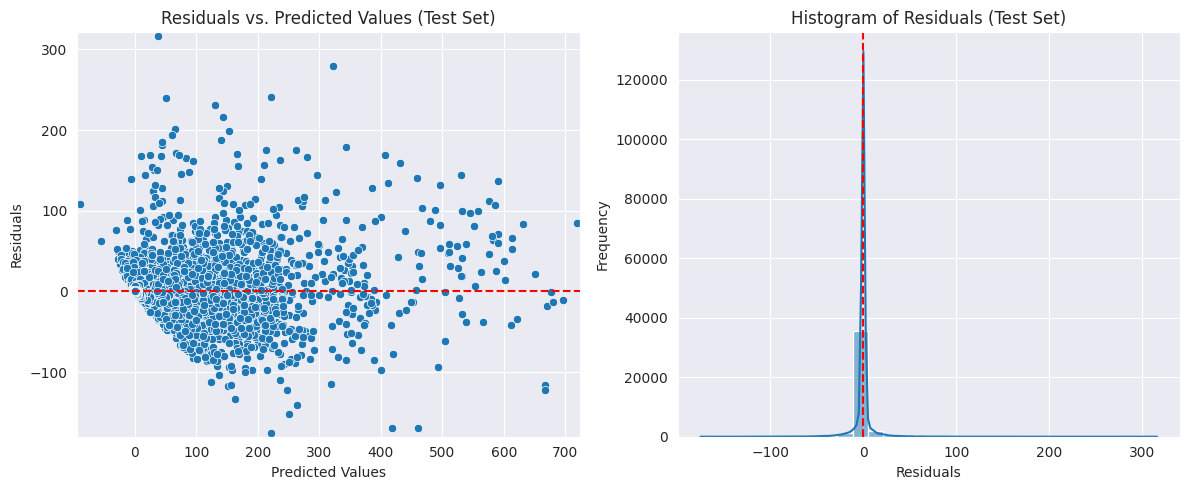

In [ ]:
# Calculating the residuals
# Residuals are the differences between the actual values and the predicted values.
residuals_test = y_test - predictions_test

# Creating a scatter plot of residuals vs. predicted values
plt.figure(figsize=(12, 5))

# Scatter plot for residuals against predicted values
plt.subplot(1, 2, 1)
sns.scatterplot(x=predictions_test, y=residuals_test)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted Values (Test Set)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.xlim([min(predictions_test) - 5, max(predictions_test) + 5])
plt.ylim([min(residuals_test) - 5, max(residuals_test) + 5])

# Creating a histogram of the residuals
plt.subplot(1, 2, 2)
sns.histplot(residuals_test, bins=30, kde=True)
plt.axvline(0, color='red', linestyle='--')
plt.title('Histogram of Residuals (Test Set)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

# Displaying the plots
plt.tight_layout()
plt.show()

**Observations:**

The above residual plots shows a random scatter of points centered around zero, indicating that the model's predictions are unbiased and accurate. Additionally, the Gaussian distribution of the residuals suggests that the errors are normally distributed, which is ideal for regression analysis. These findings suggest that the linear regression model effectively captures the relationship between features and ride demand, providing reliable predictions that can improve the resource allocation and optimize the fleet management for taxi companies.

### **Visualizing the results alongside the actual number of rides for the chosen location ID**

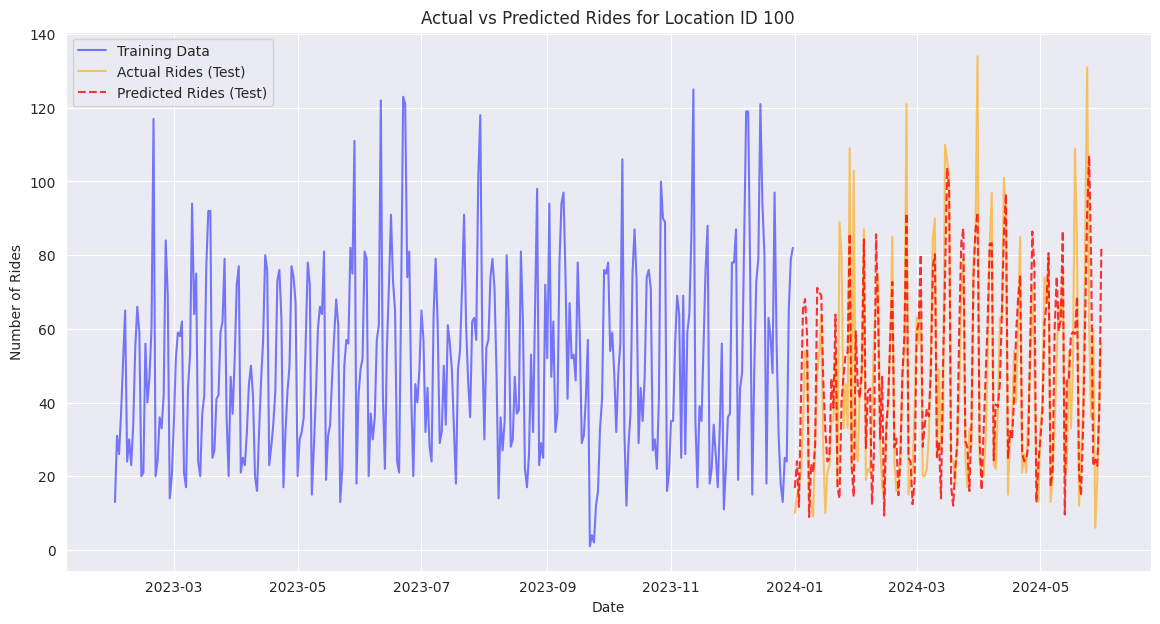

In [ ]:
# Define the location ID to plot
location_id_to_plot = 100

# Filter the training data for the given location ID
filtered_train_data = X_train[X_train['pickup_location_id'] == location_id_to_plot].copy()
filtered_train_data['actual'] = y_train.loc[filtered_train_data.index]
filtered_train_data['pickup_hour'] = pd.to_datetime(filtered_train_data['pickup_hour'])

# Filter the test data for the given location ID
filtered_test_data = X_test[X_test['pickup_location_id'] == location_id_to_plot].copy()
filtered_test_data['actual'] = y_test.loc[filtered_test_data.index]

# Add predicted values to the filtered test data
filtered_test_data['predicted'] = predictions_test[filtered_test_data.index]
filtered_test_data['pickup_hour'] = pd.to_datetime(filtered_test_data['pickup_hour'])

# Plotting the actual and predicted number of rides over time
plt.figure(figsize=(14, 7))

# Plot training data
plt.plot(filtered_train_data['pickup_hour'], filtered_train_data['actual'], label='Training Data', color='blue', alpha=0.5)

# Plot actual test data
plt.plot(filtered_test_data['pickup_hour'], filtered_test_data['actual'], label='Actual Rides (Test)', color='orange', alpha=0.6)

# Plot predicted test data
plt.plot(filtered_test_data['pickup_hour'], filtered_test_data['predicted'], label='Predicted Rides (Test)', color='red', linestyle='dashed', alpha=0.8)

# Adding labels and legend
plt.xlabel('Date')
plt.ylabel('Number of Rides')
plt.title(f'Actual vs Predicted Rides for Location ID {location_id_to_plot}')
plt.legend()
plt.show()

**Observations:**

* The above plot for location ID 100 using the Linear Regression model demonstrates that the predicted values closely follow the actual number of rides for most of the time, effectively capturing the general trend and performing well during periods of average demand.

* However, the model struggles with predictions during extreme high and low demand periods, where deviations from actual values occur. This suggests that while the model provides valuable insights for resource allocation and operational planning, there is potential for improvement by incorporating additional features or exploring more advanced modeling techniques to increase the accuracy during these challenging scenarios.


## **6.3 XGBoost (Extreme Gradient Boosting)**

* XGBoost is a highly efficient and scalable implementation of gradient boosting, a machine learning technique that combines weak prediction models (such as decision trees) to create a strong predictive model. XGBoost has gained popularity due to its superior performance and ability to handle **large-scale data and high-dimensional features.**

* The core idea behind XGBoost is to build an ensemble of weak learners (decision trees) in an iterative manner, where each subsequent tree tries to correct the errors made by the previous trees. This process is known as gradient boosting.

The objective function in XGBoost is defined as:

**L(t) = Σ l(yi, ŷi(t-1) + ft(xi)) + Ω(ft)**

Where:

  * L(t) is the objective function at iteration t.
  * l is the loss function, which measures the difference between the true value (yi) and the predicted value (ŷi).
  * ŷi(t-1) is the prediction of the i-th instance at the (t-1)-th iteration.
  * ft is the new tree to be added at the t-th iteration.
  * Ω is the regularization term, which penalizes the complexity of the model to prevent overfitting.

XGBoost offers several advantages over traditional gradient boosting:

  1. **Regularization**: XGBoost includes L1 and L2 regularization to control model complexity and prevent overfitting.
  2. **Parallel processing**: XGBoost can perform parallel computation on a single machine, making it efficient for large-scale data processing.
  3. **Handling missing values**: XGBoost has built-in support for handling missing values, automatically learning the best way to handle them during the training process.
  4. **High performance**: XGBoost is highly optimized for performance and can handle large datasets and high-dimensional features efficiently.

Hence it has been successfully applied to a wide range of problems, including classification, regression, ranking, and survival analysis. Its flexibility, scalability, and high performance make it a popular choice in balancing the fit of the model to the data (minimizing the loss function) and the complexity of the model (via regularization).

### **6.3.1 Model Training**


In [ ]:
# Model training

xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100)
xgb_model.fit(X_train_only_numeric, y_train)

# Predicting on the train and test sets
predictions_train = xgb_model.predict(X_train_only_numeric)
predictions_test = xgb_model.predict(X_test_only_numeric)


In [ ]:
# Checking the performance of XGBoost model on train set
mae_train = mean_absolute_error(y_train, predictions_train)
r2_train = r2_score(y_train, predictions_train)

# Checking the performance of XGBoost model on test set
mae_test = mean_absolute_error(y_test, predictions_test)
r2_test = r2_score(y_test, predictions_test)

print("XGBoost Performance on Training Set:")
print(f'Mean Absolute Error (MAE): {mae_train:.2f}')
print(f'R-squared (R²): {r2_train:.2f}')

print("\nXGBoost Performance on Test Set:")
print(f'Mean Absolute Error (MAE): {mae_test:.2f}')
print(f'R-squared (R²): {r2_test:.2f}')

XGBoost Performance on Training Set:
Mean Absolute Error (MAE): 1.21
R-squared (R²): 0.99

XGBoost Performance on Test Set:
Mean Absolute Error (MAE): 2.98
R-squared (R²): 0.93


### **Observations**:

#### Training Set Results:
- **Mean Absolute Error (MAE): 1.21**: This low MAE value suggests that, on average, the XGBoost model's predictions for the number of rides are off by only about 1.21 rides during the training phase. This is an excellent result, indicating that the model is highly accurate in predicting ride demand.
- **R-squared (R²): 0.99**: An R² value of 0.99 means that 99% of the variance in the number of rides can be explained by the XGBoost model. This extremely high value demonstrates a nearly perfect fit, suggesting that the model captures the underlying relationships in the data with great precision. Companies can have strong confidence in these predictions, as they reflect an exceptional understanding of the factors influencing ride demand.

#### Test Set Results:
- **Mean Absolute Error (MAE): 2.98**: The MAE for the test set is higher than for the training set, indicating that the model's predictions are, on average, off by about 2.98 rides when applied to new data. While this error is still relatively small, it suggests that there may be some unseen patterns or noise in the test data that the model is not fully capturing.
- **R-squared (R²): 0.93**: Although it is still strong, this value is lower than the training R², indicating that the model explains less variance in the test data.

### Conclusion
* The observed dip in performance from the training to the test set suggests that the model is experiencing some degree of overfitting, where it learns the training data too well but struggles to generalize to new, unseen data.
* To address this issue, hyperparameter tuning can be done by optimizing the hyperparameters of the XGBoost model, we can improve its ability to generalize and enhance its performance on the test set. This process involves systematically testing different configurations of hyperparameters (such as learning rate, maximum depth of trees, and regularization terms) to find the combination that yields the best performance on validation data.


### **6.3.2 Randomized Search with K-Fold Cross-Validation**

In [ ]:
# Defining the parameter distribution for XGBoost
param_dist = {
    'learning_rate': [0.03, 0.1],
    'n_estimators': [70, 80],
    'max_depth': [2, 3],
    'min_child_weight': [2, 3, 5],
    'subsample': [0.3, 0.5],
    'colsample_bytree': [0.3, 0.6],
    'gamma': [ 0.2, 0.3],
    'reg_alpha': [8, 9],
    'reg_lambda': [8, 9]
}

# Initialize the XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', eval_metric='mae')

# Define the K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Number of iterations for random search
n_iter = 10

# Set up the Randomized Search with Cross-Validation
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=n_iter,
    cv=kf,
    return_train_score=True,
    scoring='neg_mean_absolute_error',
    verbose=2,
    random_state=42
)

# Fitting the random search to the data
random_search.fit(X_train_only_numeric, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.03, max_depth=3, min_child_weight=5, n_estimators=80, reg_alpha=9, reg_lambda=8, subsample=0.3; total time=   1.9s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.03, max_depth=3, min_child_weight=5, n_estimators=80, reg_alpha=9, reg_lambda=8, subsample=0.3; total time=   1.9s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.03, max_depth=3, min_child_weight=5, n_estimators=80, reg_alpha=9, reg_lambda=8, subsample=0.3; total time=   1.9s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.03, max_depth=3, min_child_weight=5, n_estimators=80, reg_alpha=9, reg_lambda=8, subsample=0.3; total time=   1.9s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.03, max_depth=3, min_child_weight=5, n_estimators=80, reg_alpha=9, reg_lambda=8, subsample=0.3; total time=   6.1s
[CV] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.1, max_depth=2, 

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric='mae', feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=No...
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   param_distributions={'colsample_bytree': [0.3, 0.6],
                                        'gamma': [0.2, 0.3],
                                        'learning_rate': [0.03, 0.1],
                                        'max_depth': [2, 3],
                                        'min_child_weight': [2, 3, 5],
                                        'n_estimators': [70, 80],
                                        'reg_alpha': [8, 9],
                                        'reg_lambda': [8, 9],
                                        'subsample': [0.3, 0.5]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=2)

In [ ]:
# Predicting on the training set using the best model
best_model = random_search.best_estimator_
predictions_train = best_model.predict(X_train_only_numeric)

# Predicting on the test set using the best model
predictions_test = best_model.predict(X_test_only_numeric)

# Checking the performance of the best XGBoost model on the training and test sets
mae_train = mean_absolute_error(y_train, predictions_train)
r2_train = r2_score(y_train, predictions_train)

mae_test = mean_absolute_error(y_test, predictions_test)
r2_test = r2_score(y_test, predictions_test)

print("\nXGBoost Performance with Best Hyperparameters on Training Set:")
print(f'Mean Absolute Error (MAE): {mae_train:.2f}')
print(f'R-squared (R²): {r2_train:.2f}')

print("\nXGBoost Performance with Best Hyperparameters on Test Set:")
print(f'Mean Absolute Error (MAE): {mae_test:.2f}')
print(f'R-squared (R²): {r2_test:.2f}')



XGBoost Performance with Best Hyperparameters on Training Set:
Mean Absolute Error (MAE): 2.62
R-squared (R²): 0.95

XGBoost Performance with Best Hyperparameters on Test Set:
Mean Absolute Error (MAE): 3.18
R-squared (R²): 0.93


**Observations:**

* Here we can see without hyperparameter tuning, the model demonstrates overfitting on the training set, achieving an **R-squared (R²) of 0.99** and a **Mean Absolute Error (MAE) of 1.21**. After hyperparameter tuning, the training performance decreases slightly, with an R² of **0.95** and MAE of **2.62**, which indicates a reduction in overfitting.

* Even though there is a slight dip in the test set performance, with an **MAE of 3.18** and **R² remaining at 0.93,** hyperparameter tuning has helped in reducing the training data R² score. This indicates that the tuning process has helped in improving the generalization ability of the model.


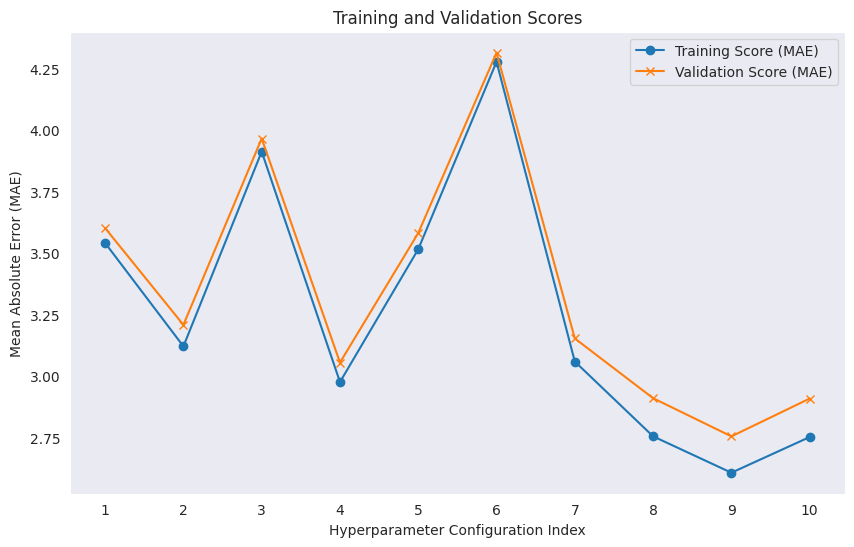

In [ ]:
# Extracting training and validation scores
train_scores = -random_search.cv_results_['mean_train_score']
val_scores = -random_search.cv_results_['mean_test_score']

# Plotting the training and validation scores
plt.figure(figsize=(10, 6))
plt.plot(train_scores, label='Training Score (MAE)', marker='o')
plt.plot(val_scores, label='Validation Score (MAE)', marker='x')
plt.title('Training and Validation Scores')
plt.xlabel('Hyperparameter Configuration Index')
plt.ylabel('Mean Absolute Error (MAE)')
plt.xticks(ticks=np.arange(len(train_scores)), labels=np.arange(1, len(train_scores) + 1))
plt.legend()
plt.grid()
plt.show()

**Observations:**

* The close alignment of training and validation scores in the above plot indicates that the model is performing well without significant overfitting or underfitting.
* It is evident by the minimal gap between the two scores across various hyperparameter configurations. This suggests that the xgboost model is effectively generalizing to unseen data.

### **Residual Analysis**


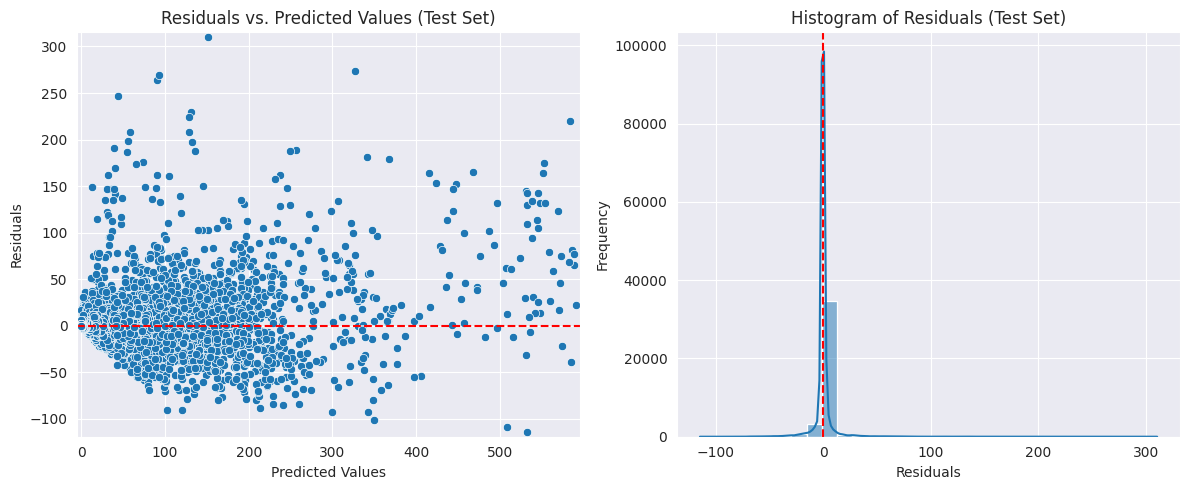

In [ ]:
# Predicting on the test set using the best model
best_model = random_search.best_estimator_
predictions_test = best_model.predict(X_test_only_numeric)

# Calculating the residuals
# Residuals are the differences between the actual values and the predicted values.
residuals_test = y_test - predictions_test

# Creating a scatter plot of residuals vs. predicted values
plt.figure(figsize=(12, 5))

# Scatter plot for residuals against predicted values
plt.subplot(1, 2, 1)
sns.scatterplot(x=predictions_test, y=residuals_test)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted Values (Test Set)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.xlim([min(predictions_test) - 5, max(predictions_test) + 5])
plt.ylim([min(residuals_test) - 5, max(residuals_test) + 5])

# Creating a histogram of the residuals
plt.subplot(1, 2, 2)
sns.histplot(residuals_test, bins=30, kde=True)
plt.axvline(0, color='red', linestyle='--')
plt.title('Histogram of Residuals (Test Set)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

# Displaying the plots
plt.tight_layout()
plt.show()

**Observations:**

* The  above residual analysis of the XGBoost model reveals that the residuals, plotted against the predicted values, are scattered randomly around zero, indicating that the model does not exhibit any systematic bias in its predictions. This randomness suggests that the model captures the underlying patterns in the data effectively **without any significant overfitting or underfitting.**
* The histogram of the residuals shows a Gaussian distribution, which implies that the errors are normally distributed. It confirms that the model's predictions are consistent and provides confidence in the model's reliability for future predictions.

### **Plotting the actual and predicted number of rides over time**

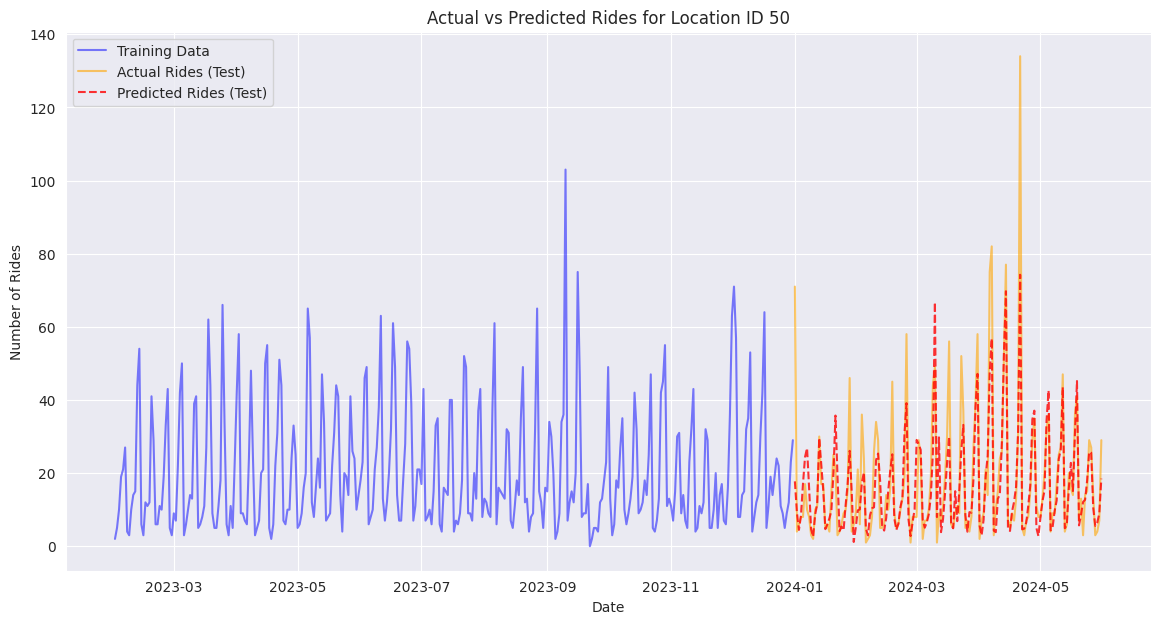

In [ ]:
# Defining the location ID to plot
location_id_to_plot = 50

# Filtering the training data for the given location ID
filtered_train_data = X_train[X_train['pickup_location_id'] == location_id_to_plot].copy()
filtered_train_data['actual'] = y_train.loc[filtered_train_data.index]
filtered_train_data['pickup_hour'] = pd.to_datetime(filtered_train_data['pickup_hour'])

# Filtering the test data for the given location ID
filtered_test_data = X_test[X_test['pickup_location_id'] == location_id_to_plot].copy()
filtered_test_data['actual'] = y_test.loc[filtered_test_data.index]

# Predicting using the best hyperparameter-tuned model
best_model = random_search.best_estimator_
predictions_test = best_model.predict(X_test_only_numeric)

# Converting predictions to a pandas Series
predictions_series = pd.Series(predictions_test)

# Adding predicted values to the filtered test data
filtered_test_data['predicted'] = predictions_series[filtered_test_data.index]
filtered_test_data['pickup_hour'] = pd.to_datetime(filtered_test_data['pickup_hour'])

# Plotting the actual and predicted number of rides over time
plt.figure(figsize=(14, 7))

# Plotting training data
plt.plot(filtered_train_data['pickup_hour'], filtered_train_data['actual'], label='Training Data', color='blue', alpha=0.5)

# Plotting actual test data
plt.plot(filtered_test_data['pickup_hour'], filtered_test_data['actual'], label='Actual Rides (Test)', color='orange', alpha=0.6)

# Plotting predicted test data
plt.plot(filtered_test_data['pickup_hour'], filtered_test_data['predicted'], label='Predicted Rides (Test)', color='red', linestyle='dashed', alpha=0.8)

# Adding labels and legend
plt.xlabel('Date')
plt.ylabel('Number of Rides')
plt.title(f'Actual vs Predicted Rides for Location ID {location_id_to_plot}')
plt.legend()
plt.show()


**Observations:**

* The above plot shows that the XGBoost model with the best hyperparameters closely tracks the actual number of rides for the **location ID 50**, accurately capturing the general trend and patterns in the data, except for a few instances where there are very high spikes in demand.
* This indicates that the model may struggle to predict extreme outliers or unusual events that lead to a surge in ride demand, but overall, the model's strong performance can still provide valuable insights for taxi companies, as accurate predictions for the majority of the time can help in resource allocation, staffing decisions, and overall operational planning .


---
# **7. Additional Model: Neural Network**🧠
---

**Model Comparison:**
  * The performance of the **Linear Regression** and **XGBoost models**, implemented using sklearn, is being compared with an additional model: **Neural Network**.

**Dataset Usage:**
  * The same train and test datasets, which were initially split for the other models, are reused for training and testing the **Neural Network** model.
  * This ensures consistency in the evaluation process and allows for a direct comparison of performance across different model types.

**Objective:**
  * The goal of this comparative analysis is to assess how well the **Linear Regression** and **XGBoost models** perform in comparison to the **Neural Network model**.
  * The comparison will focus on metrics such as **Mean Absolute Error (MAE)** and **R-squared (R²)** to evaluate the models' performance.
  * Additionally, the analysis will consider the models' tendencies towards **overfitting** or **underfitting**.


This comparative analysis aims to provide insights into the strengths and weaknesses of each model type, helping to determine the most suitable model for the given problem and dataset. By considering the trade-offs between model complexity, interpretability, and performance, the analysis will guide the selection of the most effective model for real-world applications.


In [ ]:
# Importing necessary libraries for Deep Learning
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Dropout, BatchNormalization
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.optimizers import RMSprop

# Defining the Neural Network model
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train_only_numeric.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compiling the model using RMSprop optimizer
model.compile(optimizer=RMSprop(learning_rate=0.001), loss='mean_absolute_error')

# Increasing the batch size
batch_size = 512

# Splitting the training data into training and validation sets to ensure regularization techniques
# will be consistently applied to both the training and validation data
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train_only_numeric, y_train, test_size=0.2, random_state=42)

# Training the model and storing the training history
history = model.fit(X_train_split, y_train_split, epochs=100, batch_size=batch_size, verbose=1, validation_data=(X_val, y_val))


Epoch 1/100
138/138 [==============================] - 3s 13ms/step - loss: 4.3714 - val_loss: 4.1107
Epoch 2/100
138/138 [==============================] - 2s 11ms/step - loss: 3.5532 - val_loss: 5.8638
Epoch 3/100
138/138 [==============================] - 2s 11ms/step - loss: 3.4378 - val_loss: 4.3535
Epoch 4/100
138/138 [==============================] - 2s 11ms/step - loss: 3.4121 - val_loss: 2.9587
Epoch 5/100
138/138 [==============================] - 2s 11ms/step - loss: 3.2842 - val_loss: 3.2181
Epoch 6/100
138/138 [==============================] - 2s 11ms/step - loss: 3.2220 - val_loss: 3.1987
Epoch 7/100
138/138 [==============================] - 2s 11ms/step - loss: 3.2285 - val_loss: 2.8847
Epoch 8/100
138/138 [==============================] - 2s 11ms/step - loss: 3.2259 - val_loss: 6.1276
Epoch 9/100
138/138 [==============================] - 2s 11ms/step - loss: 3.1313 - val_loss: 2.7621
Epoch 10/100
138/138 [==============================] - 2s 11ms/step - loss: 3.123

In [ ]:
# Predicting on the test set
predictions_test = model.predict(X_test_only_numeric)

# Evaluating the model performance
mae_train = mean_absolute_error(y_train, model.predict(X_train_only_numeric))
r2_train = r2_score(y_train, model.predict(X_train_only_numeric))
mae_test = mean_absolute_error(y_test, predictions_test)
r2_test = r2_score(y_test, predictions_test)

# Printing performance metrics
print("\nNeural Network Performance on Training Set:")
print(f'Mean Absolute Error (MAE): {mae_train:.2f}')
print(f'R-squared (R²): {r2_train:.2f}')

print("\nNeural Network Performance on Test Set:")
print(f'Mean Absolute Error (MAE): {mae_test:.2f}')
print(f'R-squared (R²): {r2_test:.2f}')


2754/2754 [==============================] - 5s 2ms/step

Neural Network Performance on Training Set:
Mean Absolute Error (MAE): 2.18
R-squared (R²): 0.96

Neural Network Performance on Test Set:
Mean Absolute Error (MAE): 2.82
R-squared (R²): 0.94


**Observations**

* **Training Set Performance**: The above Neural Network model achieved a **Mean Absolute Error (MAE) of 2.18** on the training set, indicating that, on average, the model's predictions are off by approximately 2.18 rides from the actual values. The **R-squared (R²) value of 0.96** suggests that the model explains 95% of the variance in the training data, demonstrating a strong fit and indicating that the model effectively captures the underlying patterns in ride demand.

* **Test Set Performance**: On the test set, the model recorded a **slightly higher MAE of 2.82**. This indicates that the model's predictions are, on average, about 2.9 rides away from the actual values for unseen data. The R² value of **0.94** implies that the model still explains a significant portion (94%) of the variance in the test data, which represents good generalization capabilities.

In summary, the Neural Network demonstrates robust performance in predicting ride demand, with **low MAE values and high R²** scores for both training and test sets, indicating its effectiveness in capturing the complexities of the data while maintaining good generalization. This represents that the model maintains its predictive power across both datasets.

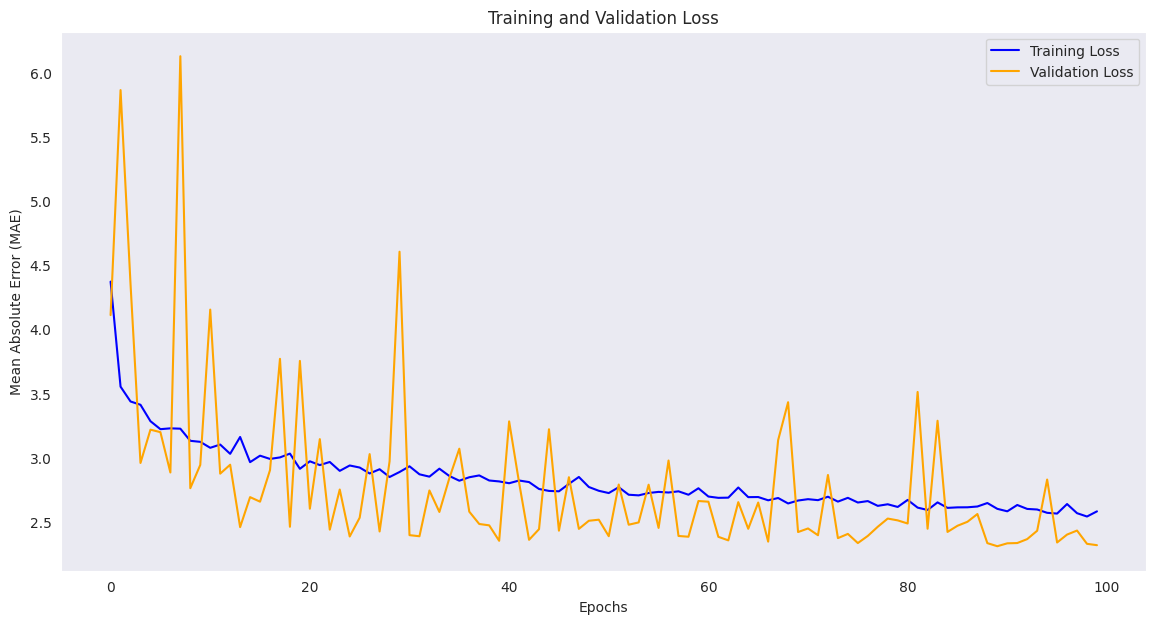

In [ ]:
# Plotting training and validation loss
plt.figure(figsize=(14, 7))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.legend()
plt.grid()
plt.show()

 From the above plot we can see that validation loss is decreasing which indicates that the model is generalizing well to unseen data. And since both the losses are decreasing, it suggests that the model is learning without overfitting.

### **Residual Analysis**


1250/1250 [==============================] - 2s 2ms/step


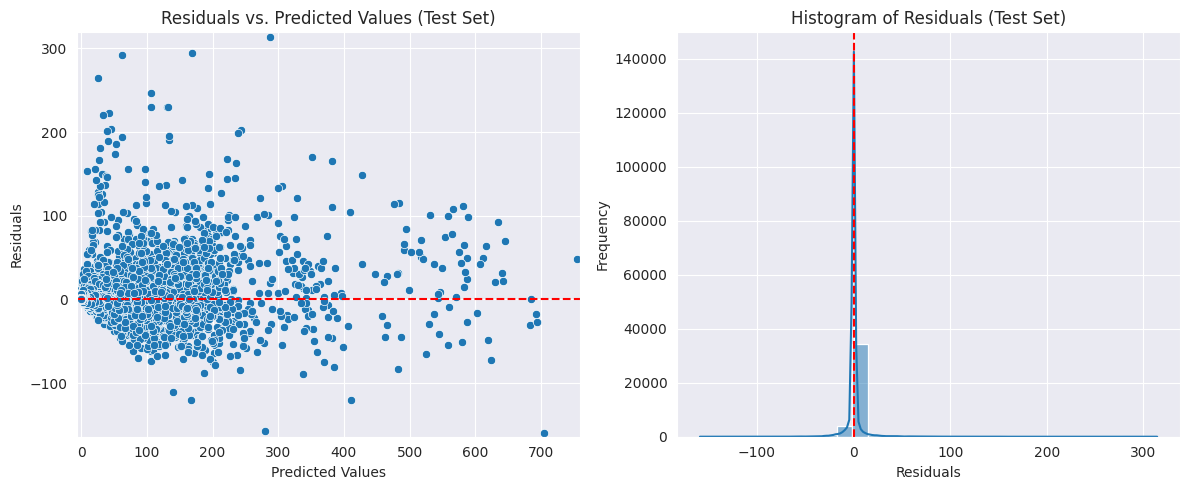

In [ ]:
# Predicting on the test set using the trained neural network model
predictions_test = model.predict(X_test_only_numeric)

# Calculating the residuals
residuals_test = y_test - predictions_test.flatten()  # Flatten in case of shape mismatch

# Creating a scatter plot of residuals vs. predicted values
plt.figure(figsize=(12, 5))

# Scatter plot for residuals against predicted values
plt.subplot(1, 2, 1)
sns.scatterplot(x=predictions_test.flatten(), y=residuals_test)  # Flatten predictions for consistency
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted Values (Test Set)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.xlim([min(predictions_test) - 5, max(predictions_test) + 5])
plt.ylim([min(residuals_test) - 5, max(residuals_test) + 5])

# Creating a histogram of the residuals
plt.subplot(1, 2, 2)
sns.histplot(residuals_test, bins=30, kde=True)
plt.axvline(0, color='red', linestyle='--')
plt.title('Histogram of Residuals (Test Set)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

# Displaying the plots
plt.tight_layout()
plt.show()

**Observations:**

* The  above residual analysis of the neural network model reveals that the residuals, plotted against the predicted values, are scattered randomly around zero, indicating that the model does not exhibit any systematic bias in its predictions. This randomness suggests that the model captures the underlying patterns in the data effectively without any significant overfitting or underfitting.
* The histogram of the residuals shows a Gaussian distribution, which implies that the errors are normally distributed. It confirms that the model's predictions are consistent and provides confidence in the model's reliability for future predictions.

### **Plotting the actual and predicted number of rides over time**

1250/1250 [==============================] - 2s 2ms/step


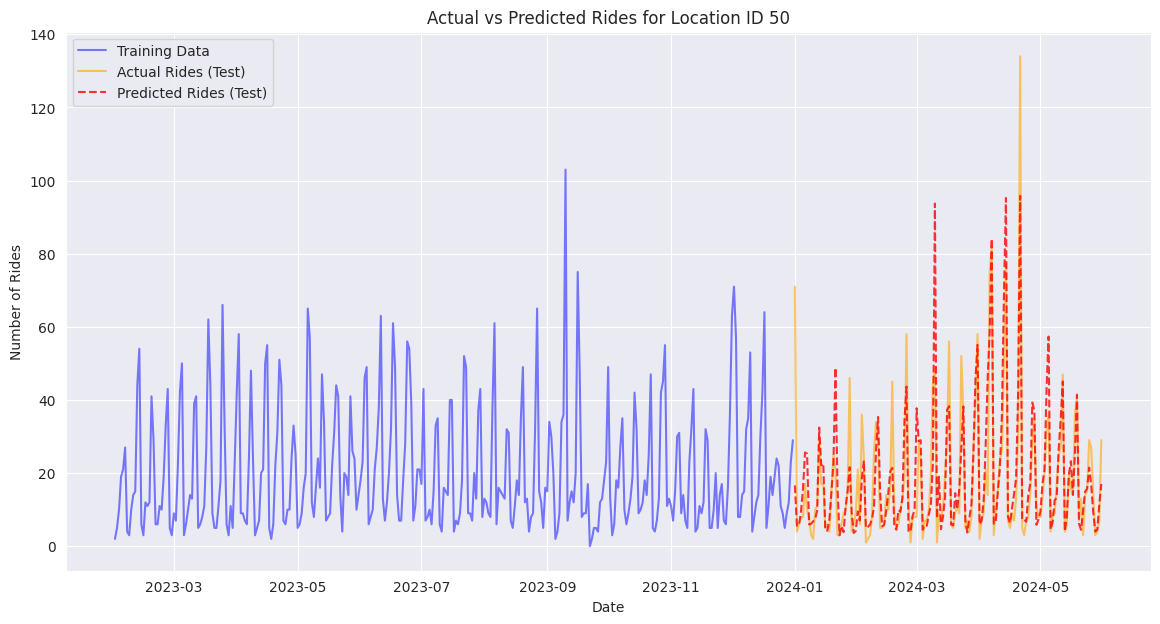

In [ ]:
# Defining the location ID to plot
location_id_to_plot = 50

# Filtering the training data for the given location ID
filtered_train_data = X_train[X_train['pickup_location_id'] == location_id_to_plot].copy()
filtered_train_data['actual'] = y_train.loc[filtered_train_data.index]
filtered_train_data['pickup_hour'] = pd.to_datetime(filtered_train_data['pickup_hour'])

# Filtering the test data for the given location ID
filtered_test_data = X_test[X_test['pickup_location_id'] == location_id_to_plot].copy()
filtered_test_data['actual'] = y_test.loc[filtered_test_data.index]

# Predicting using the trained neural network model
predictions_test = model.predict(X_test_only_numeric)

# Converting predictions to a pandas Series
predictions_series = pd.Series(predictions_test.flatten())  # Flatten the predictions

# Adding predicted values to the filtered test data
filtered_test_data['predicted'] = predictions_series[filtered_test_data.index]
filtered_test_data['pickup_hour'] = pd.to_datetime(filtered_test_data['pickup_hour'])

# Plotting the actual and predicted number of rides over time
plt.figure(figsize=(14, 7))

# Plotting training data
plt.plot(filtered_train_data['pickup_hour'], filtered_train_data['actual'], label='Training Data', color='blue', alpha=0.5)

# Plotting actual test data
plt.plot(filtered_test_data['pickup_hour'], filtered_test_data['actual'], label='Actual Rides (Test)', color='orange', alpha=0.6)

# Plotting predicted test data
plt.plot(filtered_test_data['pickup_hour'], filtered_test_data['predicted'], label='Predicted Rides (Test)', color='red', linestyle='dashed', alpha=0.8)

# Adding labels and legend
plt.xlabel('Date')
plt.ylabel('Number of Rides')
plt.title(f'Actual vs Predicted Rides for Location ID {location_id_to_plot}')
plt.legend()
plt.show()




**Observations:**

* The above plot shows that the neural network model closely tracks the actual number of rides for the **location ID 50**, accurately capturing the general trend and patterns in the data, except for a few instances where there are very high spikes in demand.
* This indicates that the model may struggle to predict extreme outliers or unusual events that lead to a surge in ride demand, but overall, the model's strong performance can still provide valuable insights for taxi companies. By leveraging the model's performance businesses can remain agile and responsive to fluctuations in demand leading to profitability.

---
# **8. Conclusion**📢
---

### **Model Performance Analysis**

The performance metrics for the three models—Linear Regression, XGBoost, and Neural Network—provide valuable insights into their effectiveness in predicting ride demand. While the R² values indicate a good fit for all three models, our primary goal is to minimize the Mean Absolute Error (MAE), as we are specifically trying to predict the number of rides that will occur at a given hour for a specific location ID.

1. **Linear Regression**:
   - **Training Set**: **MAE = 2.73, R² = 0.95**
   - **Test Set**: **MAE = 3.65, R² = 0.93**
   - Linear Regression shows a good performance on the training set, indicating that it captures a significant amount of variance in the data.
   - This means that, on average, the model's predictions deviate from the actual number of rides by approximately **3.65 rides**. While this is a reasonable value, the minimal drop in performance between the training and test sets indicates that there is still room for improvement in accuracy.

2. **XGBoost**:
   - **Training Set (After Hyperparameter Tuning)**: **MAE = 2.62, R² = 0.95**
   - **Test Set (After Hyperparameter Tuning)**: **MAE = 3.18, R² = 0.93**
   - XGBoost performs slightly better than Linear Regression, with a slightly lower MAE on the training set. After hyperparameter tuning the test set performance indicates that it maintains a similar level of generalization, with a smaller MAE compared to Linear Regression. This suggests that XGBoost model is effectively managing overfitting, making it a good choice for this dataset.
   - This means that XGBoost performs better than Linear Regression, with an average deviation of **3.18 rides**. This reduction in MAE suggests that XGBoost is providing more accurate predictions, making it a more reliable choice for operational decision-making.

3. **Neural Network**:
   - **Training Set**: **MAE = 2.18, R² = 0.96**
   - **Test Set**: **MAE = 2.82, R² = 0.94**
   - The Neural Network achieves the lowest MAE and the highest R² on the training set, indicating strong fitting. Its test set performance also shows strong generalization, with the lowest MAE (**2.82)** among the three models. This indicates that the neural network has effectively reduced overfitting while maintaining predictive accuracy.
   - This means that Neural Network achieves the lowest MAE at **2.82 rides**, indicating that its predictions are, on average, closer to the actual ride counts compared to the other models. This lower error margin is significant, especially in a business context where even small inaccuracies can impact resource allocation and customer satisfaction.

### **Business Usefulness**

In addition to optimizing resource allocation and improving customer satisfaction, there are several other business use cases that taxi companies can leverage to enhance their operations and profitability:

1. **Dynamic Pricing Models:**
   - Implementing dynamic pricing based on demand can help maximize revenue during peak hours. By adjusting fares in real-time according to demand and supply, taxi companies can optimize their earnings while ensuring availability for customers.

2. **Corporate Accounts:**
   - Establishing partnerships with businesses to offer corporate accounts can provide a steady stream of revenue. Companies can manage employee transportation needs through a centralized system, allowing for easier billing and ride management.

3. **Scheduled Rides:**
   - Allowing customers to pre-schedule rides can improve operational efficiency. This feature can be particularly beneficial for corporate clients or individuals needing transportation for specific events, ensuring that resources are allocated effectively.

4. **Partnerships with Local Businesses:**
   - Collaborating with hotels, restaurants, and entertainment venues can create mutually beneficial relationships. Taxi companies can offer exclusive deals or packages to these businesses, driving more customers to their services while providing value to partners.

5. **Customer Loyalty Programs:**
   - Implementing loyalty programs can encourage repeat business. Offering discounts or rewards for frequent riders can enhance customer retention and increase overall ride volume.

6. **Advertising Opportunities:**
   - Taxi companies can generate additional revenue by allowing advertising on their vehicles or within their apps. This can attract local businesses looking to reach potential customers in high-traffic areas.

### **Operational Cost Considerations**

When evaluating the operational costs associated with the different models—Linear Regression, XGBoost, and Neural Network—it's important to consider the following aspects:

1. **Model Complexity:**
   - **Linear Regression** is the simplest model, requiring less computational power and resources, which can lead to lower operational costs. However, its **limitations in capturing complex** relationships may result in less accurate predictions.

2. **XGBoost:**
   - XGBoost is more complex than Linear Regression but is designed for efficiency. It can handle large datasets effectively and often requires less training time compared to deep learning models. This can translate to moderate operational costs, making it a **cost-effective choice** for many taxi companies.

3. **Neural Network:**
   - While Neural Networks can provide superior predictive performance, they typically require more computational resources and longer training times. This can lead to **higher operational costs**, particularly in terms of hardware and energy consumption. However, the potential for improved accuracy and reduced MAE may justify the investment, especially for companies focused on long-term growth and customer satisfaction.

### **Summary**

In terms of operational costs, **Linear Regression** may be the most cost-effective option due to its simplicity. However, **XGBoost** offers a balance of performance and efficiency, making it a strong candidate for deployment. The **Neural Network**, while potentially more expensive to operate, could be the best choice if the goal is to achieve the highest accuracy in ride demand predictions, particularly when considering long-term operational strategies and customer satisfaction. Ultimately, the choice of model should align with the company's strategic goals, resource availability, and desired level of predictive accuracy.

From a business perspective, accurately predicting ride demand is crucial for optimizing resource allocation, improving customer satisfaction, and enhancing operational efficiency. For instance, a transportation company can use these predictions to ensure that an adequate number of vehicles and drivers are available during peak demand times, reducing wait times for customers and increasing overall service quality. Additionally, accurate demand forecasting can lead to better strategic planning, such as targeted marketing campaigns and **efficient fleet management, ultimately driving profitability and customer loyalty**.
